# Group Assignment Pattern Recognition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from scipy import stats

In [2]:
mnist = pd.read_csv('/Users/noltinho/PatternRecognition/mnist.csv').values

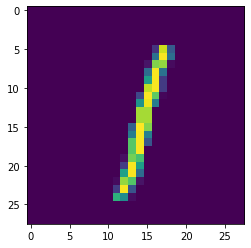

In [3]:
labels = mnist[:, 0]
digits = mnist[:, 1:]
img_size = 28
plt.imshow(digits[15].reshape(img_size, img_size))
plt.show()

## Task 1

In [4]:
# get descriptive statistics
df = pd.DataFrame(digits)
df.describe()

0        1        2        3        4        5        6        7    \
count  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

           8        9    ...           774           775           776  \
count  42000.0  42000.0  ...  42000.000000  42000.000000  42000.000000   
mean       0.0      0.0  ...      0.219286      0.117095      0.059024   
std        0.0      0.0  ...      6.312890      4.633819      3.274488   
min        0.0      0.0  ...      0.000000      0.000000      0.000000   
25%        0.0      0.0  ...      0.000000      0.000000      0.000000   
50%        0.0      0.0  ...      0.000000      0.000000      0.000000   
75%        0.0      0.0  ...      0.000000      0.000000      0.000000   
max        0.0      0.0  ...    254.000000    254.000000    253.000000   

               777           778           779      780      781      782  \
count  42000.00000  42000.000000  42000.000000  42000.0  42000.0  42000.0   
mean       0.02019      0.017238      0.002857      0.0      0.0      0.0   
std        1.75987      1.894498      0.414264      0.0      0.0      0.0   
min        0.00000      0.000000      0.000000      0.0      0.0      0.0   
25%        0.00000      0.000000      0.000000      0.0      0.0      0.0   
50%        0.00000      0.000000      0.000000      0.0      0.0      0.0   
75%        0.00000      0.000000      0.000000      0.0      0.0      0.0   
max      253.00000    254.000000     62.000000      0.0      0.0      0.0   

           783  
count  42000.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

[8 rows x 784 columns]

In [5]:
# remove constant columns (i.e. pixels with no ink)
var_thr = VarianceThreshold(threshold = 0)
var_thr.fit(df)
concol = [column for column in df.columns 
          if column not in df.columns[var_thr.get_support()]]
df = df.drop(concol,axis=1) # 708 columns remaining
df.describe()

12            13            14            15            32   \
count  42000.00000  42000.000000  42000.000000  42000.000000  42000.000000   
mean       0.00300      0.011190      0.005143      0.000214      0.000381   
std        0.56812      1.626927      1.053972      0.043916      0.078072   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        0.00000      0.000000      0.000000      0.000000      0.000000   
50%        0.00000      0.000000      0.000000      0.000000      0.000000   
75%        0.00000      0.000000      0.000000      0.000000      0.000000   
max      116.00000    254.000000    216.000000      9.000000     16.000000   

                33            34            35            36            37   \
count  42000.000000  42000.000000  42000.000000  42000.000000  42000.000000   
mean       0.001310      0.010548      0.027262      0.050905      0.066405   
std        0.232634      1.131661      2.310396      3.121847      3.259128   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       47.000000    157.000000    254.000000    255.000000    243.000000   

       ...           770          771           772           773  \
count  ...  42000.000000  42000.00000  42000.000000  42000.000000   
mean   ...      0.677857      0.60281      0.489238      0.340214   
std    ...     11.254931     10.69603      9.480066      7.950251   
min    ...      0.000000      0.00000      0.000000      0.000000   
25%    ...      0.000000      0.00000      0.000000      0.000000   
50%    ...      0.000000      0.00000      0.000000      0.000000   
75%    ...      0.000000      0.00000      0.000000      0.000000   
max    ...    255.000000    255.00000    255.000000    255.000000   

                774           775           776          777           778  \
count  42000.000000  42000.000000  42000.000000  42000.00000  42000.000000   
mean       0.219286      0.117095      0.059024      0.02019      0.017238   
std        6.312890      4.633819      3.274488      1.75987      1.894498   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        0.000000      0.000000      0.000000      0.00000      0.000000   
50%        0.000000      0.000000      0.000000      0.00000      0.000000   
75%        0.000000      0.000000      0.000000      0.00000      0.000000   
max      254.000000    254.000000    253.000000    253.00000    254.000000   

                779  
count  42000.000000  
mean       0.002857  
std        0.414264  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       62.000000  

[8 rows x 708 columns]

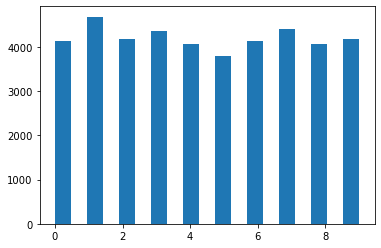

In [6]:
plt.hist(labels, bins=19)
plt.show()

In [7]:
# calculate the majority class
mode = stats.mode(labels)
print(mode[0]) # 1 is the majority class

[1]


## Task 2

In [8]:
# calculate the ink per image
ink = np.array([sum(row) for row in digits])
# calculate the mean ink per digit class
ink_mean = [np.mean(ink[labels == i]) for i in range(10)]
# claclulate the std per digit class
ink_std = [np.std(ink[labels == i]) for i in range(10)]

In [9]:
labels_ink = np.column_stack((range(10), ink_mean, ink_std))
labels_ink[labels_ink[:, 1].argsort()]
# digit 0 and 1 will be the easiest to distinguish
# digit 4 and 9 as well as digit 2 and 8 and digit 3 and 6 will be especially hard to distinguish

array([[1.00000000e+00, 1.51884663e+04, 4.40946170e+03],
       [7.00000000e+00, 2.29312443e+04, 6.16834088e+03],
       [4.00000000e+00, 2.42327225e+04, 6.37463346e+03],
       [9.00000000e+00, 2.45537500e+04, 6.46523133e+03],
       [5.00000000e+00, 2.58359204e+04, 7.52660299e+03],
       [6.00000000e+00, 2.77349173e+04, 7.53050319e+03],
       [3.00000000e+00, 2.83201880e+04, 7.57410454e+03],
       [2.00000000e+00, 2.98710994e+04, 7.65300620e+03],
       [8.00000000e+00, 3.01841484e+04, 7.77739636e+03],
       [0.00000000e+00, 3.46324076e+04, 8.46189204e+03]])

In [10]:
# z-score standardize ink feature
from sklearn.preprocessing import scale
ink = scale(ink).reshape(-1, 1)

In [11]:
from sklearn.linear_model import LogisticRegression
mlr_ink = LogisticRegression(multi_class='multinomial', random_state=16).fit(ink, labels)

In [12]:
pred_labels = mlr_ink.predict(ink)
mlr_ink.score(ink, labels) # accuracy = 0.23

0.22680952380952382

## Task 3

In [13]:
import math
angle = np.zeros((len(digits), 1))

# calculate the angle of the first to the last non-zero pixel
for image in range(0, len(digits)):
    pixels = np.array(np.where(digits[image,:] > 0))
    first_pixel = pixels[:,0]
    last_pixel = pixels[:,-1]
    angle[image] = math.atan2(first_pixel,last_pixel) 

In [14]:
# calculate the mean angle per digit class
angle_mean = [np.mean(angle[labels == i]) for i in range(10)]
# claclulate the std per digit class
angle_std = [np.std(angle[labels == i]) for i in range(10)]

In [15]:
labels_angle = np.column_stack((range(10), angle_mean, angle_std))
labels_angle[labels_angle[:, 1].argsort()]
# digit 6 will be the easiest to distinguish
# digit 3 and 0 will be especially hard to distinguish

array([[6.        , 0.13480815, 0.02991747],
       [2.        , 0.18740269, 0.0502869 ],
       [1.        , 0.20070971, 0.01833319],
       [3.        , 0.20295307, 0.02845111],
       [0.        , 0.20633279, 0.03533058],
       [8.        , 0.21387058, 0.02416395],
       [4.        , 0.22139086, 0.02552286],
       [5.        , 0.23635413, 0.05788499],
       [9.        , 0.25286872, 0.01764282],
       [7.        , 0.26603898, 0.02351628]])

In [16]:
# z-score standardize ncomp feature
angle = scale(angle).reshape(-1, 1)

In [17]:
mlr_angle = LogisticRegression(multi_class='multinomial', random_state=16).fit(angle, labels)

In [18]:
pred_labels = mlr_angle.predict(angle)
mlr_angle.score(angle, labels) # accuracy = 0.34

0.3428809523809524

## Task 4

In [19]:
features = np.hstack((ink, angle))

In [20]:
mlr_both = LogisticRegression(multi_class='multinomial', random_state=16).fit(features, labels)

In [21]:
pred_labels = mlr_both.predict(features)
mlr_both.score(features, labels) # accuracy = 0.40

0.39804761904761904

## Task 5

## Multinomial Logistic Regression

In [22]:
#!pip install opencv-python

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
mnist_scaled = scaler.fit_transform(df[df.columns[1:]])
mnist_scaled.shape

(42000, 707)

In [23]:
mnist_scaled = np.column_stack((labels, mnist_scaled))
mnist_scaled.shape

(42000, 708)

In [24]:
import random
random.seed(123)

index = np.random.choice(mnist_scaled.shape[0], 5000, replace=False)
sample = mnist_scaled[index]

In [25]:
sample_labels = sample[:, 0]
sample_digits = sample[:, 1:]

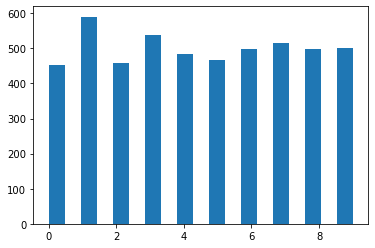

In [26]:
plt.hist(sample_labels, bins=19)
plt.show()

In [27]:
test_data = np.delete(mnist_scaled, index, axis=0)
test_labels = sample[:, 0]
test_digits = sample[:, 1:]

In [28]:
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param = {'C':np.logspace(-3,3,7), 'penalty':['l1'], 'solver':['saga']}
mlr = LogisticRegression(multi_class='multinomial', max_iter=10_000, random_state=16, verbose=1)
mlr_cv = GridSearchCV(mlr, param, cv=5, scoring='accuracy')
mlr_cv.fit(sample_digits, sample_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 6 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 6 epochs took 3 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 6 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 7 epochs took 3 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 7 epochs took 3 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


e: 0.00017620
Epoch 3228, change: 0.00013792
Epoch 2571, change: 0.00017601
Epoch 3229, change: 0.00013787
Epoch 2572, change: 0.00017606
Epoch 3230, change: 0.00013786
Epoch 2573, change: 0.00017595
Epoch 3231, change: 0.00013780
Epoch 2574, change: 0.00017577
Epoch 3232, change: 0.00013766
Epoch 2575, change: 0.00017583
Epoch 3233, change: 0.00013777
Epoch 2576, change: 0.00017554
Epoch 3234, change: 0.00013758
Epoch 2577, change: 0.00017561
Epoch 3235, change: 0.00013756
Epoch 2578, change: 0.00017561
Epoch 3236, change: 0.00013740
Epoch 2579, change: 0.00017562
Epoch 3237, change: 0.00013751
Epoch 2580, change: 0.00017532
Epoch 3238, change: 0.00013739
Epoch 2581, change: 0.00017544
Epoch 3239, change: 0.00013738
Epoch 2582, change: 0.00017535
Epoch 3240, change: 0.00013726
Epoch 2583, change: 0.00017513
Epoch 3241, change: 0.00013727
Epoch 2584, change: 0.00017507
Epoch 3242, change: 0.00013717
Epoch 2585, change: 0.00017525
Epoch 3243, change: 0.00013706
Epoch 2586, change: 0.000

Epoch 3443, change: 0.00012864
Epoch 78, change: 0.00469557
Epoch 2789, change: 0.00016240
Epoch 3444, change: 0.00012854
Epoch 79, change: 0.00462903
Epoch 2790, change: 0.00016222
Epoch 80, change: 0.00456221
Epoch 3445, change: 0.00012854
Epoch 81, change: 0.00449344
Epoch 2791, change: 0.00016225
Epoch 82, change: 0.00441065
Epoch 3446, change: 0.00012853
Epoch 83, change: 0.00433147
Epoch 2792, change: 0.00016223
Epoch 3447, change: 0.00012844
Epoch 84, change: 0.00425334
Epoch 2793, change: 0.00016206
Epoch 85, change: 0.00417623
Epoch 3448, change: 0.00012843
Epoch 86, change: 0.00413530
Epoch 2794, change: 0.00016204
Epoch 87, change: 0.00409931
Epoch 3449, change: 0.00012833
Epoch 88, change: 0.00406852
Epoch 2795, change: 0.00016201
Epoch 3450, change: 0.00012826
Epoch 89, change: 0.00402620
Epoch 2796, change: 0.00016189
Epoch 90, change: 0.00399121
Epoch 3451, change: 0.00012825
Epoch 91, change: 0.00395551
Epoch 2797, change: 0.00016178
Epoch 92, change: 0.00391721
Epoch 3

Epoch 3590, change: 0.00012296
Epoch 2936, change: 0.00015337
Epoch 321, change: 0.00101735
Epoch 322, change: 0.00101472
Epoch 3591, change: 0.00012300
Epoch 2937, change: 0.00015331
Epoch 323, change: 0.00101296
Epoch 324, change: 0.00100995
Epoch 2938, change: 0.00015322
Epoch 3592, change: 0.00012285
Epoch 325, change: 0.00100647
Epoch 2939, change: 0.00015322
Epoch 3593, change: 0.00012292
Epoch 326, change: 0.00100468
Epoch 327, change: 0.00100298
Epoch 2940, change: 0.00015311
Epoch 3594, change: 0.00012276
Epoch 328, change: 0.00099954
Epoch 2941, change: 0.00015305
Epoch 329, change: 0.00099884
Epoch 3595, change: 0.00012280
Epoch 330, change: 0.00099660
Epoch 2942, change: 0.00015283
Epoch 331, change: 0.00099506
Epoch 3596, change: 0.00012268
Epoch 332, change: 0.00099373
Epoch 2943, change: 0.00015289
Epoch 3597, change: 0.00012272
Epoch 333, change: 0.00099239
Epoch 334, change: 0.00099065
Epoch 2944, change: 0.00015291
Epoch 3598, change: 0.00012261
Epoch 335, change: 0.0

Epoch 455, change: 0.00077623
Epoch 3670, change: 0.00012009
Epoch 456, change: 0.00077304
Epoch 3016, change: 0.00014895
Epoch 457, change: 0.00077030
Epoch 3671, change: 0.00012007
Epoch 458, change: 0.00076742
Epoch 3017, change: 0.00014891
Epoch 3672, change: 0.00012003
Epoch 459, change: 0.00076544
Epoch 460, change: 0.00076255
Epoch 3018, change: 0.00014879
Epoch 3673, change: 0.00012002
Epoch 461, change: 0.00075979
Epoch 3019, change: 0.00014877
Epoch 462, change: 0.00075715
Epoch 3674, change: 0.00011999
Epoch 463, change: 0.00075507
Epoch 3020, change: 0.00014872
Epoch 3675, change: 0.00011999
Epoch 464, change: 0.00075235
Epoch 3021, change: 0.00014871
Epoch 465, change: 0.00075027
Epoch 3676, change: 0.00011994
Epoch 466, change: 0.00074832
Epoch 3022, change: 0.00014858
Epoch 467, change: 0.00074651
Epoch 3677, change: 0.00011983
Epoch 468, change: 0.00074479
Epoch 3023, change: 0.00014851
Epoch 3678, change: 0.00011989
Epoch 469, change: 0.00074271
Epoch 3024, change: 0.0

Epoch 810, change: 0.00042604
Epoch 811, change: 0.00042548
Epoch 3227, change: 0.00013796
Epoch 3882, change: 0.00011315
Epoch 812, change: 0.00042488
Epoch 813, change: 0.00042423
Epoch 3228, change: 0.00013792
Epoch 3883, change: 0.00011316
Epoch 814, change: 0.00042376
Epoch 3229, change: 0.00013787
Epoch 3884, change: 0.00011310
Epoch 815, change: 0.00042306
Epoch 816, change: 0.00042250
Epoch 3230, change: 0.00013786
Epoch 3885, change: 0.00011317
Epoch 817, change: 0.00042173
Epoch 818, change: 0.00042119
Epoch 3886, change: 0.00011304
Epoch 3231, change: 0.00013780
Epoch 819, change: 0.00042065
Epoch 3887, change: 0.00011300
Epoch 3232, change: 0.00013766
Epoch 820, change: 0.00041998
Epoch 821, change: 0.00041938
Epoch 3888, change: 0.00011301
Epoch 3233, change: 0.00013777
Epoch 822, change: 0.00041875
Epoch 3889, change: 0.00011297
Epoch 823, change: 0.00041816
Epoch 3234, change: 0.00013758
Epoch 824, change: 0.00041752
Epoch 3890, change: 0.00011287
Epoch 3235, change: 0.0

Epoch 3372, change: 0.00013141
Epoch 1055, change: 0.00032038
Epoch 4027, change: 0.00010888
Epoch 3373, change: 0.00013135
Epoch 1056, change: 0.00031993
Epoch 1057, change: 0.00031944
Epoch 4028, change: 0.00010880
Epoch 3374, change: 0.00013137
Epoch 1058, change: 0.00031920
Epoch 4029, change: 0.00010874
Epoch 1059, change: 0.00031885
Epoch 3375, change: 0.00013134
Epoch 1060, change: 0.00031855
Epoch 4030, change: 0.00010874
Epoch 3376, change: 0.00013132
Epoch 1061, change: 0.00031821
Epoch 4031, change: 0.00010877
Epoch 3377, change: 0.00013129
Epoch 1062, change: 0.00031782
Epoch 1063, change: 0.00031743
Epoch 4032, change: 0.00010871
Epoch 3378, change: 0.00013122
Epoch 1064, change: 0.00031723
Epoch 1065, change: 0.00031685
Epoch 4033, change: 0.00010869
Epoch 3379, change: 0.00013117
Epoch 1066, change: 0.00031664
Epoch 1067, change: 0.00031615
Epoch 4034, change: 0.00010864
Epoch 3380, change: 0.00013116
Epoch 1068, change: 0.00031583
Epoch 3381, change: 0.00013110
Epoch 40

Epoch 3516, change: 0.00012571
Epoch 4170, change: 0.00010497
Epoch 1297, change: 0.00025233
Epoch 3517, change: 0.00012574
Epoch 1298, change: 0.00025210
Epoch 4171, change: 0.00010486
Epoch 1299, change: 0.00025194
Epoch 3518, change: 0.00012562
Epoch 4172, change: 0.00010482
Epoch 1300, change: 0.00025170
Epoch 1301, change: 0.00025135
Epoch 3519, change: 0.00012551
Epoch 4173, change: 0.00010485
Epoch 1302, change: 0.00025101
Epoch 3520, change: 0.00012555
Epoch 1303, change: 0.00025065
Epoch 4174, change: 0.00010484
Epoch 1304, change: 0.00025043
Epoch 3521, change: 0.00012547
Epoch 1305, change: 0.00025010
Epoch 4175, change: 0.00010479
Epoch 1306, change: 0.00024980
Epoch 3522, change: 0.00012546
Epoch 4176, change: 0.00010475
Epoch 1307, change: 0.00024950
Epoch 1308, change: 0.00024927
Epoch 3523, change: 0.00012543
Epoch 4177, change: 0.00010472
Epoch 1309, change: 0.00024904
Epoch 3524, change: 0.00012531
Epoch 1310, change: 0.00024870
Epoch 4178, change: 0.00010462
Epoch 13

Epoch 3659, changconvergence after 4363 epochs took 2246 seconds
e: 0.00012053
Epoch 1540, change: 0.00016846
Epoch 4312, change: 0.00010128
Epoch 3660, change: 0.00012052
Epoch 1541, change: 0.00016797
Epoch 4313, change: 0.00010125
Epoch 1542, change: 0.00016756
Epoch 3661, change: 0.00012040
Epoch 1543, change: 0.00016709
Epoch 4314, change: 0.00010124
Epoch 1544, change: 0.00016670
Epoch 3662, change: 0.00012040
Epoch 1545, change: 0.00016629
Epoch 4315, change: 0.00010118
Epoch 3663, change: 0.00012035
Epoch 1546, change: 0.00016583
Epoch 4316, change: 0.00010120
Epoch 1547, change: 0.00016544
Epoch 3664, change: 0.00012037
Epoch 1548, change: 0.00016503
Epoch 4317, change: 0.00010113
Epoch 1549, change: 0.00016464
Epoch 3665, change: 0.00012032
Epoch 1550, change: 0.00016421
Epoch 4318, change: 0.00010112
Epoch 3666, change: 0.00012029
Epoch 1551, change: 0.00016375
Epoch 4319, change: 0.00010109
Epoch 1552, change: 0.00016341
Epoch 3667, change: 0.00012025
Epoch 1553, change: 0.

Epoch 3834, change: 0.00011472
Epoch 1843, change: 0.00011746
Epoch 3835, change: 0.00011469
Epoch 1844, change: 0.00011739
Epoch 1845, change: 0.00011734
Epoch 3836, change: 0.00011465
Epoch 1846, change: 0.00011731
Epoch 1847, change: 0.00011721
Epoch 3837, change: 0.00011457
Epoch 1848, change: 0.00011715
Epoch 3838, change: 0.00011452
Epoch 1849, change: 0.00011711
Epoch 1850, change: 0.00011702
Epoch 3839, change: 0.00011450
Epoch 1851, change: 0.00011694
Epoch 1852, change: 0.00011692
Epoch 3840, change: 0.00011456
Epoch 1853, change: 0.00011682
Epoch 1854, change: 0.00011678
Epoch 3841, change: 0.00011449
Epoch 1855, change: 0.00011671
Epoch 3842, change: 0.00011452
Epoch 1856, change: 0.00011668
Epoch 1857, change: 0.00011658
Epoch 3843, change: 0.00011434
Epoch 1858, change: 0.00011657
Epoch 1859, change: 0.00011651
Epoch 3844, change: 0.00011432
Epoch 1860, change: 0.00011640
Epoch 1861, change: 0.00011633
Epoch 3845, change: 0.00011434
Epoch 1862, change: 0.00011634
Epoch 38

Epoch 4027, changeconvergence after 2216 epochs took 875 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 14.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


: 0.00010888
Epoch 2178, change: 0.00010205
Epoch 2179, change: 0.00010199
Epoch 4028, change: 0.00010880
Epoch 2180, change: 0.00010197
Epoch 2181, change: 0.00010194
Epoch 4029, change: 0.00010874
Epoch 2182, change: 0.00010186
Epoch 4030, change: 0.00010874
Epoch 2183, change: 0.00010182
Epoch 2184, change: 0.00010175
Epoch 4031, change: 0.00010877
Epoch 2185, change: 0.00010168
Epoch 2186, change: 0.00010164
Epoch 4032, change: 0.00010871
Epoch 2187, change: 0.00010158
Epoch 2188, change: 0.00010155
Epoch 4033, change: 0.00010869
Epoch 2189, change: 0.00010149
Epoch 4034, change: 0.00010864
Epoch 2190, change: 0.00010141
Epoch 2191, change: 0.00010136
Epoch 4035, change: 0.00010860
Epoch 2192, change: 0.00010131
Epoch 2193, change: 0.00010124
Epoch 4036, change: 0.00010858
Epoch 2194, change: 0.00010120
Epoch 4037, change: 0.00010855
Epoch 2195, change: 0.00010114
Epoch 2196, change: 0.00010109
Epoch 4038, change: 0.00010847
Epoch 2197, change: 0.00010102
Epoch 2198, change: 0.0001

Epoch 4226, cconvergence after 4363 epochs took 2346 seconds
hange: 0.00010344
Epoch 306, change: 0.00135939
Epoch 307, change: 0.00135565
Epoch 4227, change: 0.00010341
Epoch 308, change: 0.00135215
Epoch 4228, change: 0.00010341
Epoch 309, change: 0.00134956
Epoch 310, change: 0.00134491
Epoch 4229, change: 0.00010338
Epoch 311, change: 0.00134167
Epoch 312, change: 0.00133832
Epoch 4230, change: 0.00010333
Epoch 313, change: 0.00133529
Epoch 314, change: 0.00133054
Epoch 4231, change: 0.00010334
Epoch 315, change: 0.00132625
Epoch 4232, change: 0.00010330
Epoch 316, change: 0.00132044
Epoch 317, change: 0.00131622
Epoch 4233, change: 0.00010330
Epoch 318, change: 0.00131186
Epoch 319, change: 0.00130753
Epoch 4234, change: 0.00010325
Epoch 320, change: 0.00130301
Epoch 321, change: 0.00130054
Epoch 4235, change: 0.00010322
Epoch 322, change: 0.00129717
Epoch 4236, change: 0.00010321
Epoch 323, change: 0.00129461
Epoch 324, change: 0.00129130
Epoch 4237, change: 0.00010319
Epoch 325,

Epoch 711, change: 0.00056717
Epoch 712, change: 0.00056530
Epoch 713, change: 0.00056388
Epoch 714, change: 0.00056225
Epoch 715, change: 0.00056073
Epoch 716, change: 0.00055921
Epoch 717, change: 0.00055768
Epoch 718, change: 0.00055610
Epoch 719, change: 0.00055446
Epoch 720, change: 0.00055306
Epoch 721, change: 0.00055176
Epoch 722, change: 0.00055001
Epoch 723, change: 0.00054878
Epoch 724, change: 0.00054717
Epoch 725, change: 0.00054602
Epoch 726, change: 0.00054426
Epoch 727, change: 0.00054312
Epoch 728, change: 0.00054183
Epoch 729, change: 0.00054035
Epoch 730, change: 0.00053881
Epoch 731, change: 0.00053746
Epoch 732, change: 0.00053626
Epoch 733, change: 0.00053493
Epoch 734, change: 0.00053358
Epoch 735, change: 0.00053208
Epoch 736, change: 0.00053112
Epoch 737, change: 0.00052961
Epoch 738, change: 0.00052832
Epoch 739, change: 0.00052718
Epoch 740, change: 0.00052596
Epoch 741, change: 0.00052454
Epoch 742, change: 0.00052343
Epoch 743, change: 0.00052224
Epoch 744,

Epoch 1248, change: 0.00022782
Epoch 1249, change: 0.00022756
Epoch 1250, change: 0.00022717
Epoch 1251, change: 0.00022682
Epoch 1252, change: 0.00022657
Epoch 1253, change: 0.00022622
Epoch 1254, change: 0.00022594
Epoch 1255, change: 0.00022558
Epoch 1256, change: 0.00022527
Epoch 1257, change: 0.00022495
Epoch 1258, change: 0.00022470
Epoch 1259, change: 0.00022436
Epoch 1260, change: 0.00022403
Epoch 1261, change: 0.00022376
Epoch 1262, change: 0.00022346
Epoch 1263, change: 0.00022314
Epoch 1264, change: 0.00022294
Epoch 1265, change: 0.00022258
Epoch 1266, change: 0.00022235
Epoch 1267, change: 0.00022211
Epoch 1268, change: 0.00022172
Epoch 1269, change: 0.00022142
Epoch 1270, change: 0.00022111
Epoch 1271, change: 0.00022083
Epoch 1272, change: 0.00022056
Epoch 1273, change: 0.00022025
Epoch 1274, change: 0.00021997
Epoch 1275, change: 0.00021967
Epoch 1276, change: 0.00021939
Epoch 1277, change: 0.00021911
Epoch 1278, change: 0.00021875
Epoch 1279, change: 0.00021847
Epoch 12

Epoch 1777,convergence after 2089 epochs took 598 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 10.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 change: 0.00012922
Epoch 1778, change: 0.00012912
Epoch 1779, change: 0.00012900
Epoch 1780, change: 0.00012887
Epoch 1781, change: 0.00012875
Epoch 1782, change: 0.00012869
Epoch 1783, change: 0.00012857
Epoch 1784, change: 0.00012848
Epoch 1785, change: 0.00012838
Epoch 1786, change: 0.00012825
Epoch 1787, change: 0.00012816
Epoch 1788, change: 0.00012802
Epoch 1789, change: 0.00012795
Epoch 1790, change: 0.00012781
Epoch 1791, change: 0.00012773
Epoch 1792, change: 0.00012763
Epoch 1793, change: 0.00012753
Epoch 1794, change: 0.00012741
Epoch 1795, change: 0.00012727
Epoch 1796, change: 0.00012719
Epoch 1797, change: 0.00012707
Epoch 1798, change: 0.00012697
Epoch 1799, change: 0.00012688
Epoch 1800, change: 0.00012676
Epoch 1801, change: 0.00012664
Epoch 1802, change: 0.00012656
Epoch 1803, change: 0.00012644
Epoch 1804, change: 0.00012637
Epoch 1805, change: 0.00012624
Epoch 1806, change: 0.00012614
Epoch 1807, change: 0.00012602
Epoch 1808, change: 0.00012596
Epoch 1809, change:

Epoch 228, change: 0.00167441
Epoch 229, change: 0.00166688
Epoch 230, change: 0.00165863
Epoch 231, change: 0.00165147
Epoch 232, change: 0.00164598
Epoch 233, change: 0.00164035
Epoch 234, change: 0.00163508
Epoch 235, change: 0.00162766
Epoch 236, change: 0.00162254
Epoch 237, change: 0.00161692
Epoch 238, change: 0.00161170
Epoch 239, change: 0.00160707
Epoch 240, change: 0.00160094
Epoch 241, change: 0.00159672
Epoch 242, change: 0.00159116
Epoch 243, change: 0.00158455
Epoch 244, change: 0.00158092
Epoch 245, change: 0.00157568
Epoch 246, change: 0.00157145
Epoch 247, change: 0.00156498
Epoch 248, change: 0.00156000
Epoch 249, change: 0.00155445
Epoch 250, change: 0.00155044
Epoch 251, change: 0.00154448
Epoch 252, change: 0.00154076
Epoch 253, change: 0.00153488
Epoch 254, change: 0.00152974
Epoch 255, change: 0.00152524
Epoch 256, change: 0.00152023
Epoch 257, change: 0.00151669
Epoch 258, change: 0.00151324
Epoch 259, change: 0.00150879
Epoch 260, change: 0.00150350
Epoch 261,

Epoch 774, change: 0.00045910
Epoch 775, change: 0.00045830
Epoch 776, change: 0.00045757
Epoch 777, change: 0.00045652
Epoch 778, change: 0.00045577
Epoch 779, change: 0.00045471
Epoch 780, change: 0.00045408
Epoch 781, change: 0.00045310
Epoch 782, change: 0.00045233
Epoch 783, change: 0.00045140
Epoch 784, change: 0.00045066
Epoch 785, change: 0.00044974
Epoch 786, change: 0.00044890
Epoch 787, change: 0.00044790
Epoch 788, change: 0.00044703
Epoch 789, change: 0.00044625
Epoch 790, change: 0.00044564
Epoch 791, change: 0.00044463
Epoch 792, change: 0.00044384
Epoch 793, change: 0.00044297
Epoch 794, change: 0.00044222
Epoch 795, change: 0.00044137
Epoch 796, change: 0.00044065
Epoch 797, change: 0.00043987
Epoch 798, change: 0.00043902
Epoch 799, change: 0.00043814
Epoch 800, change: 0.00043760
Epoch 801, change: 0.00043700
Epoch 802, change: 0.00043590
Epoch 803, change: 0.00043556
Epoch 804, change: 0.00043467
Epoch 805, change: 0.00043390
Epoch 806, change: 0.00043291
Epoch 807,

Epoch 1310, change:convergence after 1766 epochs took 497 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 0.00017341
Epoch 1311, change: 0.00017320
Epoch 1312, change: 0.00017307
Epoch 1313, change: 0.00017285
Epoch 1314, change: 0.00017269
Epoch 1315, change: 0.00017248
Epoch 1316, change: 0.00017232
Epoch 1317, change: 0.00017211
Epoch 1318, change: 0.00017190
Epoch 1319, change: 0.00017171
Epoch 1320, change: 0.00017156
Epoch 1321, change: 0.00017137
Epoch 1322, change: 0.00017122
Epoch 1323, change: 0.00017098
Epoch 1324, change: 0.00017082
Epoch 1325, change: 0.00017061
Epoch 1326, change: 0.00017040
Epoch 1327, change: 0.00017022
Epoch 1328, change: 0.00017008
Epoch 1329, change: 0.00016987
Epoch 1330, change: 0.00016968
Epoch 1331, change: 0.00016947
Epoch 1332, change: 0.00016936
Epoch 1333, change: 0.00016914
Epoch 1334, change: 0.00016893
Epoch 1335, change: 0.00016876
Epoch 1336, change: 0.00016856
Epoch 1337, change: 0.00016839
Epoch 1338, change: 0.00016824
Epoch 1339, change: 0.00016806
Epoch 1340, change: 0.00016788
Epoch 1341, change: 0.00016766
Epoch 1342, change: 0.00016

Epoch 79, change: 0.00545325
Epoch 80, change: 0.00534892
Epoch 81, change: 0.00525189
Epoch 82, change: 0.00516074
Epoch 83, change: 0.00506056
Epoch 84, change: 0.00496833
Epoch 85, change: 0.00490778
Epoch 86, change: 0.00485353
Epoch 87, change: 0.00478165
Epoch 88, change: 0.00471254
Epoch 89, change: 0.00463658
Epoch 90, change: 0.00456721
Epoch 91, change: 0.00450077
Epoch 92, change: 0.00444098
Epoch 93, change: 0.00437439
Epoch 94, change: 0.00431687
Epoch 95, change: 0.00425782
Epoch 96, change: 0.00420534
Epoch 97, change: 0.00415481
Epoch 98, change: 0.00410457
Epoch 99, change: 0.00405457
Epoch 100, change: 0.00400834
Epoch 101, change: 0.00396567
Epoch 102, change: 0.00392487
Epoch 103, change: 0.00388983
Epoch 104, change: 0.00384841
Epoch 105, change: 0.00380561
Epoch 106, change: 0.00376559
Epoch 107, change: 0.00371916
Epoch 108, change: 0.00366384
Epoch 109, change: 0.00361833
Epoch 110, change: 0.00356586
Epoch 111, change: 0.00351759
Epoch 112, change: 0.00347158
E

Epoch 626, change: 0.00048143
Epoch 627, change: 0.00048086
Epoch 628, change: 0.00048012
Epoch 629, change: 0.00047940
Epoch 630, change: 0.00047873
Epoch 631, change: 0.00047811
Epoch 632, change: 0.00047756
Epoch 633, change: 0.00047691
Epoch 634, change: 0.00047612
Epoch 635, change: 0.00047544
Epoch 636, change: 0.00047490
Epoch 637, change: 0.00047406
Epoch 638, change: 0.00047361
Epoch 639, change: 0.00047284
Epoch 640, change: 0.00047218
Epoch 641, change: 0.00047170
Epoch 642, change: 0.00047108
Epoch 643, change: 0.00047043
Epoch 644, change: 0.00046982
Epoch 645, change: 0.00046913
Epoch 646, change: 0.00046840
Epoch 647, change: 0.00046777
Epoch 648, change: 0.00046712
Epoch 649, change: 0.00046636
Epoch 650, change: 0.00046595
Epoch 651, change: 0.00046541
Epoch 652, change: 0.00046467
Epoch 653, change: 0.00046389
Epoch 654, change: 0.00046350
Epoch 655, change: 0.00046269
Epoch 656, change: 0.00046228
Epoch 657, change: 0.00046148
Epoch 658, change: 0.00046091
Epoch 659,

Epoch 1166, change: 0.00024035
Epoch 1167, change: 0.00023994
Epoch 1168, change: 0.00023977
Epoch 1169, change: 0.00023942
Epoch 1170, change: 0.00023913
Epoch 1171, change: 0.00023883
Epoch 1172, change: 0.00023856
Epoch 1173, change: 0.00023830
Epoch 1174, change: 0.00023795
Epoch 1175, change: 0.00023770
Epoch 1176, change: 0.00023730
Epoch 1177, change: 0.00023707
Epoch 1178, change: 0.00023674
Epoch 1179, change: 0.00023649
Epoch 1180, change: 0.00023623
Epoch 1181, change: 0.00023587
Epoch 1182, change: 0.00023543
Epoch 1183, change: 0.00023521
Epoch 1184, change: 0.00023497
Epoch 1185, change: 0.00023466
Epoch 1186, change: 0.00023447
Epoch 1187, change: 0.00023416
Epoch 1188, change: 0.00023394
Epoch 1189, change: 0.00023368
Epoch 1190, change: 0.00023333
Epoch 1191, change: 0.00023307
Epoch 1192, change: 0.00023273
Epoch 1193, change: 0.00023247
Epoch 1194, change: 0.00023226
Epoch 1195, change: 0.00023198
Epoch 1196, change: 0.00023157
Epoch 1197, change: 0.00023138
Epoch 11

Epoch 1695, convergence after 1986 epochs took 509 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


change: 0.00013521
Epoch 1696, change: 0.00013513
Epoch 1697, change: 0.00013499
Epoch 1698, change: 0.00013480
Epoch 1699, change: 0.00013470
Epoch 1700, change: 0.00013461
Epoch 1701, change: 0.00013443
Epoch 1702, change: 0.00013434
Epoch 1703, change: 0.00013418
Epoch 1704, change: 0.00013402
Epoch 1705, change: 0.00013392
Epoch 1706, change: 0.00013376
Epoch 1707, change: 0.00013363
Epoch 1708, change: 0.00013351
Epoch 1709, change: 0.00013339
Epoch 1710, change: 0.00013326
Epoch 1711, change: 0.00013317
Epoch 1712, change: 0.00013303
Epoch 1713, change: 0.00013285
Epoch 1714, change: 0.00013271
Epoch 1715, change: 0.00013262
Epoch 1716, change: 0.00013250
Epoch 1717, change: 0.00013231
Epoch 1718, change: 0.00013223
Epoch 1719, change: 0.00013207
Epoch 1720, change: 0.00013195
Epoch 1721, change: 0.00013180
Epoch 1722, change: 0.00013167
Epoch 1723, change: 0.00013155
Epoch 1724, change: 0.00013147
Epoch 1725, change: 0.00013134
Epoch 1726, change: 0.00013120
Epoch 1727, change: 

Epoch 250, change: 0.00173038
Epoch 251, change: 0.00172731
Epoch 252, change: 0.00172536
Epoch 253, change: 0.00172194
Epoch 254, change: 0.00171943
Epoch 255, change: 0.00171741
Epoch 256, change: 0.00171440
Epoch 257, change: 0.00171230
Epoch 258, change: 0.00171141
Epoch 259, change: 0.00170856
Epoch 260, change: 0.00170533
Epoch 261, change: 0.00170375
Epoch 262, change: 0.00170089
Epoch 263, change: 0.00169908
Epoch 264, change: 0.00169768
Epoch 265, change: 0.00169456
Epoch 266, change: 0.00169345
Epoch 267, change: 0.00169037
Epoch 268, change: 0.00168965
Epoch 269, change: 0.00168714
Epoch 270, change: 0.00168545
Epoch 271, change: 0.00168205
Epoch 272, change: 0.00168058
Epoch 273, change: 0.00167826
Epoch 274, change: 0.00167572
Epoch 275, change: 0.00167459
Epoch 276, change: 0.00167192
Epoch 277, change: 0.00167001
Epoch 278, change: 0.00166817
Epoch 279, change: 0.00166720
Epoch 280, change: 0.00166655
Epoch 281, change: 0.00166413
Epoch 282, change: 0.00166028
Epoch 283,

Epoch 796, change: 0.00037024
Epoch 797, change: 0.00036876
Epoch 798, change: 0.00036740
Epoch 799, change: 0.00036595
Epoch 800, change: 0.00036462
Epoch 801, change: 0.00036325
Epoch 802, change: 0.00036176
Epoch 803, change: 0.00035947
Epoch 804, change: 0.00035569
Epoch 805, change: 0.00035265
Epoch 806, change: 0.00034961
Epoch 807, change: 0.00034666
Epoch 808, change: 0.00034393
Epoch 809, change: 0.00034117
Epoch 810, change: 0.00033857
Epoch 811, change: 0.00033604
Epoch 812, change: 0.00033359
Epoch 813, change: 0.00033120
Epoch 814, change: 0.00032904
Epoch 815, change: 0.00032668
Epoch 816, change: 0.00032435
Epoch 817, change: 0.00032228
Epoch 818, change: 0.00032014
Epoch 819, change: 0.00031822
Epoch 820, change: 0.00031605
Epoch 821, change: 0.00031426
Epoch 822, change: 0.00031209
Epoch 823, change: 0.00031014
Epoch 824, change: 0.00030824
Epoch 825, change: 0.00030643
Epoch 826, change: 0.00030458
Epoch 827, change: 0.00030276
Epoch 828, change: 0.00030103
Epoch 829,

Epoch 1331, change: convergence after 1481 epochs took 365 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.00011633
Epoch 1332, change: 0.00011625
Epoch 1333, change: 0.00011612
Epoch 1334, change: 0.00011597
Epoch 1335, change: 0.00011591
Epoch 1336, change: 0.00011582
Epoch 1337, change: 0.00011565
Epoch 1338, change: 0.00011553
Epoch 1339, change: 0.00011542
Epoch 1340, change: 0.00011528
Epoch 1341, change: 0.00011520
Epoch 1342, change: 0.00011512
Epoch 1343, change: 0.00011500
Epoch 1344, change: 0.00011476
Epoch 1345, change: 0.00011472
Epoch 1346, change: 0.00011465
Epoch 1347, change: 0.00011455
Epoch 1348, change: 0.00011439
Epoch 1349, change: 0.00011427
Epoch 1350, change: 0.00011407
Epoch 1351, change: 0.00011404
Epoch 1352, change: 0.00011384
Epoch 1353, change: 0.00011377
Epoch 1354, change: 0.00011373
Epoch 1355, change: 0.00011359
Epoch 1356, change: 0.00011343
Epoch 1357, change: 0.00011342
Epoch 1358, change: 0.00011324
Epoch 1359, change: 0.00011313
Epoch 1360, change: 0.00011299
Epoch 1361, change: 0.00011293
Epoch 1362, change: 0.00011271
Epoch 1363, change: 0.000112

Epoch 396, change: 0.00086846
Epoch 397, change: 0.00086712
Epoch 398, change: 0.00086571
Epoch 399, change: 0.00086402
Epoch 400, change: 0.00086257
Epoch 401, change: 0.00086109
Epoch 402, change: 0.00085974
Epoch 403, change: 0.00085825
Epoch 404, change: 0.00085690
Epoch 405, change: 0.00085393
Epoch 406, change: 0.00085375
Epoch 407, change: 0.00085062
Epoch 408, change: 0.00084997
Epoch 409, change: 0.00084823
Epoch 410, change: 0.00084598
Epoch 411, change: 0.00084446
Epoch 412, change: 0.00084210
Epoch 413, change: 0.00083898
Epoch 414, change: 0.00083743
Epoch 415, change: 0.00083573
Epoch 416, change: 0.00083282
Epoch 417, change: 0.00083108
Epoch 418, change: 0.00082934
Epoch 419, change: 0.00082781
Epoch 420, change: 0.00082472
Epoch 421, change: 0.00082330
Epoch 422, change: 0.00082173
Epoch 423, change: 0.00082028
Epoch 424, change: 0.00081792
Epoch 425, change: 0.00081697
Epoch 426, change: 0.00081453
Epoch 427, change: 0.00081291
Epoch 428, change: 0.00081086
Epoch 429,

Epoch 942, change: 0.00037694
Epoch 943, change: 0.00037620
Epoch 944, change: 0.00037622
Epoch 945, change: 0.00037561
Epoch 946, change: 0.00037564
Epoch 947, change: 0.00037531
Epoch 948, change: 0.00037483
Epoch 949, change: 0.00037468
Epoch 950, change: 0.00037457
Epoch 951, change: 0.00037384
Epoch 952, change: 0.00037400
Epoch 953, change: 0.00037304
Epoch 954, change: 0.00037301
Epoch 955, change: 0.00037245
Epoch 956, change: 0.00037248
Epoch 957, change: 0.00037167
Epoch 958, change: 0.00037188
Epoch 959, change: 0.00037152
Epoch 960, change: 0.00037097
Epoch 961, change: 0.00037068
Epoch 962, change: 0.00037052
Epoch 963, change: 0.00037007
Epoch 964, change: 0.00036999
Epoch 965, change: 0.00036946
Epoch 966, change: 0.00036914
Epoch 967, change: 0.00036881
Epoch 968, change: 0.00036822
Epoch 969, change: 0.00036821
Epoch 970, change: 0.00036799
Epoch 971, change: 0.00036742
Epoch 972, change: 0.00036703
Epoch 973, change: 0.00036618
Epoch 974, change: 0.00036527
Epoch 975,

Epoch 1472, change: 0.00024550
Epoch 1473, change: 0.00024522
Epoch 1474, change: 0.00024492
Epoch 1475, change: 0.00024474
Epoch 1476, change: 0.00024447
Epoch 1477, change: 0.00024420
Epoch 1478, change: 0.00024393
Epoch 1479, change: 0.00024373
Epoch 1480, change: 0.00024344
Epoch 1481, change: 0.00024321
Epoch 1482, change: 0.00024300
Epoch 1483, change: 0.00024275
Epoch 1484, change: 0.00024250
Epoch 1485, change: 0.00024234
Epoch 1486, change: 0.00024205
Epoch 1487, change: 0.00024177
Epoch 1488, change: 0.00024149
Epoch 1489, change: 0.00024134
Epoch 1490, change: 0.00024105
Epoch 1491, change: 0.00024096
Epoch 1492, change: 0.00024067
Epoch 1493, change: 0.00024047
Epoch 1494, change: 0.00024030
Epoch 1495, change: 0.00024003
Epoch 1496, change: 0.00023988
Epoch 1497, change: 0.00023965
Epoch 1498, change: 0.00023944
Epoch 1499, change: 0.00023927
Epoch 1500, change: 0.00023906
Epoch 1501, change: 0.00023890
Epoch 1502, change: 0.00023866
Epoch 1503, change: 0.00023850
Epoch 15

Epoch 2001, change: 0.00016037
Epoch 2002, change: 0.00016028
Epoch 2003, change: 0.00016015
Epoch 2004, change: 0.00016011
Epoch 2005, change: 0.00016003
Epoch 2006, change: 0.00015992
Epoch 2007, change: 0.00015989
Epoch 2008, change: 0.00015979
Epoch 2009, change: 0.00015975
Epoch 2010, change: 0.00015959
Epoch 2011, change: 0.00015951
Epoch 2012, change: 0.00015950
Epoch 2013, change: 0.00015933
Epoch 2014, change: 0.00015930
Epoch 2015, change: 0.00015918
Epoch 2016, change: 0.00015912
Epoch 2017, change: 0.00015907
Epoch 2018, change: 0.00015895
Epoch 2019, change: 0.00015885
Epoch 2020, change: 0.00015881
Epoch 2021, change: 0.00015872
Epoch 2022, change: 0.00015864
Epoch 2023, change: 0.00015854
Epoch 2024, change: 0.00015848
Epoch 2025, change: 0.00015836
Epoch 2026, change: 0.00015830
Epoch 2027, change: 0.00015824
Epoch 2028, change: 0.00015806
Epoch 2029, change: 0.00015800
Epoch 2030, change: 0.00015790
Epoch 2031, change: 0.00015784
Epoch 2032, change: 0.00015775
Epoch 20

Epoch 2529, change: 0.00013848
Epoch 2530, change: 0.00013846
Epoch 2531, change: 0.00013846
Epoch 2532, change: 0.00013840
Epoch 2533, change: 0.00013841
Epoch 2534, change: 0.00013834
Epoch 2535, change: 0.00013832
Epoch 2536, change: 0.00013831
Epoch 2537, change: 0.00013831
Epoch 2538, change: 0.00013827
Epoch 2539, change: 0.00013824
Epoch 2540, change: 0.00013829
Epoch 2541, change: 0.00013821
Epoch 2542, change: 0.00013821
Epoch 2543, change: 0.00013820
Epoch 2544, change: 0.00013820
Epoch 2545, change: 0.00013818
Epoch 2546, change: 0.00013816
Epoch 2547, change: 0.00013816
Epoch 2548, change: 0.00013811
Epoch 2549, change: 0.00013812
Epoch 2550, change: 0.00013809
Epoch 2551, change: 0.00013810
Epoch 2552, change: 0.00013812
Epoch 2553, change: 0.00013809
Epoch 2554, change: 0.00013808
Epoch 2555, change: 0.00013810
Epoch 2556, change: 0.00013810
Epoch 2557, change: 0.00013805
Epoch 2558, change: 0.00013806
Epoch 2559, change: 0.00013806
Epoch 2560, change: 0.00013804
Epoch 25

Epoch 3058, chconvergence after 3371 epochs took 969 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 16.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ange: 0.00012312
Epoch 3059, change: 0.00012308
Epoch 3060, change: 0.00012301
Epoch 3061, change: 0.00012296
Epoch 3062, change: 0.00012290
Epoch 3063, change: 0.00012288
Epoch 3064, change: 0.00012280
Epoch 3065, change: 0.00012280
Epoch 3066, change: 0.00012272
Epoch 3067, change: 0.00012266
Epoch 3068, change: 0.00012261
Epoch 3069, change: 0.00012257
Epoch 3070, change: 0.00012256
Epoch 3071, change: 0.00012251
Epoch 3072, change: 0.00012239
Epoch 3073, change: 0.00012237
Epoch 3074, change: 0.00012233
Epoch 3075, change: 0.00012229
Epoch 3076, change: 0.00012223
Epoch 3077, change: 0.00012218
Epoch 3078, change: 0.00012214
Epoch 3079, change: 0.00012209
Epoch 3080, change: 0.00012203
Epoch 3081, change: 0.00012198
Epoch 3082, change: 0.00012197
Epoch 3083, change: 0.00012189
Epoch 3084, change: 0.00012188
Epoch 3085, change: 0.00012182
Epoch 3086, change: 0.00012173
Epoch 3087, change: 0.00012169
Epoch 3088, change: 0.00012165
Epoch 3089, change: 0.00012158
Epoch 3090, change: 0.

Epoch 227, change: 0.00166844
Epoch 228, change: 0.00166348
Epoch 229, change: 0.00165631
Epoch 230, change: 0.00164939
Epoch 231, change: 0.00164451
Epoch 232, change: 0.00163789
Epoch 233, change: 0.00163093
Epoch 234, change: 0.00162604
Epoch 235, change: 0.00161840
Epoch 236, change: 0.00161271
Epoch 237, change: 0.00160789
Epoch 238, change: 0.00160290
Epoch 239, change: 0.00159632
Epoch 240, change: 0.00159036
Epoch 241, change: 0.00158623
Epoch 242, change: 0.00157850
Epoch 243, change: 0.00157249
Epoch 244, change: 0.00156717
Epoch 245, change: 0.00156055
Epoch 246, change: 0.00155626
Epoch 247, change: 0.00155121
Epoch 248, change: 0.00154521
Epoch 249, change: 0.00153951
Epoch 250, change: 0.00153351
Epoch 251, change: 0.00152774
Epoch 252, change: 0.00152310
Epoch 253, change: 0.00151758
Epoch 254, change: 0.00151336
Epoch 255, change: 0.00150695
Epoch 256, change: 0.00150227
Epoch 257, change: 0.00149767
Epoch 258, change: 0.00149162
Epoch 259, change: 0.00148767
Epoch 260,

Epoch 773, change: 0.00052549
Epoch 774, change: 0.00052490
Epoch 775, change: 0.00052422
Epoch 776, change: 0.00052368
Epoch 777, change: 0.00052312
Epoch 778, change: 0.00052223
Epoch 779, change: 0.00052175
Epoch 780, change: 0.00052138
Epoch 781, change: 0.00052060
Epoch 782, change: 0.00052002
Epoch 783, change: 0.00051935
Epoch 784, change: 0.00051873
Epoch 785, change: 0.00051830
Epoch 786, change: 0.00051757
Epoch 787, change: 0.00051731
Epoch 788, change: 0.00051653
Epoch 789, change: 0.00051617
Epoch 790, change: 0.00051565
Epoch 791, change: 0.00051487
Epoch 792, change: 0.00051417
Epoch 793, change: 0.00051370
Epoch 794, change: 0.00051295
Epoch 795, change: 0.00051239
Epoch 796, change: 0.00051195
Epoch 797, change: 0.00051141
Epoch 798, change: 0.00051096
Epoch 799, change: 0.00051022
Epoch 800, change: 0.00050951
Epoch 801, change: 0.00050906
Epoch 802, change: 0.00050866
Epoch 803, change: 0.00050780
Epoch 804, change: 0.00050741
Epoch 805, change: 0.00050666
Epoch 806,

Epoch 1309, change: 0.00028823
Epoch 1310, change: 0.00028793
Epoch 1311, change: 0.00028765
Epoch 1312, change: 0.00028732
Epoch 1313, change: 0.00028728
Epoch 1314, change: 0.00028702
Epoch 1315, change: 0.00028676
Epoch 1316, change: 0.00028663
Epoch 1317, change: 0.00028620
Epoch 1318, change: 0.00028606
Epoch 1319, change: 0.00028577
Epoch 1320, change: 0.00028548
Epoch 1321, change: 0.00028543
Epoch 1322, change: 0.00028515
Epoch 1323, change: 0.00028494
Epoch 1324, change: 0.00028466
Epoch 1325, change: 0.00028448
Epoch 1326, change: 0.00028425
Epoch 1327, change: 0.00028401
Epoch 1328, change: 0.00028388
Epoch 1329, change: 0.00028356
Epoch 1330, change: 0.00028333
Epoch 1331, change: 0.00028318
Epoch 1332, change: 0.00028302
Epoch 1333, change: 0.00028279
Epoch 1334, change: 0.00028242
Epoch 1335, change: 0.00028221
Epoch 1336, change: 0.00028202
Epoch 1337, change: 0.00028187
Epoch 1338, change: 0.00028159
Epoch 1339, change: 0.00028137
Epoch 1340, change: 0.00028118
Epoch 13

Epoch 1838, change: 0.00019808
Epoch 1839, change: 0.00019778
Epoch 1840, change: 0.00019749
Epoch 1841, change: 0.00019717
Epoch 1842, change: 0.00019689
Epoch 1843, change: 0.00019659
Epoch 1844, change: 0.00019638
Epoch 1845, change: 0.00019604
Epoch 1846, change: 0.00019574
Epoch 1847, change: 0.00019555
Epoch 1848, change: 0.00019523
Epoch 1849, change: 0.00019498
Epoch 1850, change: 0.00019465
Epoch 1851, change: 0.00019447
Epoch 1852, change: 0.00019417
Epoch 1853, change: 0.00019393
Epoch 1854, change: 0.00019367
Epoch 1855, change: 0.00019339
Epoch 1856, change: 0.00019313
Epoch 1857, change: 0.00019293
Epoch 1858, change: 0.00019269
Epoch 1859, change: 0.00019246
Epoch 1860, change: 0.00019219
Epoch 1861, change: 0.00019196
Epoch 1862, change: 0.00019172
Epoch 1863, change: 0.00019159
Epoch 1864, change: 0.00019134
Epoch 1865, change: 0.00019101
Epoch 1866, change: 0.00019084
Epoch 1867, change: 0.00019066
Epoch 1868, change: 0.00019036
Epoch 1869, change: 0.00019015
Epoch 18

Epoch 2366, change: 0.00014432
Epoch 2367, change: 0.00014424
Epoch 2368, change: 0.00014421
Epoch 2369, change: 0.00014414
Epoch 2370, change: 0.00014408
Epoch 2371, change: 0.00014406
Epoch 2372, change: 0.00014395
Epoch 2373, change: 0.00014392
Epoch 2374, change: 0.00014386
Epoch 2375, change: 0.00014377
Epoch 2376, change: 0.00014373
Epoch 2377, change: 0.00014368
Epoch 2378, change: 0.00014366
Epoch 2379, change: 0.00014354
Epoch 2380, change: 0.00014348
Epoch 2381, change: 0.00014342
Epoch 2382, change: 0.00014335
Epoch 2383, change: 0.00014330
Epoch 2384, change: 0.00014323
Epoch 2385, change: 0.00014316
Epoch 2386, change: 0.00014311
Epoch 2387, change: 0.00014305
Epoch 2388, change: 0.00014298
Epoch 2389, change: 0.00014294
Epoch 2390, change: 0.00014288
Epoch 2391, change: 0.00014283
Epoch 2392, change: 0.00014276
Epoch 2393, change: 0.00014272
Epoch 2394, change: 0.00014264
Epoch 2395, change: 0.00014261
Epoch 2396, change: 0.00014255
Epoch 2397, change: 0.00014247
Epoch 23

Epoch 28convergence after 3372 epochs took 979 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 16.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


95, change: 0.00011592
Epoch 2896, change: 0.00011588
Epoch 2897, change: 0.00011583
Epoch 2898, change: 0.00011578
Epoch 2899, change: 0.00011573
Epoch 2900, change: 0.00011565
Epoch 2901, change: 0.00011562
Epoch 2902, change: 0.00011557
Epoch 2903, change: 0.00011551
Epoch 2904, change: 0.00011548
Epoch 2905, change: 0.00011545
Epoch 2906, change: 0.00011538
Epoch 2907, change: 0.00011536
Epoch 2908, change: 0.00011528
Epoch 2909, change: 0.00011527
Epoch 2910, change: 0.00011521
Epoch 2911, change: 0.00011519
Epoch 2912, change: 0.00011513
Epoch 2913, change: 0.00011510
Epoch 2914, change: 0.00011507
Epoch 2915, change: 0.00011503
Epoch 2916, change: 0.00011499
Epoch 2917, change: 0.00011494
Epoch 2918, change: 0.00011487
Epoch 2919, change: 0.00011484
Epoch 2920, change: 0.00011482
Epoch 2921, change: 0.00011476
Epoch 2922, change: 0.00011474
Epoch 2923, change: 0.00011469
Epoch 2924, change: 0.00011465
Epoch 2925, change: 0.00011464
Epoch 2926, change: 0.00011459
Epoch 2927, chan

Epoch 56, change: 0.00737656
Epoch 57, change: 0.00721435
Epoch 58, change: 0.00707305
Epoch 59, change: 0.00692801
Epoch 60, change: 0.00678985
Epoch 61, change: 0.00664981
Epoch 62, change: 0.00652640
Epoch 63, change: 0.00640108
Epoch 64, change: 0.00628168
Epoch 65, change: 0.00616099
Epoch 66, change: 0.00604553
Epoch 67, change: 0.00594533
Epoch 68, change: 0.00584457
Epoch 69, change: 0.00573957
Epoch 70, change: 0.00564767
Epoch 71, change: 0.00555950
Epoch 72, change: 0.00546296
Epoch 73, change: 0.00537448
Epoch 74, change: 0.00528714
Epoch 75, change: 0.00520478
Epoch 76, change: 0.00513336
Epoch 77, change: 0.00505881
Epoch 78, change: 0.00498047
Epoch 79, change: 0.00491390
Epoch 80, change: 0.00485558
Epoch 81, change: 0.00477646
Epoch 82, change: 0.00472371
Epoch 83, change: 0.00465708
Epoch 84, change: 0.00459818
Epoch 85, change: 0.00453617
Epoch 86, change: 0.00448623
Epoch 87, change: 0.00443422
Epoch 88, change: 0.00437725
Epoch 89, change: 0.00433486
Epoch 90, chan

Epoch 604, change: 0.00051854
Epoch 605, change: 0.00051828
Epoch 606, change: 0.00051739
Epoch 607, change: 0.00051610
Epoch 608, change: 0.00051587
Epoch 609, change: 0.00051456
Epoch 610, change: 0.00051433
Epoch 611, change: 0.00051325
Epoch 612, change: 0.00051256
Epoch 613, change: 0.00051215
Epoch 614, change: 0.00051154
Epoch 615, change: 0.00051074
Epoch 616, change: 0.00051032
Epoch 617, change: 0.00050928
Epoch 618, change: 0.00050845
Epoch 619, change: 0.00050775
Epoch 620, change: 0.00050743
Epoch 621, change: 0.00050667
Epoch 622, change: 0.00050613
Epoch 623, change: 0.00050484
Epoch 624, change: 0.00050450
Epoch 625, change: 0.00050418
Epoch 626, change: 0.00050342
Epoch 627, change: 0.00050287
Epoch 628, change: 0.00050259
Epoch 629, change: 0.00050213
Epoch 630, change: 0.00050128
Epoch 631, change: 0.00050103
Epoch 632, change: 0.00050063
Epoch 633, change: 0.00050015
Epoch 634, change: 0.00049969
Epoch 635, change: 0.00049901
Epoch 636, change: 0.00049850
Epoch 637,

Epoch 1145, change: 0.00029729
Epoch 1146, change: 0.00029700
Epoch 1147, change: 0.00029686
Epoch 1148, change: 0.00029647
Epoch 1149, change: 0.00029630
Epoch 1150, change: 0.00029613
Epoch 1151, change: 0.00029596
Epoch 1152, change: 0.00029573
Epoch 1153, change: 0.00029551
Epoch 1154, change: 0.00029524
Epoch 1155, change: 0.00029494
Epoch 1156, change: 0.00029475
Epoch 1157, change: 0.00029455
Epoch 1158, change: 0.00029437
Epoch 1159, change: 0.00029408
Epoch 1160, change: 0.00029391
Epoch 1161, change: 0.00029365
Epoch 1162, change: 0.00029350
Epoch 1163, change: 0.00029331
Epoch 1164, change: 0.00029312
Epoch 1165, change: 0.00029271
Epoch 1166, change: 0.00029254
Epoch 1167, change: 0.00029238
Epoch 1168, change: 0.00029215
Epoch 1169, change: 0.00029209
Epoch 1170, change: 0.00029188
Epoch 1171, change: 0.00029158
Epoch 1172, change: 0.00029148
Epoch 1173, change: 0.00029113
Epoch 1174, change: 0.00029120
Epoch 1175, change: 0.00029090
Epoch 1176, change: 0.00029061
Epoch 11

Epoch 1674, change: 0.00022196
Epoch 1675, change: 0.00022170
Epoch 1676, change: 0.00022147
Epoch 1677, change: 0.00022125
Epoch 1678, change: 0.00022094
Epoch 1679, change: 0.00022081
Epoch 1680, change: 0.00022056
Epoch 1681, change: 0.00022028
Epoch 1682, change: 0.00022004
Epoch 1683, change: 0.00021980
Epoch 1684, change: 0.00021963
Epoch 1685, change: 0.00021938
Epoch 1686, change: 0.00021909
Epoch 1687, change: 0.00021896
Epoch 1688, change: 0.00021869
Epoch 1689, change: 0.00021845
Epoch 1690, change: 0.00021839
Epoch 1691, change: 0.00021810
Epoch 1692, change: 0.00021791
Epoch 1693, change: 0.00021777
Epoch 1694, change: 0.00021762
Epoch 1695, change: 0.00021743
Epoch 1696, change: 0.00021723
Epoch 1697, change: 0.00021714
Epoch 1698, change: 0.00021694
Epoch 1699, change: 0.00021674
Epoch 1700, change: 0.00021651
Epoch 1701, change: 0.00021638
Epoch 1702, change: 0.00021621
Epoch 1703, change: 0.00021600
Epoch 1704, change: 0.00021580
Epoch 1705, change: 0.00021570
Epoch 17

Epoch 2202, change: 0.00017142
Epoch 2203, change: 0.00017132
Epoch 2204, change: 0.00017126
Epoch 2205, change: 0.00017119
Epoch 2206, change: 0.00017114
Epoch 2207, change: 0.00017104
Epoch 2208, change: 0.00017102
Epoch 2209, change: 0.00017090
Epoch 2210, change: 0.00017087
Epoch 2211, change: 0.00017080
Epoch 2212, change: 0.00017074
Epoch 2213, change: 0.00017071
Epoch 2214, change: 0.00017059
Epoch 2215, change: 0.00017055
Epoch 2216, change: 0.00017049
Epoch 2217, change: 0.00017044
Epoch 2218, change: 0.00017036
Epoch 2219, change: 0.00017032
Epoch 2220, change: 0.00017027
Epoch 2221, change: 0.00017015
Epoch 2222, change: 0.00017010
Epoch 2223, change: 0.00017007
Epoch 2224, change: 0.00017003
Epoch 2225, change: 0.00016997
Epoch 2226, change: 0.00016992
Epoch 2227, change: 0.00016984
Epoch 2228, change: 0.00016971
Epoch 2229, change: 0.00016967
Epoch 2230, change: 0.00016965
Epoch 2231, change: 0.00016963
Epoch 2232, change: 0.00016952
Epoch 2233, change: 0.00016947
Epoch 22

Epoch 2731, change: 0.00014551
Epoch 2732, change: 0.00014543
Epoch 2733, change: 0.00014543
Epoch 2734, change: 0.00014536
Epoch 2735, change: 0.00014531
Epoch 2736, change: 0.00014529
Epoch 2737, change: 0.00014526
Epoch 2738, change: 0.00014519
Epoch 2739, change: 0.00014514
Epoch 2740, change: 0.00014509
Epoch 2741, change: 0.00014505
Epoch 2742, change: 0.00014500
Epoch 2743, change: 0.00014497
Epoch 2744, change: 0.00014491
Epoch 2745, change: 0.00014488
Epoch 2746, change: 0.00014484
Epoch 2747, change: 0.00014480
Epoch 2748, change: 0.00014475
Epoch 2749, change: 0.00014472
Epoch 2750, change: 0.00014467
Epoch 2751, change: 0.00014463
Epoch 2752, change: 0.00014457
Epoch 2753, change: 0.00014453
Epoch 2754, change: 0.00014451
Epoch 2755, change: 0.00014444
Epoch 2756, change: 0.00014443
Epoch 2757, change: 0.00014439
Epoch 2758, change: 0.00014434
Epoch 2759, change: 0.00014428
Epoch 2760, change: 0.00014428
Epoch 2761, change: 0.00014423
Epoch 2762, change: 0.00014418
Epoch 27

Epoch 3259, change: 0.00012507
Epoch 3260, change: 0.00012496
Epoch 3261, change: 0.00012480
Epoch 3262, change: 0.00012473
Epoch 3263, change: 0.00012466
Epoch 3264, change: 0.00012457
Epoch 3265, change: 0.00012444
Epoch 3266, change: 0.00012435
Epoch 3267, change: 0.00012427
Epoch 3268, change: 0.00012417
Epoch 3269, change: 0.00012410
Epoch 3270, change: 0.00012397
Epoch 3271, change: 0.00012390
Epoch 3272, change: 0.00012382
Epoch 3273, change: 0.00012372
Epoch 3274, change: 0.00012361
Epoch 3275, change: 0.00012355
Epoch 3276, change: 0.00012347
Epoch 3277, change: 0.00012339
Epoch 3278, change: 0.00012329
Epoch 3279, change: 0.00012321
Epoch 3280, change: 0.00012311
Epoch 3281, change: 0.00012305
Epoch 3282, change: 0.00012298
Epoch 3283, change: 0.00012291
Epoch 3284, change: 0.00012279
Epoch 3285, change: 0.00012275
Epoch 3286, change: 0.00012266
Epoch 3287, change: 0.00012259
Epoch 3288, change: 0.00012255
Epoch 3289, change: 0.00012248
Epoch 3290, change: 0.00012240
Epoch 32

Epoconvergence after 3834 epochs took 1126 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 18.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ch 3788, change: 0.00010140
Epoch 3789, change: 0.00010137
Epoch 3790, change: 0.00010136
Epoch 3791, change: 0.00010130
Epoch 3792, change: 0.00010128
Epoch 3793, change: 0.00010125
Epoch 3794, change: 0.00010122
Epoch 3795, change: 0.00010117
Epoch 3796, change: 0.00010114
Epoch 3797, change: 0.00010112
Epoch 3798, change: 0.00010108
Epoch 3799, change: 0.00010103
Epoch 3800, change: 0.00010101
Epoch 3801, change: 0.00010100
Epoch 3802, change: 0.00010095
Epoch 3803, change: 0.00010094
Epoch 3804, change: 0.00010088
Epoch 3805, change: 0.00010085
Epoch 3806, change: 0.00010083
Epoch 3807, change: 0.00010079
Epoch 3808, change: 0.00010076
Epoch 3809, change: 0.00010072
Epoch 3810, change: 0.00010071
Epoch 3811, change: 0.00010068
Epoch 3812, change: 0.00010064
Epoch 3813, change: 0.00010062
Epoch 3814, change: 0.00010058
Epoch 3815, change: 0.00010054
Epoch 3816, change: 0.00010052
Epoch 3817, change: 0.00010048
Epoch 3818, change: 0.00010044
Epoch 3819, change: 0.00010042
Epoch 3820,

Epoch 503, change: 0.00062220
Epoch 504, change: 0.00062166
Epoch 505, change: 0.00062110
Epoch 506, change: 0.00062019
Epoch 507, change: 0.00061994
Epoch 508, change: 0.00061919
Epoch 509, change: 0.00061846
Epoch 510, change: 0.00061834
Epoch 511, change: 0.00061713
Epoch 512, change: 0.00061641
Epoch 513, change: 0.00061574
Epoch 514, change: 0.00061522
Epoch 515, change: 0.00061405
Epoch 516, change: 0.00061336
Epoch 517, change: 0.00061271
Epoch 518, change: 0.00061167
Epoch 519, change: 0.00061090
Epoch 520, change: 0.00061009
Epoch 521, change: 0.00060903
Epoch 522, change: 0.00060845
Epoch 523, change: 0.00060745
Epoch 524, change: 0.00060667
Epoch 525, change: 0.00060605
Epoch 526, change: 0.00060502
Epoch 527, change: 0.00060387
Epoch 528, change: 0.00060336
Epoch 529, change: 0.00060238
Epoch 530, change: 0.00060193
Epoch 531, change: 0.00060105
Epoch 532, change: 0.00059994
Epoch 533, change: 0.00059898
Epoch 534, change: 0.00059813
Epoch 535, change: 0.00059685
Epoch 536,

Epoch 1047, change: 0.00036142
Epoch 1048, change: 0.00036113
Epoch 1049, change: 0.00036098
Epoch 1050, change: 0.00036070
Epoch 1051, change: 0.00036056
Epoch 1052, change: 0.00036010
Epoch 1053, change: 0.00035981
Epoch 1054, change: 0.00035932
Epoch 1055, change: 0.00035927
Epoch 1056, change: 0.00035885
Epoch 1057, change: 0.00035867
Epoch 1058, change: 0.00035822
Epoch 1059, change: 0.00035801
Epoch 1060, change: 0.00035780
Epoch 1061, change: 0.00035743
Epoch 1062, change: 0.00035731
Epoch 1063, change: 0.00035703
Epoch 1064, change: 0.00035681
Epoch 1065, change: 0.00035635
Epoch 1066, change: 0.00035602
Epoch 1067, change: 0.00035593
Epoch 1068, change: 0.00035576
Epoch 1069, change: 0.00035543
Epoch 1070, change: 0.00035516
Epoch 1071, change: 0.00035486
Epoch 1072, change: 0.00035455
Epoch 1073, change: 0.00035437
Epoch 1074, change: 0.00035405
Epoch 1075, change: 0.00035393
Epoch 1076, change: 0.00035359
Epoch 1077, change: 0.00035350
Epoch 1078, change: 0.00035313
Epoch 10

Epoch 1576, change: 0.00025325
Epoch 1577, change: 0.00025312
Epoch 1578, change: 0.00025289
Epoch 1579, change: 0.00025289
Epoch 1580, change: 0.00025265
Epoch 1581, change: 0.00025257
Epoch 1582, change: 0.00025246
Epoch 1583, change: 0.00025238
Epoch 1584, change: 0.00025214
Epoch 1585, change: 0.00025205
Epoch 1586, change: 0.00025190
Epoch 1587, change: 0.00025183
Epoch 1588, change: 0.00025171
Epoch 1589, change: 0.00025153
Epoch 1590, change: 0.00025143
Epoch 1591, change: 0.00025134
Epoch 1592, change: 0.00025114
Epoch 1593, change: 0.00025112
Epoch 1594, change: 0.00025096
Epoch 1595, change: 0.00025076
Epoch 1596, change: 0.00025066
Epoch 1597, change: 0.00025058
Epoch 1598, change: 0.00025044
Epoch 1599, change: 0.00025028
Epoch 1600, change: 0.00025020
Epoch 1601, change: 0.00025008
Epoch 1602, change: 0.00024995
Epoch 1603, change: 0.00024986
Epoch 1604, change: 0.00024969
Epoch 1605, change: 0.00024961
Epoch 1606, change: 0.00024943
Epoch 1607, change: 0.00024928
Epoch 16

Epoch 2104, change: 0.00016884
Epoch 2105, change: 0.00016879
Epoch 2106, change: 0.00016868
Epoch 2107, change: 0.00016858
Epoch 2108, change: 0.00016850
Epoch 2109, change: 0.00016846
Epoch 2110, change: 0.00016839
Epoch 2111, change: 0.00016831
Epoch 2112, change: 0.00016818
Epoch 2113, change: 0.00016817
Epoch 2114, change: 0.00016808
Epoch 2115, change: 0.00016798
Epoch 2116, change: 0.00016789
Epoch 2117, change: 0.00016780
Epoch 2118, change: 0.00016773
Epoch 2119, change: 0.00016765
Epoch 2120, change: 0.00016761
Epoch 2121, change: 0.00016750
Epoch 2122, change: 0.00016740
Epoch 2123, change: 0.00016736
Epoch 2124, change: 0.00016725
Epoch 2125, change: 0.00016717
Epoch 2126, change: 0.00016714
Epoch 2127, change: 0.00016705
Epoch 2128, change: 0.00016695
Epoch 2129, change: 0.00016686
Epoch 2130, change: 0.00016679
Epoch 2131, change: 0.00016674
Epoch 2132, change: 0.00016664
Epoch 2133, change: 0.00016657
Epoch 2134, change: 0.00016647
Epoch 2135, change: 0.00016643
Epoch 21

Epoch 2633, change: 0.00013449
Epoch 2634, change: 0.00013446
Epoch 2635, change: 0.00013442
Epoch 2636, change: 0.00013440
Epoch 2637, change: 0.00013440
Epoch 2638, change: 0.00013435
Epoch 2639, change: 0.00013429
Epoch 2640, change: 0.00013428
Epoch 2641, change: 0.00013426
Epoch 2642, change: 0.00013421
Epoch 2643, change: 0.00013420
Epoch 2644, change: 0.00013417
Epoch 2645, change: 0.00013415
Epoch 2646, change: 0.00013412
Epoch 2647, change: 0.00013409
Epoch 2648, change: 0.00013401
Epoch 2649, change: 0.00013400
Epoch 2650, change: 0.00013399
Epoch 2651, change: 0.00013395
Epoch 2652, change: 0.00013389
Epoch 2653, change: 0.00013389
Epoch 2654, change: 0.00013386
Epoch 2655, change: 0.00013384
Epoch 2656, change: 0.00013379
Epoch 2657, change: 0.00013373
Epoch 2658, change: 0.00013371
Epoch 2659, change: 0.00013373
Epoch 2660, change: 0.00013361
Epoch 2661, change: 0.00013351
Epoch 2662, change: 0.00013340
Epoch 2663, change: 0.00013327
Epoch 2664, change: 0.00013318
Epoch 26

Epoch 3161, change: 0.00011707
Epoch 3162, change: 0.00011705
Epoch 3163, change: 0.00011703
Epoch 3164, change: 0.00011703
Epoch 3165, change: 0.00011700
Epoch 3166, change: 0.00011698
Epoch 3167, change: 0.00011696
Epoch 3168, change: 0.00011692
Epoch 3169, change: 0.00011690
Epoch 3170, change: 0.00011686
Epoch 3171, change: 0.00011686
Epoch 3172, change: 0.00011683
Epoch 3173, change: 0.00011682
Epoch 3174, change: 0.00011679
Epoch 3175, change: 0.00011677
Epoch 3176, change: 0.00011676
Epoch 3177, change: 0.00011675
Epoch 3178, change: 0.00011670
Epoch 3179, change: 0.00011667
Epoch 3180, change: 0.00011667
Epoch 3181, change: 0.00011666
Epoch 3182, change: 0.00011664
Epoch 3183, change: 0.00011662
Epoch 3184, change: 0.00011658
Epoch 3185, change: 0.00011656
Epoch 3186, change: 0.00011653
Epoch 3187, change: 0.00011652
Epoch 3188, change: 0.00011649
Epoch 3189, change: 0.00011649
Epoch 3190, change: 0.00011645
Epoch 3191, change: 0.00011644
Epoch 3192, change: 0.00011641
Epoch 31

Epoch 3690, cconvergence after 3945 epochs took 1163 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 19.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


hange: 0.00010682
Epoch 3691, change: 0.00010681
Epoch 3692, change: 0.00010679
Epoch 3693, change: 0.00010677
Epoch 3694, change: 0.00010677
Epoch 3695, change: 0.00010675
Epoch 3696, change: 0.00010670
Epoch 3697, change: 0.00010669
Epoch 3698, change: 0.00010668
Epoch 3699, change: 0.00010665
Epoch 3700, change: 0.00010665
Epoch 3701, change: 0.00010662
Epoch 3702, change: 0.00010661
Epoch 3703, change: 0.00010659
Epoch 3704, change: 0.00010658
Epoch 3705, change: 0.00010654
Epoch 3706, change: 0.00010654
Epoch 3707, change: 0.00010651
Epoch 3708, change: 0.00010650
Epoch 3709, change: 0.00010648
Epoch 3710, change: 0.00010646
Epoch 3711, change: 0.00010645
Epoch 3712, change: 0.00010643
Epoch 3713, change: 0.00010639
Epoch 3714, change: 0.00010639
Epoch 3715, change: 0.00010631
Epoch 3716, change: 0.00010623
Epoch 3717, change: 0.00010615
Epoch 3718, change: 0.00010607
Epoch 3719, change: 0.00010600
Epoch 3720, change: 0.00010592
Epoch 3721, change: 0.00010582
Epoch 3722, change: 0

Epoch 287, change: 0.00115026
Epoch 288, change: 0.00114968
Epoch 289, change: 0.00114608
Epoch 290, change: 0.00114226
Epoch 291, change: 0.00113946
Epoch 292, change: 0.00113575
Epoch 293, change: 0.00113272
Epoch 294, change: 0.00112852
Epoch 295, change: 0.00112563
Epoch 296, change: 0.00112334
Epoch 297, change: 0.00111958
Epoch 298, change: 0.00111688
Epoch 299, change: 0.00111413
Epoch 300, change: 0.00111103
Epoch 301, change: 0.00110898
Epoch 302, change: 0.00110672
Epoch 303, change: 0.00110425
Epoch 304, change: 0.00110036
Epoch 305, change: 0.00109979
Epoch 306, change: 0.00109604
Epoch 307, change: 0.00109281
Epoch 308, change: 0.00109070
Epoch 309, change: 0.00108844
Epoch 310, change: 0.00108637
Epoch 311, change: 0.00108326
Epoch 312, change: 0.00108055
Epoch 313, change: 0.00107808
Epoch 314, change: 0.00107591
Epoch 315, change: 0.00107364
Epoch 316, change: 0.00107059
Epoch 317, change: 0.00106815
Epoch 318, change: 0.00106668
Epoch 319, change: 0.00106436
Epoch 320,

Epoch 833, change: 0.00037627
Epoch 834, change: 0.00037540
Epoch 835, change: 0.00037497
Epoch 836, change: 0.00037434
Epoch 837, change: 0.00037369
Epoch 838, change: 0.00037330
Epoch 839, change: 0.00037287
Epoch 840, change: 0.00037259
Epoch 841, change: 0.00037184
Epoch 842, change: 0.00037160
Epoch 843, change: 0.00037068
Epoch 844, change: 0.00037003
Epoch 845, change: 0.00036962
Epoch 846, change: 0.00036918
Epoch 847, change: 0.00036847
Epoch 848, change: 0.00036791
Epoch 849, change: 0.00036728
Epoch 850, change: 0.00036702
Epoch 851, change: 0.00036664
Epoch 852, change: 0.00036593
Epoch 853, change: 0.00036507
Epoch 854, change: 0.00036489
Epoch 855, change: 0.00036457
Epoch 856, change: 0.00036439
Epoch 857, change: 0.00036443
Epoch 858, change: 0.00036428
Epoch 859, change: 0.00036398
Epoch 860, change: 0.00036396
Epoch 861, change: 0.00036377
Epoch 862, change: 0.00036358
Epoch 863, change: 0.00036342
Epoch 864, change: 0.00036329
Epoch 865, change: 0.00036297
Epoch 866,

Epoch 1367, change: 0.00023417
Epoch 1368, change: 0.00023383
Epoch 1369, change: 0.00023351
Epoch 1370, change: 0.00023311
Epoch 1371, change: 0.00023269
Epoch 1372, change: 0.00023244
Epoch 1373, change: 0.00023203
Epoch 1374, change: 0.00023173
Epoch 1375, change: 0.00023135
Epoch 1376, change: 0.00023098
Epoch 1377, change: 0.00023054
Epoch 1378, change: 0.00023038
Epoch 1379, change: 0.00023008
Epoch 1380, change: 0.00022986
Epoch 1381, change: 0.00022957
Epoch 1382, change: 0.00022933
Epoch 1383, change: 0.00022905
Epoch 1384, change: 0.00022866
Epoch 1385, change: 0.00022847
Epoch 1386, change: 0.00022824
Epoch 1387, change: 0.00022794
Epoch 1388, change: 0.00022763
Epoch 1389, change: 0.00022759
Epoch 1390, change: 0.00022716
Epoch 1391, change: 0.00022709
Epoch 1392, change: 0.00022675
Epoch 1393, change: 0.00022653
Epoch 1394, change: 0.00022641
Epoch 1395, change: 0.00022618
Epoch 1396, change: 0.00022598
Epoch 1397, change: 0.00022556
Epoch 1398, change: 0.00022537
Epoch 13

Epoch 1896, change: 0.00015886
Epoch 1897, change: 0.00015884
Epoch 1898, change: 0.00015870
Epoch 1899, change: 0.00015858
Epoch 1900, change: 0.00015847
Epoch 1901, change: 0.00015833
Epoch 1902, change: 0.00015832
Epoch 1903, change: 0.00015825
Epoch 1904, change: 0.00015813
Epoch 1905, change: 0.00015802
Epoch 1906, change: 0.00015791
Epoch 1907, change: 0.00015785
Epoch 1908, change: 0.00015774
Epoch 1909, change: 0.00015763
Epoch 1910, change: 0.00015759
Epoch 1911, change: 0.00015742
Epoch 1912, change: 0.00015736
Epoch 1913, change: 0.00015732
Epoch 1914, change: 0.00015714
Epoch 1915, change: 0.00015715
Epoch 1916, change: 0.00015708
Epoch 1917, change: 0.00015704
Epoch 1918, change: 0.00015697
Epoch 1919, change: 0.00015696
Epoch 1920, change: 0.00015692
Epoch 1921, change: 0.00015679
Epoch 1922, change: 0.00015669
Epoch 1923, change: 0.00015668
Epoch 1924, change: 0.00015656
Epoch 1925, change: 0.00015651
Epoch 1926, change: 0.00015650
Epoch 1927, change: 0.00015638
Epoch 19

Epoch 2424, change: 0.00011871
Epoch 2425, change: 0.00011867
Epoch 2426, change: 0.00011871
Epoch 2427, change: 0.00011867
Epoch 2428, change: 0.00011866
Epoch 2429, change: 0.00011862
Epoch 2430, change: 0.00011860
Epoch 2431, change: 0.00011859
Epoch 2432, change: 0.00011856
Epoch 2433, change: 0.00011856
Epoch 2434, change: 0.00011857
Epoch 2435, change: 0.00011850
Epoch 2436, change: 0.00011854
Epoch 2437, change: 0.00011844
Epoch 2438, change: 0.00011845
Epoch 2439, change: 0.00011839
Epoch 2440, change: 0.00011836
Epoch 2441, change: 0.00011836
Epoch 2442, change: 0.00011833
Epoch 2443, change: 0.00011828
Epoch 2444, change: 0.00011828
Epoch 2445, change: 0.00011824
Epoch 2446, change: 0.00011821
Epoch 2447, change: 0.00011818
Epoch 2448, change: 0.00011816
Epoch 2449, change: 0.00011814
Epoch 2450, change: 0.00011812
Epoch 2451, change: 0.00011808
Epoch 2452, change: 0.00011804
Epoch 2453, change: 0.00011799
Epoch 2454, change: 0.00011800
Epoch 2455, change: 0.00011791
Epoch 24

Epoch 2convergence after 3030 epochs took 885 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 14.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


953, change: 0.00010170
Epoch 2954, change: 0.00010171
Epoch 2955, change: 0.00010166
Epoch 2956, change: 0.00010165
Epoch 2957, change: 0.00010158
Epoch 2958, change: 0.00010162
Epoch 2959, change: 0.00010159
Epoch 2960, change: 0.00010156
Epoch 2961, change: 0.00010156
Epoch 2962, change: 0.00010155
Epoch 2963, change: 0.00010149
Epoch 2964, change: 0.00010150
Epoch 2965, change: 0.00010150
Epoch 2966, change: 0.00010146
Epoch 2967, change: 0.00010144
Epoch 2968, change: 0.00010140
Epoch 2969, change: 0.00010142
Epoch 2970, change: 0.00010136
Epoch 2971, change: 0.00010135
Epoch 2972, change: 0.00010131
Epoch 2973, change: 0.00010132
Epoch 2974, change: 0.00010132
Epoch 2975, change: 0.00010127
Epoch 2976, change: 0.00010125
Epoch 2977, change: 0.00010127
Epoch 2978, change: 0.00010123
Epoch 2979, change: 0.00010120
Epoch 2980, change: 0.00010118
Epoch 2981, change: 0.00010118
Epoch 2982, change: 0.00010117
Epoch 2983, change: 0.00010115
Epoch 2984, change: 0.00010117
Epoch 2985, cha

Epoch 471, change: 0.00104981
Epoch 472, change: 0.00104964
Epoch 473, change: 0.00104503
Epoch 474, change: 0.00104344
Epoch 475, change: 0.00104383
Epoch 476, change: 0.00104117
Epoch 477, change: 0.00104050
Epoch 478, change: 0.00103928
Epoch 479, change: 0.00103769
Epoch 480, change: 0.00103848
Epoch 481, change: 0.00103367
Epoch 482, change: 0.00103374
Epoch 483, change: 0.00103207
Epoch 484, change: 0.00102857
Epoch 485, change: 0.00103134
Epoch 486, change: 0.00102680
Epoch 487, change: 0.00102291
Epoch 488, change: 0.00102550
Epoch 489, change: 0.00102084
Epoch 490, change: 0.00102156
Epoch 491, change: 0.00102002
Epoch 492, change: 0.00101854
Epoch 493, change: 0.00101675
Epoch 494, change: 0.00101469
Epoch 495, change: 0.00101392
Epoch 496, change: 0.00101281
Epoch 497, change: 0.00101131
Epoch 498, change: 0.00100951
Epoch 499, change: 0.00100747
Epoch 500, change: 0.00100461
Epoch 501, change: 0.00100417
Epoch 502, change: 0.00100248
Epoch 503, change: 0.00100185
Epoch 504,

Epoch 1016, change: 0.00053292
Epoch 1017, change: 0.00053177
Epoch 1018, change: 0.00053233
Epoch 1019, change: 0.00053150
Epoch 1020, change: 0.00053116
Epoch 1021, change: 0.00052958
Epoch 1022, change: 0.00052953
Epoch 1023, change: 0.00052843
Epoch 1024, change: 0.00052863
Epoch 1025, change: 0.00052834
Epoch 1026, change: 0.00052771
Epoch 1027, change: 0.00052661
Epoch 1028, change: 0.00052579
Epoch 1029, change: 0.00052560
Epoch 1030, change: 0.00052569
Epoch 1031, change: 0.00052510
Epoch 1032, change: 0.00052376
Epoch 1033, change: 0.00052343
Epoch 1034, change: 0.00052378
Epoch 1035, change: 0.00052366
Epoch 1036, change: 0.00052182
Epoch 1037, change: 0.00052173
Epoch 1038, change: 0.00052030
Epoch 1039, change: 0.00052028
Epoch 1040, change: 0.00052070
Epoch 1041, change: 0.00051994
Epoch 1042, change: 0.00051969
Epoch 1043, change: 0.00051892
Epoch 1044, change: 0.00051956
Epoch 1045, change: 0.00051932
Epoch 1046, change: 0.00051683
Epoch 1047, change: 0.00051749
Epoch 10

Epoch 1545, change: 0.00034611
Epoch 1546, change: 0.00034606
Epoch 1547, change: 0.00034626
Epoch 1548, change: 0.00034593
Epoch 1549, change: 0.00034575
Epoch 1550, change: 0.00034540
Epoch 1551, change: 0.00034505
Epoch 1552, change: 0.00034565
Epoch 1553, change: 0.00034511
Epoch 1554, change: 0.00034525
Epoch 1555, change: 0.00034455
Epoch 1556, change: 0.00034426
Epoch 1557, change: 0.00034393
Epoch 1558, change: 0.00034429
Epoch 1559, change: 0.00034362
Epoch 1560, change: 0.00034359
Epoch 1561, change: 0.00034327
Epoch 1562, change: 0.00034307
Epoch 1563, change: 0.00034282
Epoch 1564, change: 0.00034254
Epoch 1565, change: 0.00034277
Epoch 1566, change: 0.00034214
Epoch 1567, change: 0.00034218
Epoch 1568, change: 0.00034181
Epoch 1569, change: 0.00034164
Epoch 1570, change: 0.00034146
Epoch 1571, change: 0.00034159
Epoch 1572, change: 0.00034108
Epoch 1573, change: 0.00034020
Epoch 1574, change: 0.00034058
Epoch 1575, change: 0.00034061
Epoch 1576, change: 0.00033989
Epoch 15

Epoch 2074, change: 0.00024543
Epoch 2075, change: 0.00024512
Epoch 2076, change: 0.00024492
Epoch 2077, change: 0.00024501
Epoch 2078, change: 0.00024477
Epoch 2079, change: 0.00024461
Epoch 2080, change: 0.00024453
Epoch 2081, change: 0.00024442
Epoch 2082, change: 0.00024412
Epoch 2083, change: 0.00024399
Epoch 2084, change: 0.00024401
Epoch 2085, change: 0.00024401
Epoch 2086, change: 0.00024377
Epoch 2087, change: 0.00024369
Epoch 2088, change: 0.00024369
Epoch 2089, change: 0.00024329
Epoch 2090, change: 0.00024323
Epoch 2091, change: 0.00024301
Epoch 2092, change: 0.00024297
Epoch 2093, change: 0.00024273
Epoch 2094, change: 0.00024273
Epoch 2095, change: 0.00024268
Epoch 2096, change: 0.00024239
Epoch 2097, change: 0.00024235
Epoch 2098, change: 0.00024218
Epoch 2099, change: 0.00024203
Epoch 2100, change: 0.00024190
Epoch 2101, change: 0.00024213
Epoch 2102, change: 0.00024159
Epoch 2103, change: 0.00024163
Epoch 2104, change: 0.00024152
Epoch 2105, change: 0.00024150
Epoch 21

Epoch 2602, change: 0.00018955
Epoch 2603, change: 0.00018953
Epoch 2604, change: 0.00018964
Epoch 2605, change: 0.00018929
Epoch 2606, change: 0.00018919
Epoch 2607, change: 0.00018930
Epoch 2608, change: 0.00018920
Epoch 2609, change: 0.00018900
Epoch 2610, change: 0.00018900
Epoch 2611, change: 0.00018891
Epoch 2612, change: 0.00018876
Epoch 2613, change: 0.00018872
Epoch 2614, change: 0.00018868
Epoch 2615, change: 0.00018864
Epoch 2616, change: 0.00018842
Epoch 2617, change: 0.00018841
Epoch 2618, change: 0.00018820
Epoch 2619, change: 0.00018820
Epoch 2620, change: 0.00018798
Epoch 2621, change: 0.00018831
Epoch 2622, change: 0.00018803
Epoch 2623, change: 0.00018786
Epoch 2624, change: 0.00018797
Epoch 2625, change: 0.00018769
Epoch 2626, change: 0.00018767
Epoch 2627, change: 0.00018746
Epoch 2628, change: 0.00018746
Epoch 2629, change: 0.00018725
Epoch 2630, change: 0.00018739
Epoch 2631, change: 0.00018708
Epoch 2632, change: 0.00018726
Epoch 2633, change: 0.00018701
Epoch 26

Epoch 3131, change: 0.00015208
Epoch 3132, change: 0.00015212
Epoch 3133, change: 0.00015210
Epoch 3134, change: 0.00015203
Epoch 3135, change: 0.00015202
Epoch 3136, change: 0.00015176
Epoch 3137, change: 0.00015184
Epoch 3138, change: 0.00015175
Epoch 3139, change: 0.00015177
Epoch 3140, change: 0.00015155
Epoch 3141, change: 0.00015151
Epoch 3142, change: 0.00015154
Epoch 3143, change: 0.00015146
Epoch 3144, change: 0.00015145
Epoch 3145, change: 0.00015140
Epoch 3146, change: 0.00015131
Epoch 3147, change: 0.00015125
Epoch 3148, change: 0.00015115
Epoch 3149, change: 0.00015113
Epoch 3150, change: 0.00015111
Epoch 3151, change: 0.00015103
Epoch 3152, change: 0.00015096
Epoch 3153, change: 0.00015091
Epoch 3154, change: 0.00015093
Epoch 3155, change: 0.00015081
Epoch 3156, change: 0.00015075
Epoch 3157, change: 0.00015076
Epoch 3158, change: 0.00015048
Epoch 3159, change: 0.00015059
Epoch 3160, change: 0.00015050
Epoch 3161, change: 0.00015035
Epoch 3162, change: 0.00015033
Epoch 31

Epoch 3659, change: 0.00012548
Epoch 3660, change: 0.00012558
Epoch 3661, change: 0.00012546
Epoch 3662, change: 0.00012543
Epoch 3663, change: 0.00012546
Epoch 3664, change: 0.00012541
Epoch 3665, change: 0.00012521
Epoch 3666, change: 0.00012526
Epoch 3667, change: 0.00012524
Epoch 3668, change: 0.00012524
Epoch 3669, change: 0.00012513
Epoch 3670, change: 0.00012518
Epoch 3671, change: 0.00012502
Epoch 3672, change: 0.00012500
Epoch 3673, change: 0.00012501
Epoch 3674, change: 0.00012490
Epoch 3675, change: 0.00012480
Epoch 3676, change: 0.00012478
Epoch 3677, change: 0.00012473
Epoch 3678, change: 0.00012478
Epoch 3679, change: 0.00012463
Epoch 3680, change: 0.00012460
Epoch 3681, change: 0.00012456
Epoch 3682, change: 0.00012457
Epoch 3683, change: 0.00012456
Epoch 3684, change: 0.00012446
Epoch 3685, change: 0.00012434
Epoch 3686, change: 0.00012437
Epoch 3687, change: 0.00012436
Epoch 3688, change: 0.00012434
Epoch 3689, change: 0.00012412
Epoch 3690, change: 0.00012413
Epoch 36

Epconvergence after 4356 epochs took 1624 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 27.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


och 4188, change: 0.00010495
Epoch 4189, change: 0.00010481
Epoch 4190, change: 0.00010483
Epoch 4191, change: 0.00010482
Epoch 4192, change: 0.00010478
Epoch 4193, change: 0.00010476
Epoch 4194, change: 0.00010466
Epoch 4195, change: 0.00010464
Epoch 4196, change: 0.00010468
Epoch 4197, change: 0.00010464
Epoch 4198, change: 0.00010460
Epoch 4199, change: 0.00010460
Epoch 4200, change: 0.00010458
Epoch 4201, change: 0.00010443
Epoch 4202, change: 0.00010446
Epoch 4203, change: 0.00010445
Epoch 4204, change: 0.00010449
Epoch 4205, change: 0.00010444
Epoch 4206, change: 0.00010437
Epoch 4207, change: 0.00010435
Epoch 4208, change: 0.00010436
Epoch 4209, change: 0.00010424
Epoch 4210, change: 0.00010413
Epoch 4211, change: 0.00010425
Epoch 4212, change: 0.00010412
Epoch 4213, change: 0.00010409
Epoch 4214, change: 0.00010408
Epoch 4215, change: 0.00010406
Epoch 4216, change: 0.00010404
Epoch 4217, change: 0.00010399
Epoch 4218, change: 0.00010398
Epoch 4219, change: 0.00010395
Epoch 4220

Epoch 377, change: 0.00147157
Epoch 378, change: 0.00147114
Epoch 379, change: 0.00146768
Epoch 380, change: 0.00146490
Epoch 381, change: 0.00146223
Epoch 382, change: 0.00146037
Epoch 383, change: 0.00145624
Epoch 384, change: 0.00145380
Epoch 385, change: 0.00145185
Epoch 386, change: 0.00144722
Epoch 387, change: 0.00144624
Epoch 388, change: 0.00144403
Epoch 389, change: 0.00144189
Epoch 390, change: 0.00144046
Epoch 391, change: 0.00143856
Epoch 392, change: 0.00143600
Epoch 393, change: 0.00143457
Epoch 394, change: 0.00142556
Epoch 395, change: 0.00142427
Epoch 396, change: 0.00142240
Epoch 397, change: 0.00141762
Epoch 398, change: 0.00141669
Epoch 399, change: 0.00141598
Epoch 400, change: 0.00140993
Epoch 401, change: 0.00140841
Epoch 402, change: 0.00140605
Epoch 403, change: 0.00140355
Epoch 404, change: 0.00140019
Epoch 405, change: 0.00139853
Epoch 406, change: 0.00139676
Epoch 407, change: 0.00139432
Epoch 408, change: 0.00139111
Epoch 409, change: 0.00138816
Epoch 410,

Epoch 923, change: 0.00065618
Epoch 924, change: 0.00065587
Epoch 925, change: 0.00065355
Epoch 926, change: 0.00065280
Epoch 927, change: 0.00065164
Epoch 928, change: 0.00065108
Epoch 929, change: 0.00065028
Epoch 930, change: 0.00064829
Epoch 931, change: 0.00064806
Epoch 932, change: 0.00064630
Epoch 933, change: 0.00064552
Epoch 934, change: 0.00064445
Epoch 935, change: 0.00064400
Epoch 936, change: 0.00064298
Epoch 937, change: 0.00064247
Epoch 938, change: 0.00064193
Epoch 939, change: 0.00063863
Epoch 940, change: 0.00063857
Epoch 941, change: 0.00063837
Epoch 942, change: 0.00063783
Epoch 943, change: 0.00063669
Epoch 944, change: 0.00063488
Epoch 945, change: 0.00063378
Epoch 946, change: 0.00063300
Epoch 947, change: 0.00063213
Epoch 948, change: 0.00063106
Epoch 949, change: 0.00063021
Epoch 950, change: 0.00062947
Epoch 951, change: 0.00062846
Epoch 952, change: 0.00062740
Epoch 953, change: 0.00062649
Epoch 954, change: 0.00062597
Epoch 955, change: 0.00062438
Epoch 956,

Epoch 1454, change: 0.00033434
Epoch 1455, change: 0.00033302
Epoch 1456, change: 0.00033303
Epoch 1457, change: 0.00033292
Epoch 1458, change: 0.00033238
Epoch 1459, change: 0.00033251
Epoch 1460, change: 0.00033144
Epoch 1461, change: 0.00033144
Epoch 1462, change: 0.00033124
Epoch 1463, change: 0.00033112
Epoch 1464, change: 0.00033069
Epoch 1465, change: 0.00032980
Epoch 1466, change: 0.00032946
Epoch 1467, change: 0.00032916
Epoch 1468, change: 0.00032923
Epoch 1469, change: 0.00032913
Epoch 1470, change: 0.00032900
Epoch 1471, change: 0.00032738
Epoch 1472, change: 0.00032793
Epoch 1473, change: 0.00032790
Epoch 1474, change: 0.00032722
Epoch 1475, change: 0.00032654
Epoch 1476, change: 0.00032631
Epoch 1477, change: 0.00032578
Epoch 1478, change: 0.00032583
Epoch 1479, change: 0.00032482
Epoch 1480, change: 0.00032507
Epoch 1481, change: 0.00032525
Epoch 1482, change: 0.00032430
Epoch 1483, change: 0.00032459
Epoch 1484, change: 0.00032415
Epoch 1485, change: 0.00032317
Epoch 14

Epoch 1982, change: 0.00020712
Epoch 1983, change: 0.00020722
Epoch 1984, change: 0.00020697
Epoch 1985, change: 0.00020693
Epoch 1986, change: 0.00020671
Epoch 1987, change: 0.00020635
Epoch 1988, change: 0.00020633
Epoch 1989, change: 0.00020603
Epoch 1990, change: 0.00020582
Epoch 1991, change: 0.00020581
Epoch 1992, change: 0.00020573
Epoch 1993, change: 0.00020514
Epoch 1994, change: 0.00020514
Epoch 1995, change: 0.00020505
Epoch 1996, change: 0.00020481
Epoch 1997, change: 0.00020463
Epoch 1998, change: 0.00020446
Epoch 1999, change: 0.00020424
Epoch 2000, change: 0.00020415
Epoch 2001, change: 0.00020408
Epoch 2002, change: 0.00020363
Epoch 2003, change: 0.00020374
Epoch 2004, change: 0.00020343
Epoch 2005, change: 0.00020331
Epoch 2006, change: 0.00020313
Epoch 2007, change: 0.00020305
Epoch 2008, change: 0.00020293
Epoch 2009, change: 0.00020282
Epoch 2010, change: 0.00020270
Epoch 2011, change: 0.00020261
Epoch 2012, change: 0.00020246
Epoch 2013, change: 0.00020251
Epoch 20

Epoch 2511, change: 0.00015281
Epoch 2512, change: 0.00015276
Epoch 2513, change: 0.00015269
Epoch 2514, change: 0.00015263
Epoch 2515, change: 0.00015246
Epoch 2516, change: 0.00015240
Epoch 2517, change: 0.00015236
Epoch 2518, change: 0.00015228
Epoch 2519, change: 0.00015222
Epoch 2520, change: 0.00015210
Epoch 2521, change: 0.00015203
Epoch 2522, change: 0.00015197
Epoch 2523, change: 0.00015190
Epoch 2524, change: 0.00015180
Epoch 2525, change: 0.00015174
Epoch 2526, change: 0.00015166
Epoch 2527, change: 0.00015158
Epoch 2528, change: 0.00015151
Epoch 2529, change: 0.00015145
Epoch 2530, change: 0.00015142
Epoch 2531, change: 0.00015133
Epoch 2532, change: 0.00015116
Epoch 2533, change: 0.00015114
Epoch 2534, change: 0.00015110
Epoch 2535, change: 0.00015102
Epoch 2536, change: 0.00015092
Epoch 2537, change: 0.00015087
Epoch 2538, change: 0.00015080
Epoch 2539, change: 0.00015069
Epoch 2540, change: 0.00015060
Epoch 2541, change: 0.00015056
Epoch 2542, change: 0.00015049
Epoch 25

Epoch 3039, change: 0.00012134
Epoch 3040, change: 0.00012134
Epoch 3041, change: 0.00012126
Epoch 3042, change: 0.00012121
Epoch 3043, change: 0.00012115
Epoch 3044, change: 0.00012113
Epoch 3045, change: 0.00012106
Epoch 3046, change: 0.00012105
Epoch 3047, change: 0.00012094
Epoch 3048, change: 0.00012093
Epoch 3049, change: 0.00012085
Epoch 3050, change: 0.00012083
Epoch 3051, change: 0.00012078
Epoch 3052, change: 0.00012072
Epoch 3053, change: 0.00012067
Epoch 3054, change: 0.00012061
Epoch 3055, change: 0.00012060
Epoch 3056, change: 0.00012055
Epoch 3057, change: 0.00012050
Epoch 3058, change: 0.00012044
Epoch 3059, change: 0.00012041
Epoch 3060, change: 0.00012033
Epoch 3061, change: 0.00012029
Epoch 3062, change: 0.00012023
Epoch 3063, change: 0.00012023
Epoch 3064, change: 0.00012014
Epoch 3065, change: 0.00012008
Epoch 3066, change: 0.00012007
Epoch 3067, change: 0.00012005
Epoch 3068, change: 0.00011998
Epoch 3069, change: 0.00011993
Epoch 3070, change: 0.00011991
Epoch 30

Epoch 3568, convergence after 3590 epochs took 42888 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 714.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


change: 0.00010052
Epoch 3569, change: 0.00010049
Epoch 3570, change: 0.00010046
Epoch 3571, change: 0.00010044
Epoch 3572, change: 0.00010041
Epoch 3573, change: 0.00010040
Epoch 3574, change: 0.00010036
Epoch 3575, change: 0.00010034
Epoch 3576, change: 0.00010029
Epoch 3577, change: 0.00010031
Epoch 3578, change: 0.00010028
Epoch 3579, change: 0.00010022
Epoch 3580, change: 0.00010023
Epoch 3581, change: 0.00010019
Epoch 3582, change: 0.00010014
Epoch 3583, change: 0.00010013
Epoch 3584, change: 0.00010012
Epoch 3585, change: 0.00010009
Epoch 3586, change: 0.00010008
Epoch 3587, change: 0.00010005
Epoch 3588, change: 0.00010005
Epoch 3589, change: 0.00010001
Epoch 1, change: 1.00000000
Epoch 2, change: 0.31821381
Epoch 3, change: 0.18107591
Epoch 4, change: 0.12322677
Epoch 5, change: 0.10131373
Epoch 6, change: 0.08331805
Epoch 7, change: 0.07167857
Epoch 8, change: 0.06145141
Epoch 9, change: 0.05522523
Epoch 10, change: 0.05017810
Epoch 11, change: 0.04547856
Epoch 12, change: 0.

Epoch 528, change: 0.00120205
Epoch 529, change: 0.00120072
Epoch 530, change: 0.00119761
Epoch 531, change: 0.00119687
Epoch 532, change: 0.00119692
Epoch 533, change: 0.00119414
Epoch 534, change: 0.00119299
Epoch 535, change: 0.00119131
Epoch 536, change: 0.00119274
Epoch 537, change: 0.00118752
Epoch 538, change: 0.00118743
Epoch 539, change: 0.00118687
Epoch 540, change: 0.00118436
Epoch 541, change: 0.00118301
Epoch 542, change: 0.00118328
Epoch 543, change: 0.00118074
Epoch 544, change: 0.00117913
Epoch 545, change: 0.00117750
Epoch 546, change: 0.00117661
Epoch 547, change: 0.00117674
Epoch 548, change: 0.00117294
Epoch 549, change: 0.00117271
Epoch 550, change: 0.00117012
Epoch 551, change: 0.00116967
Epoch 552, change: 0.00116786
Epoch 553, change: 0.00116606
Epoch 554, change: 0.00116439
Epoch 555, change: 0.00116495
Epoch 556, change: 0.00116394
Epoch 557, change: 0.00116289
Epoch 558, change: 0.00116035
Epoch 559, change: 0.00115905
Epoch 560, change: 0.00115970
Epoch 561,

Epoch 1072, change: 0.00048590
Epoch 1073, change: 0.00048423
Epoch 1074, change: 0.00048189
Epoch 1075, change: 0.00048269
Epoch 1076, change: 0.00048147
Epoch 1077, change: 0.00048009
Epoch 1078, change: 0.00048060
Epoch 1079, change: 0.00047933
Epoch 1080, change: 0.00047957
Epoch 1081, change: 0.00047782
Epoch 1082, change: 0.00047782
Epoch 1083, change: 0.00047476
Epoch 1084, change: 0.00047469
Epoch 1085, change: 0.00047458
Epoch 1086, change: 0.00047277
Epoch 1087, change: 0.00047286
Epoch 1088, change: 0.00047170
Epoch 1089, change: 0.00047086
Epoch 1090, change: 0.00047036
Epoch 1091, change: 0.00047049
Epoch 1092, change: 0.00046786
Epoch 1093, change: 0.00046791
Epoch 1094, change: 0.00046786
Epoch 1095, change: 0.00046650
Epoch 1096, change: 0.00046473
Epoch 1097, change: 0.00046454
Epoch 1098, change: 0.00046469
Epoch 1099, change: 0.00046353
Epoch 1100, change: 0.00046362
Epoch 1101, change: 0.00046216
Epoch 1102, change: 0.00046027
Epoch 1103, change: 0.00046050
Epoch 11

Epoch 1600, change: 0.00028531
Epoch 1601, change: 0.00028499
Epoch 1602, change: 0.00028472
Epoch 1603, change: 0.00028493
Epoch 1604, change: 0.00028469
Epoch 1605, change: 0.00028410
Epoch 1606, change: 0.00028404
Epoch 1607, change: 0.00028378
Epoch 1608, change: 0.00028382
Epoch 1609, change: 0.00028349
Epoch 1610, change: 0.00028288
Epoch 1611, change: 0.00028292
Epoch 1612, change: 0.00028302
Epoch 1613, change: 0.00028250
Epoch 1614, change: 0.00028227
Epoch 1615, change: 0.00028242
Epoch 1616, change: 0.00028214
Epoch 1617, change: 0.00028155
Epoch 1618, change: 0.00028148
Epoch 1619, change: 0.00028139
Epoch 1620, change: 0.00028104
Epoch 1621, change: 0.00028096
Epoch 1622, change: 0.00028071
Epoch 1623, change: 0.00028039
Epoch 1624, change: 0.00028016
Epoch 1625, change: 0.00027993
Epoch 1626, change: 0.00027991
Epoch 1627, change: 0.00027967
Epoch 1628, change: 0.00027944
Epoch 1629, change: 0.00027919
Epoch 1630, change: 0.00027906
Epoch 1631, change: 0.00027857
Epoch 16

Epoch 2129, change: 0.00019769
Epoch 2130, change: 0.00019761
Epoch 2131, change: 0.00019758
Epoch 2132, change: 0.00019762
Epoch 2133, change: 0.00019721
Epoch 2134, change: 0.00019728
Epoch 2135, change: 0.00019708
Epoch 2136, change: 0.00019698
Epoch 2137, change: 0.00019679
Epoch 2138, change: 0.00019671
Epoch 2139, change: 0.00019651
Epoch 2140, change: 0.00019643
Epoch 2141, change: 0.00019636
Epoch 2142, change: 0.00019622
Epoch 2143, change: 0.00019616
Epoch 2144, change: 0.00019588
Epoch 2145, change: 0.00019593
Epoch 2146, change: 0.00019582
Epoch 2147, change: 0.00019545
Epoch 2148, change: 0.00019547
Epoch 2149, change: 0.00019538
Epoch 2150, change: 0.00019528
Epoch 2151, change: 0.00019505
Epoch 2152, change: 0.00019503
Epoch 2153, change: 0.00019476
Epoch 2154, change: 0.00019484
Epoch 2155, change: 0.00019450
Epoch 2156, change: 0.00019448
Epoch 2157, change: 0.00019429
Epoch 2158, change: 0.00019420
Epoch 2159, change: 0.00019418
Epoch 2160, change: 0.00019412
Epoch 21

Epoch 2657, change: 0.00014875
Epoch 2658, change: 0.00014863
Epoch 2659, change: 0.00014864
Epoch 2660, change: 0.00014843
Epoch 2661, change: 0.00014824
Epoch 2662, change: 0.00014820
Epoch 2663, change: 0.00014822
Epoch 2664, change: 0.00014808
Epoch 2665, change: 0.00014804
Epoch 2666, change: 0.00014803
Epoch 2667, change: 0.00014796
Epoch 2668, change: 0.00014776
Epoch 2669, change: 0.00014770
Epoch 2670, change: 0.00014769
Epoch 2671, change: 0.00014770
Epoch 2672, change: 0.00014762
Epoch 2673, change: 0.00014740
Epoch 2674, change: 0.00014749
Epoch 2675, change: 0.00014733
Epoch 2676, change: 0.00014733
Epoch 2677, change: 0.00014714
Epoch 2678, change: 0.00014713
Epoch 2679, change: 0.00014707
Epoch 2680, change: 0.00014688
Epoch 2681, change: 0.00014689
Epoch 2682, change: 0.00014682
Epoch 2683, change: 0.00014673
Epoch 2684, change: 0.00014678
Epoch 2685, change: 0.00014649
Epoch 2686, change: 0.00014651
Epoch 2687, change: 0.00014640
Epoch 2688, change: 0.00014639
Epoch 26

Epoch convergence after 3690 epochs took 1442 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 24.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


3186, change: 0.00011991
Epoch 3187, change: 0.00011986
Epoch 3188, change: 0.00011984
Epoch 3189, change: 0.00011974
Epoch 3190, change: 0.00011985
Epoch 3191, change: 0.00011970
Epoch 3192, change: 0.00011961
Epoch 3193, change: 0.00011958
Epoch 3194, change: 0.00011957
Epoch 3195, change: 0.00011947
Epoch 3196, change: 0.00011947
Epoch 3197, change: 0.00011948
Epoch 3198, change: 0.00011935
Epoch 3199, change: 0.00011931
Epoch 3200, change: 0.00011934
Epoch 3201, change: 0.00011926
Epoch 3202, change: 0.00011921
Epoch 3203, change: 0.00011906
Epoch 3204, change: 0.00011907
Epoch 3205, change: 0.00011900
Epoch 3206, change: 0.00011903
Epoch 3207, change: 0.00011897
Epoch 3208, change: 0.00011890
Epoch 3209, change: 0.00011886
Epoch 3210, change: 0.00011889
Epoch 3211, change: 0.00011878
Epoch 3212, change: 0.00011873
Epoch 3213, change: 0.00011872
Epoch 3214, change: 0.00011864
Epoch 3215, change: 0.00011863
Epoch 3216, change: 0.00011861
Epoch 3217, change: 0.00011852
Epoch 3218, ch

Epoch 27, change: 0.01661815
Epoch 28, change: 0.01582853
Epoch 29, change: 0.01523762
Epoch 30, change: 0.01460702
Epoch 31, change: 0.01401557
Epoch 32, change: 0.01346166
Epoch 33, change: 0.01298310
Epoch 34, change: 0.01250564
Epoch 35, change: 0.01204757
Epoch 36, change: 0.01166905
Epoch 37, change: 0.01130502
Epoch 38, change: 0.01088674
Epoch 39, change: 0.01055889
Epoch 40, change: 0.01023177
Epoch 41, change: 0.00993795
Epoch 42, change: 0.00964749
Epoch 43, change: 0.00936886
Epoch 44, change: 0.00914081
Epoch 45, change: 0.00888793
Epoch 46, change: 0.00864007
Epoch 47, change: 0.00840829
Epoch 48, change: 0.00817963
Epoch 49, change: 0.00797194
Epoch 50, change: 0.00778306
Epoch 51, change: 0.00758069
Epoch 52, change: 0.00738058
Epoch 53, change: 0.00722654
Epoch 54, change: 0.00707494
Epoch 55, change: 0.00692994
Epoch 56, change: 0.00675494
Epoch 57, change: 0.00661697
Epoch 58, change: 0.00647123
Epoch 59, change: 0.00632978
Epoch 60, change: 0.00619427
Epoch 61, chan

Epoch 576, change: 0.00082307
Epoch 577, change: 0.00082373
Epoch 578, change: 0.00082317
Epoch 579, change: 0.00081996
Epoch 580, change: 0.00081904
Epoch 581, change: 0.00081707
Epoch 582, change: 0.00081715
Epoch 583, change: 0.00081597
Epoch 584, change: 0.00081443
Epoch 585, change: 0.00081447
Epoch 586, change: 0.00081224
Epoch 587, change: 0.00081110
Epoch 588, change: 0.00080924
Epoch 589, change: 0.00080883
Epoch 590, change: 0.00080553
Epoch 591, change: 0.00080722
Epoch 592, change: 0.00080486
Epoch 593, change: 0.00080360
Epoch 594, change: 0.00080162
Epoch 595, change: 0.00080130
Epoch 596, change: 0.00079973
Epoch 597, change: 0.00079915
Epoch 598, change: 0.00079735
Epoch 599, change: 0.00079623
Epoch 600, change: 0.00079490
Epoch 601, change: 0.00079238
Epoch 602, change: 0.00079262
Epoch 603, change: 0.00079188
Epoch 604, change: 0.00079030
Epoch 605, change: 0.00078876
Epoch 606, change: 0.00079009
Epoch 607, change: 0.00078582
Epoch 608, change: 0.00078350
Epoch 609,

Epoch 1118, change: 0.00045686
Epoch 1119, change: 0.00045617
Epoch 1120, change: 0.00045558
Epoch 1121, change: 0.00045509
Epoch 1122, change: 0.00045534
Epoch 1123, change: 0.00045466
Epoch 1124, change: 0.00045410
Epoch 1125, change: 0.00045369
Epoch 1126, change: 0.00045378
Epoch 1127, change: 0.00045319
Epoch 1128, change: 0.00045267
Epoch 1129, change: 0.00045239
Epoch 1130, change: 0.00045183
Epoch 1131, change: 0.00045212
Epoch 1132, change: 0.00045086
Epoch 1133, change: 0.00045079
Epoch 1134, change: 0.00045052
Epoch 1135, change: 0.00045073
Epoch 1136, change: 0.00044998
Epoch 1137, change: 0.00044992
Epoch 1138, change: 0.00044839
Epoch 1139, change: 0.00044860
Epoch 1140, change: 0.00044832
Epoch 1141, change: 0.00044788
Epoch 1142, change: 0.00044772
Epoch 1143, change: 0.00044659
Epoch 1144, change: 0.00044644
Epoch 1145, change: 0.00044641
Epoch 1146, change: 0.00044588
Epoch 1147, change: 0.00044537
Epoch 1148, change: 0.00044512
Epoch 1149, change: 0.00044492
Epoch 11

Epoch 1646, change: 0.00029932
Epoch 1647, change: 0.00029899
Epoch 1648, change: 0.00029856
Epoch 1649, change: 0.00029831
Epoch 1650, change: 0.00029828
Epoch 1651, change: 0.00029823
Epoch 1652, change: 0.00029773
Epoch 1653, change: 0.00029776
Epoch 1654, change: 0.00029739
Epoch 1655, change: 0.00029727
Epoch 1656, change: 0.00029709
Epoch 1657, change: 0.00029683
Epoch 1658, change: 0.00029654
Epoch 1659, change: 0.00029631
Epoch 1660, change: 0.00029616
Epoch 1661, change: 0.00029609
Epoch 1662, change: 0.00029568
Epoch 1663, change: 0.00029554
Epoch 1664, change: 0.00029549
Epoch 1665, change: 0.00029509
Epoch 1666, change: 0.00029476
Epoch 1667, change: 0.00029453
Epoch 1668, change: 0.00029426
Epoch 1669, change: 0.00029408
Epoch 1670, change: 0.00029407
Epoch 1671, change: 0.00029358
Epoch 1672, change: 0.00029364
Epoch 1673, change: 0.00029323
Epoch 1674, change: 0.00029300
Epoch 1675, change: 0.00029284
Epoch 1676, change: 0.00029273
Epoch 1677, change: 0.00029238
Epoch 16

Epoch 2175, change: 0.00020754
Epoch 2176, change: 0.00020743
Epoch 2177, change: 0.00020729
Epoch 2178, change: 0.00020715
Epoch 2179, change: 0.00020707
Epoch 2180, change: 0.00020670
Epoch 2181, change: 0.00020671
Epoch 2182, change: 0.00020676
Epoch 2183, change: 0.00020652
Epoch 2184, change: 0.00020636
Epoch 2185, change: 0.00020635
Epoch 2186, change: 0.00020623
Epoch 2187, change: 0.00020608
Epoch 2188, change: 0.00020592
Epoch 2189, change: 0.00020585
Epoch 2190, change: 0.00020582
Epoch 2191, change: 0.00020547
Epoch 2192, change: 0.00020542
Epoch 2193, change: 0.00020538
Epoch 2194, change: 0.00020532
Epoch 2195, change: 0.00020519
Epoch 2196, change: 0.00020488
Epoch 2197, change: 0.00020482
Epoch 2198, change: 0.00020473
Epoch 2199, change: 0.00020467
Epoch 2200, change: 0.00020453
Epoch 2201, change: 0.00020434
Epoch 2202, change: 0.00020433
Epoch 2203, change: 0.00020411
Epoch 2204, change: 0.00020404
Epoch 2205, change: 0.00020396
Epoch 2206, change: 0.00020376
Epoch 22

Epoch 2704, change: 0.00015464
Epoch 2705, change: 0.00015460
Epoch 2706, change: 0.00015454
Epoch 2707, change: 0.00015434
Epoch 2708, change: 0.00015439
Epoch 2709, change: 0.00015426
Epoch 2710, change: 0.00015415
Epoch 2711, change: 0.00015405
Epoch 2712, change: 0.00015405
Epoch 2713, change: 0.00015402
Epoch 2714, change: 0.00015398
Epoch 2715, change: 0.00015395
Epoch 2716, change: 0.00015381
Epoch 2717, change: 0.00015372
Epoch 2718, change: 0.00015368
Epoch 2719, change: 0.00015364
Epoch 2720, change: 0.00015359
Epoch 2721, change: 0.00015354
Epoch 2722, change: 0.00015343
Epoch 2723, change: 0.00015335
Epoch 2724, change: 0.00015333
Epoch 2725, change: 0.00015318
Epoch 2726, change: 0.00015310
Epoch 2727, change: 0.00015303
Epoch 2728, change: 0.00015304
Epoch 2729, change: 0.00015297
Epoch 2730, change: 0.00015282
Epoch 2731, change: 0.00015281
Epoch 2732, change: 0.00015273
Epoch 2733, change: 0.00015269
Epoch 2734, change: 0.00015261
Epoch 2735, change: 0.00015257
Epoch 27

Epoch 3232, change: 0.00012315
Epoch 3233, change: 0.00012308
Epoch 3234, change: 0.00012302
Epoch 3235, change: 0.00012306
Epoch 3236, change: 0.00012300
Epoch 3237, change: 0.00012295
Epoch 3238, change: 0.00012287
Epoch 3239, change: 0.00012283
Epoch 3240, change: 0.00012279
Epoch 3241, change: 0.00012274
Epoch 3242, change: 0.00012261
Epoch 3243, change: 0.00012260
Epoch 3244, change: 0.00012256
Epoch 3245, change: 0.00012255
Epoch 3246, change: 0.00012253
Epoch 3247, change: 0.00012244
Epoch 3248, change: 0.00012236
Epoch 3249, change: 0.00012238
Epoch 3250, change: 0.00012233
Epoch 3251, change: 0.00012222
Epoch 3252, change: 0.00012217
Epoch 3253, change: 0.00012215
Epoch 3254, change: 0.00012207
Epoch 3255, change: 0.00012205
Epoch 3256, change: 0.00012202
Epoch 3257, change: 0.00012191
Epoch 3258, change: 0.00012191
Epoch 3259, change: 0.00012183
Epoch 3260, change: 0.00012179
Epoch 3261, change: 0.00012176
Epoch 3262, change: 0.00012170
Epoch 3263, change: 0.00012171
Epoch 32

Econvergence after 3851 epochs took 1502 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 25.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


poch 3761, change: 0.00010255
Epoch 3762, change: 0.00010245
Epoch 3763, change: 0.00010244
Epoch 3764, change: 0.00010245
Epoch 3765, change: 0.00010235
Epoch 3766, change: 0.00010234
Epoch 3767, change: 0.00010231
Epoch 3768, change: 0.00010231
Epoch 3769, change: 0.00010224
Epoch 3770, change: 0.00010221
Epoch 3771, change: 0.00010220
Epoch 3772, change: 0.00010213
Epoch 3773, change: 0.00010211
Epoch 3774, change: 0.00010207
Epoch 3775, change: 0.00010200
Epoch 3776, change: 0.00010197
Epoch 3777, change: 0.00010196
Epoch 3778, change: 0.00010190
Epoch 3779, change: 0.00010189
Epoch 3780, change: 0.00010182
Epoch 3781, change: 0.00010181
Epoch 3782, change: 0.00010179
Epoch 3783, change: 0.00010173
Epoch 3784, change: 0.00010174
Epoch 3785, change: 0.00010170
Epoch 3786, change: 0.00010162
Epoch 3787, change: 0.00010160
Epoch 3788, change: 0.00010158
Epoch 3789, change: 0.00010152
Epoch 3790, change: 0.00010152
Epoch 3791, change: 0.00010146
Epoch 3792, change: 0.00010141
Epoch 379

Epoch 457, change: 0.00100477
Epoch 458, change: 0.00100293
Epoch 459, change: 0.00099938
Epoch 460, change: 0.00099828
Epoch 461, change: 0.00099553
Epoch 462, change: 0.00099286
Epoch 463, change: 0.00099180
Epoch 464, change: 0.00098942
Epoch 465, change: 0.00098722
Epoch 466, change: 0.00098477
Epoch 467, change: 0.00098302
Epoch 468, change: 0.00098081
Epoch 469, change: 0.00097858
Epoch 470, change: 0.00097692
Epoch 471, change: 0.00097453
Epoch 472, change: 0.00097306
Epoch 473, change: 0.00097095
Epoch 474, change: 0.00096882
Epoch 475, change: 0.00096716
Epoch 476, change: 0.00096479
Epoch 477, change: 0.00096274
Epoch 478, change: 0.00096148
Epoch 479, change: 0.00095884
Epoch 480, change: 0.00095623
Epoch 481, change: 0.00095524
Epoch 482, change: 0.00095323
Epoch 483, change: 0.00095080
Epoch 484, change: 0.00094920
Epoch 485, change: 0.00094720
Epoch 486, change: 0.00094563
Epoch 487, change: 0.00094314
Epoch 488, change: 0.00094168
Epoch 489, change: 0.00093937
Epoch 490,

Epoch 1003, change: 0.00045179
Epoch 1004, change: 0.00045115
Epoch 1005, change: 0.00045088
Epoch 1006, change: 0.00045066
Epoch 1007, change: 0.00044966
Epoch 1008, change: 0.00044949
Epoch 1009, change: 0.00044898
Epoch 1010, change: 0.00044833
Epoch 1011, change: 0.00044796
Epoch 1012, change: 0.00044746
Epoch 1013, change: 0.00044702
Epoch 1014, change: 0.00044663
Epoch 1015, change: 0.00044624
Epoch 1016, change: 0.00044581
Epoch 1017, change: 0.00044543
Epoch 1018, change: 0.00044498
Epoch 1019, change: 0.00044431
Epoch 1020, change: 0.00044401
Epoch 1021, change: 0.00044360
Epoch 1022, change: 0.00044317
Epoch 1023, change: 0.00044278
Epoch 1024, change: 0.00044211
Epoch 1025, change: 0.00044195
Epoch 1026, change: 0.00044123
Epoch 1027, change: 0.00044130
Epoch 1028, change: 0.00044076
Epoch 1029, change: 0.00044030
Epoch 1030, change: 0.00043988
Epoch 1031, change: 0.00043923
Epoch 1032, change: 0.00043909
Epoch 1033, change: 0.00043849
Epoch 1034, change: 0.00043803
Epoch 10

Epoch 1532, change: 0.00029272
Epoch 1533, change: 0.00029251
Epoch 1534, change: 0.00029235
Epoch 1535, change: 0.00029219
Epoch 1536, change: 0.00029205
Epoch 1537, change: 0.00029179
Epoch 1538, change: 0.00029143
Epoch 1539, change: 0.00029141
Epoch 1540, change: 0.00029119
Epoch 1541, change: 0.00029093
Epoch 1542, change: 0.00029093
Epoch 1543, change: 0.00029071
Epoch 1544, change: 0.00029044
Epoch 1545, change: 0.00029022
Epoch 1546, change: 0.00029000
Epoch 1547, change: 0.00028991
Epoch 1548, change: 0.00028971
Epoch 1549, change: 0.00028945
Epoch 1550, change: 0.00028935
Epoch 1551, change: 0.00028916
Epoch 1552, change: 0.00028894
Epoch 1553, change: 0.00028872
Epoch 1554, change: 0.00028859
Epoch 1555, change: 0.00028839
Epoch 1556, change: 0.00028828
Epoch 1557, change: 0.00028797
Epoch 1558, change: 0.00028787
Epoch 1559, change: 0.00028746
Epoch 1560, change: 0.00028745
Epoch 1561, change: 0.00028724
Epoch 1562, change: 0.00028694
Epoch 1563, change: 0.00028679
Epoch 15

Epoch 2060, change: 0.00021623
Epoch 2061, change: 0.00021612
Epoch 2062, change: 0.00021604
Epoch 2063, change: 0.00021604
Epoch 2064, change: 0.00021585
Epoch 2065, change: 0.00021576
Epoch 2066, change: 0.00021564
Epoch 2067, change: 0.00021550
Epoch 2068, change: 0.00021543
Epoch 2069, change: 0.00021533
Epoch 2070, change: 0.00021529
Epoch 2071, change: 0.00021511
Epoch 2072, change: 0.00021501
Epoch 2073, change: 0.00021497
Epoch 2074, change: 0.00021485
Epoch 2075, change: 0.00021476
Epoch 2076, change: 0.00021467
Epoch 2077, change: 0.00021456
Epoch 2078, change: 0.00021439
Epoch 2079, change: 0.00021444
Epoch 2080, change: 0.00021429
Epoch 2081, change: 0.00021422
Epoch 2082, change: 0.00021404
Epoch 2083, change: 0.00021398
Epoch 2084, change: 0.00021389
Epoch 2085, change: 0.00021383
Epoch 2086, change: 0.00021370
Epoch 2087, change: 0.00021359
Epoch 2088, change: 0.00021349
Epoch 2089, change: 0.00021345
Epoch 2090, change: 0.00021332
Epoch 2091, change: 0.00021320
Epoch 20

Epoch 2589, change: 0.00017289
Epoch 2590, change: 0.00017280
Epoch 2591, change: 0.00017278
Epoch 2592, change: 0.00017269
Epoch 2593, change: 0.00017260
Epoch 2594, change: 0.00017255
Epoch 2595, change: 0.00017249
Epoch 2596, change: 0.00017240
Epoch 2597, change: 0.00017234
Epoch 2598, change: 0.00017227
Epoch 2599, change: 0.00017220
Epoch 2600, change: 0.00017213
Epoch 2601, change: 0.00017206
Epoch 2602, change: 0.00017200
Epoch 2603, change: 0.00017192
Epoch 2604, change: 0.00017183
Epoch 2605, change: 0.00017177
Epoch 2606, change: 0.00017172
Epoch 2607, change: 0.00017168
Epoch 2608, change: 0.00017157
Epoch 2609, change: 0.00017147
Epoch 2610, change: 0.00017144
Epoch 2611, change: 0.00017140
Epoch 2612, change: 0.00017127
Epoch 2613, change: 0.00017124
Epoch 2614, change: 0.00017118
Epoch 2615, change: 0.00017109
Epoch 2616, change: 0.00017103
Epoch 2617, change: 0.00017093
Epoch 2618, change: 0.00017084
Epoch 2619, change: 0.00017076
Epoch 2620, change: 0.00017072
Epoch 26

Epoch 3117, change: 0.00014319
Epoch 3118, change: 0.00014312
Epoch 3119, change: 0.00014309
Epoch 3120, change: 0.00014306
Epoch 3121, change: 0.00014299
Epoch 3122, change: 0.00014296
Epoch 3123, change: 0.00014292
Epoch 3124, change: 0.00014286
Epoch 3125, change: 0.00014280
Epoch 3126, change: 0.00014276
Epoch 3127, change: 0.00014274
Epoch 3128, change: 0.00014269
Epoch 3129, change: 0.00014262
Epoch 3130, change: 0.00014258
Epoch 3131, change: 0.00014254
Epoch 3132, change: 0.00014251
Epoch 3133, change: 0.00014247
Epoch 3134, change: 0.00014239
Epoch 3135, change: 0.00014239
Epoch 3136, change: 0.00014232
Epoch 3137, change: 0.00014224
Epoch 3138, change: 0.00014222
Epoch 3139, change: 0.00014219
Epoch 3140, change: 0.00014214
Epoch 3141, change: 0.00014211
Epoch 3142, change: 0.00014205
Epoch 3143, change: 0.00014201
Epoch 3144, change: 0.00014194
Epoch 3145, change: 0.00014190
Epoch 3146, change: 0.00014184
Epoch 3147, change: 0.00014183
Epoch 3148, change: 0.00014175
Epoch 31

Epoch 3646, change: 0.00012205
Epoch 3647, change: 0.00012202
Epoch 3648, change: 0.00012198
Epoch 3649, change: 0.00012195
Epoch 3650, change: 0.00012189
Epoch 3651, change: 0.00012186
Epoch 3652, change: 0.00012184
Epoch 3653, change: 0.00012180
Epoch 3654, change: 0.00012178
Epoch 3655, change: 0.00012173
Epoch 3656, change: 0.00012170
Epoch 3657, change: 0.00012168
Epoch 3658, change: 0.00012164
Epoch 3659, change: 0.00012159
Epoch 3660, change: 0.00012158
Epoch 3661, change: 0.00012154
Epoch 3662, change: 0.00012150
Epoch 3663, change: 0.00012149
Epoch 3664, change: 0.00012145
Epoch 3665, change: 0.00012141
Epoch 3666, change: 0.00012139
Epoch 3667, change: 0.00012135
Epoch 3668, change: 0.00012129
Epoch 3669, change: 0.00012127
Epoch 3670, change: 0.00012122
Epoch 3671, change: 0.00012120
Epoch 3672, change: 0.00012117
Epoch 3673, change: 0.00012113
Epoch 3674, change: 0.00012111
Epoch 3675, change: 0.00012108
Epoch 3676, change: 0.00012102
Epoch 3677, change: 0.00012099
Epoch 36

Epoch 4174, change: 0.00010convergence after 4255 epochs took 1629 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 27.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


309
Epoch 4175, change: 0.00010303
Epoch 4176, change: 0.00010298
Epoch 4177, change: 0.00010294
Epoch 4178, change: 0.00010292
Epoch 4179, change: 0.00010289
Epoch 4180, change: 0.00010284
Epoch 4181, change: 0.00010280
Epoch 4182, change: 0.00010272
Epoch 4183, change: 0.00010271
Epoch 4184, change: 0.00010266
Epoch 4185, change: 0.00010263
Epoch 4186, change: 0.00010259
Epoch 4187, change: 0.00010258
Epoch 4188, change: 0.00010254
Epoch 4189, change: 0.00010246
Epoch 4190, change: 0.00010245
Epoch 4191, change: 0.00010239
Epoch 4192, change: 0.00010237
Epoch 4193, change: 0.00010234
Epoch 4194, change: 0.00010227
Epoch 4195, change: 0.00010226
Epoch 4196, change: 0.00010219
Epoch 4197, change: 0.00010219
Epoch 4198, change: 0.00010211
Epoch 4199, change: 0.00010209
Epoch 4200, change: 0.00010204
Epoch 4201, change: 0.00010202
Epoch 4202, change: 0.00010195
Epoch 4203, change: 0.00010191
Epoch 4204, change: 0.00010190
Epoch 4205, change: 0.00010188
Epoch 4206, change: 0.00010181
Epoc

Epoch 467, change: 0.00113555
Epoch 468, change: 0.00113417
Epoch 469, change: 0.00112889
Epoch 470, change: 0.00112711
Epoch 471, change: 0.00112645
Epoch 472, change: 0.00112637
Epoch 473, change: 0.00111908
Epoch 474, change: 0.00111768
Epoch 475, change: 0.00111831
Epoch 476, change: 0.00111413
Epoch 477, change: 0.00111327
Epoch 478, change: 0.00111179
Epoch 479, change: 0.00110961
Epoch 480, change: 0.00111083
Epoch 481, change: 0.00110394
Epoch 482, change: 0.00110437
Epoch 483, change: 0.00110224
Epoch 484, change: 0.00109855
Epoch 485, change: 0.00110164
Epoch 486, change: 0.00109535
Epoch 487, change: 0.00109070
Epoch 488, change: 0.00109341
Epoch 489, change: 0.00108815
Epoch 490, change: 0.00108967
Epoch 491, change: 0.00108743
Epoch 492, change: 0.00108612
Epoch 493, change: 0.00108388
Epoch 494, change: 0.00108041
Epoch 495, change: 0.00108050
Epoch 496, change: 0.00107888
Epoch 497, change: 0.00107678
Epoch 498, change: 0.00107530
Epoch 499, change: 0.00107218
Epoch 500,

Epoch 1013, change: 0.00052073
Epoch 1014, change: 0.00052013
Epoch 1015, change: 0.00051928
Epoch 1016, change: 0.00051972
Epoch 1017, change: 0.00051841
Epoch 1018, change: 0.00051924
Epoch 1019, change: 0.00051841
Epoch 1020, change: 0.00051807
Epoch 1021, change: 0.00051540
Epoch 1022, change: 0.00051562
Epoch 1023, change: 0.00051430
Epoch 1024, change: 0.00051470
Epoch 1025, change: 0.00051433
Epoch 1026, change: 0.00051421
Epoch 1027, change: 0.00051267
Epoch 1028, change: 0.00051149
Epoch 1029, change: 0.00051135
Epoch 1030, change: 0.00051146
Epoch 1031, change: 0.00051092
Epoch 1032, change: 0.00050964
Epoch 1033, change: 0.00050890
Epoch 1034, change: 0.00050952
Epoch 1035, change: 0.00050921
Epoch 1036, change: 0.00050750
Epoch 1037, change: 0.00050722
Epoch 1038, change: 0.00050534
Epoch 1039, change: 0.00050546
Epoch 1040, change: 0.00050624
Epoch 1041, change: 0.00050532
Epoch 1042, change: 0.00050516
Epoch 1043, change: 0.00050367
Epoch 1044, change: 0.00050412
Epoch 10

Epoch 1542, change: 0.00032578
Epoch 1543, change: 0.00032576
Epoch 1544, change: 0.00032563
Epoch 1545, change: 0.00032434
Epoch 1546, change: 0.00032430
Epoch 1547, change: 0.00032463
Epoch 1548, change: 0.00032414
Epoch 1549, change: 0.00032398
Epoch 1550, change: 0.00032356
Epoch 1551, change: 0.00032302
Epoch 1552, change: 0.00032391
Epoch 1553, change: 0.00032329
Epoch 1554, change: 0.00032361
Epoch 1555, change: 0.00032241
Epoch 1556, change: 0.00032214
Epoch 1557, change: 0.00032173
Epoch 1558, change: 0.00032222
Epoch 1559, change: 0.00032123
Epoch 1560, change: 0.00032136
Epoch 1561, change: 0.00032092
Epoch 1562, change: 0.00032074
Epoch 1563, change: 0.00032053
Epoch 1564, change: 0.00032014
Epoch 1565, change: 0.00032044
Epoch 1566, change: 0.00031966
Epoch 1567, change: 0.00031982
Epoch 1568, change: 0.00031927
Epoch 1569, change: 0.00031906
Epoch 1570, change: 0.00031910
Epoch 1571, change: 0.00031926
Epoch 1572, change: 0.00031867
Epoch 1573, change: 0.00031733
Epoch 15

Epoch 2070, change: 0.00022808
Epoch 2071, change: 0.00022794
Epoch 2072, change: 0.00022767
Epoch 2073, change: 0.00022767
Epoch 2074, change: 0.00022775
Epoch 2075, change: 0.00022742
Epoch 2076, change: 0.00022716
Epoch 2077, change: 0.00022733
Epoch 2078, change: 0.00022712
Epoch 2079, change: 0.00022694
Epoch 2080, change: 0.00022688
Epoch 2081, change: 0.00022673
Epoch 2082, change: 0.00022647
Epoch 2083, change: 0.00022633
Epoch 2084, change: 0.00022644
Epoch 2085, change: 0.00022644
Epoch 2086, change: 0.00022607
Epoch 2087, change: 0.00022606
Epoch 2088, change: 0.00022613
Epoch 2089, change: 0.00022562
Epoch 2090, change: 0.00022558
Epoch 2091, change: 0.00022534
Epoch 2092, change: 0.00022529
Epoch 2093, change: 0.00022498
Epoch 2094, change: 0.00022509
Epoch 2095, change: 0.00022504
Epoch 2096, change: 0.00022468
Epoch 2097, change: 0.00022468
Epoch 2098, change: 0.00022452
Epoch 2099, change: 0.00022436
Epoch 2100, change: 0.00022425
Epoch 2101, change: 0.00022455
Epoch 21

Epoch 2599, change: 0.00017146
Epoch 2600, change: 0.00017137
Epoch 2601, change: 0.00017138
Epoch 2602, change: 0.00017093
Epoch 2603, change: 0.00017090
Epoch 2604, change: 0.00017108
Epoch 2605, change: 0.00017067
Epoch 2606, change: 0.00017055
Epoch 2607, change: 0.00017071
Epoch 2608, change: 0.00017064
Epoch 2609, change: 0.00017039
Epoch 2610, change: 0.00017040
Epoch 2611, change: 0.00017034
Epoch 2612, change: 0.00017016
Epoch 2613, change: 0.00017017
Epoch 2614, change: 0.00017012
Epoch 2615, change: 0.00017006
Epoch 2616, change: 0.00016983
Epoch 2617, change: 0.00016984
Epoch 2618, change: 0.00016960
Epoch 2619, change: 0.00016967
Epoch 2620, change: 0.00016937
Epoch 2621, change: 0.00016981
Epoch 2622, change: 0.00016945
Epoch 2623, change: 0.00016935
Epoch 2624, change: 0.00016944
Epoch 2625, change: 0.00016914
Epoch 2626, change: 0.00016913
Epoch 2627, change: 0.00016890
Epoch 2628, change: 0.00016892
Epoch 2629, change: 0.00016866
Epoch 2630, change: 0.00016890
Epoch 26

Epoch 3127, change: 0.00013557
Epoch 3128, change: 0.00013548
Epoch 3129, change: 0.00013547
Epoch 3130, change: 0.00013538
Epoch 3131, change: 0.00013536
Epoch 3132, change: 0.00013537
Epoch 3133, change: 0.00013531
Epoch 3134, change: 0.00013528
Epoch 3135, change: 0.00013527
Epoch 3136, change: 0.00013497
Epoch 3137, change: 0.00013507
Epoch 3138, change: 0.00013504
Epoch 3139, change: 0.00013508
Epoch 3140, change: 0.00013475
Epoch 3141, change: 0.00013476
Epoch 3142, change: 0.00013479
Epoch 3143, change: 0.00013468
Epoch 3144, change: 0.00013470
Epoch 3145, change: 0.00013467
Epoch 3146, change: 0.00013458
Epoch 3147, change: 0.00013448
Epoch 3148, change: 0.00013437
Epoch 3149, change: 0.00013436
Epoch 3150, change: 0.00013441
Epoch 3151, change: 0.00013431
Epoch 3152, change: 0.00013420
Epoch 3153, change: 0.00013419
Epoch 3154, change: 0.00013427
Epoch 3155, change: 0.00013410
Epoch 3156, change: 0.00013408
Epoch 3157, change: 0.00013407
Epoch 3158, change: 0.00013380
Epoch 31

Epoch convergence after 3992 epochs took 1538 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 25.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


3656, change: 0.00011132
Epoch 3657, change: 0.00011130
Epoch 3658, change: 0.00011132
Epoch 3659, change: 0.00011119
Epoch 3660, change: 0.00011132
Epoch 3661, change: 0.00011121
Epoch 3662, change: 0.00011115
Epoch 3663, change: 0.00011122
Epoch 3664, change: 0.00011114
Epoch 3665, change: 0.00011095
Epoch 3666, change: 0.00011102
Epoch 3667, change: 0.00011102
Epoch 3668, change: 0.00011104
Epoch 3669, change: 0.00011092
Epoch 3670, change: 0.00011100
Epoch 3671, change: 0.00011080
Epoch 3672, change: 0.00011081
Epoch 3673, change: 0.00011085
Epoch 3674, change: 0.00011073
Epoch 3675, change: 0.00011063
Epoch 3676, change: 0.00011062
Epoch 3677, change: 0.00011058
Epoch 3678, change: 0.00011066
Epoch 3679, change: 0.00011048
Epoch 3680, change: 0.00011048
Epoch 3681, change: 0.00011045
Epoch 3682, change: 0.00011049
Epoch 3683, change: 0.00011049
Epoch 3684, change: 0.00011040
Epoch 3685, change: 0.00011021
Epoch 3686, change: 0.00011027
Epoch 3687, change: 0.00011031
Epoch 3688, ch

Epoch 203, change: 0.00233838
Epoch 204, change: 0.00233025
Epoch 205, change: 0.00232819
Epoch 206, change: 0.00232461
Epoch 207, change: 0.00231011
Epoch 208, change: 0.00231487
Epoch 209, change: 0.00230185
Epoch 210, change: 0.00230039
Epoch 211, change: 0.00229505
Epoch 212, change: 0.00228479
Epoch 213, change: 0.00228494
Epoch 214, change: 0.00227409
Epoch 215, change: 0.00227630
Epoch 216, change: 0.00226533
Epoch 217, change: 0.00226553
Epoch 218, change: 0.00225766
Epoch 219, change: 0.00224483
Epoch 220, change: 0.00224938
Epoch 221, change: 0.00224481
Epoch 222, change: 0.00223953
Epoch 223, change: 0.00222441
Epoch 224, change: 0.00222594
Epoch 225, change: 0.00222021
Epoch 226, change: 0.00221473
Epoch 227, change: 0.00220874
Epoch 228, change: 0.00220138
Epoch 229, change: 0.00219755
Epoch 230, change: 0.00219026
Epoch 231, change: 0.00218874
Epoch 232, change: 0.00217999
Epoch 233, change: 0.00217787
Epoch 234, change: 0.00217683
Epoch 235, change: 0.00216369
Epoch 236,

Epoch 749, change: 0.00089749
Epoch 750, change: 0.00089521
Epoch 751, change: 0.00089390
Epoch 752, change: 0.00089309
Epoch 753, change: 0.00089148
Epoch 754, change: 0.00088983
Epoch 755, change: 0.00088831
Epoch 756, change: 0.00088809
Epoch 757, change: 0.00088526
Epoch 758, change: 0.00088488
Epoch 759, change: 0.00088223
Epoch 760, change: 0.00088154
Epoch 761, change: 0.00088070
Epoch 762, change: 0.00087934
Epoch 763, change: 0.00087800
Epoch 764, change: 0.00087500
Epoch 765, change: 0.00087441
Epoch 766, change: 0.00087240
Epoch 767, change: 0.00087169
Epoch 768, change: 0.00087086
Epoch 769, change: 0.00086843
Epoch 770, change: 0.00086659
Epoch 771, change: 0.00086640
Epoch 772, change: 0.00086374
Epoch 773, change: 0.00086307
Epoch 774, change: 0.00086258
Epoch 775, change: 0.00086003
Epoch 776, change: 0.00085893
Epoch 777, change: 0.00085901
Epoch 778, change: 0.00085449
Epoch 779, change: 0.00085448
Epoch 780, change: 0.00085439
Epoch 781, change: 0.00085079
Epoch 782,

Epoch 1286, change: 0.00038578
Epoch 1287, change: 0.00038619
Epoch 1288, change: 0.00038473
Epoch 1289, change: 0.00038438
Epoch 1290, change: 0.00038454
Epoch 1291, change: 0.00038390
Epoch 1292, change: 0.00038396
Epoch 1293, change: 0.00038297
Epoch 1294, change: 0.00038245
Epoch 1295, change: 0.00038107
Epoch 1296, change: 0.00038170
Epoch 1297, change: 0.00038161
Epoch 1298, change: 0.00037994
Epoch 1299, change: 0.00037986
Epoch 1300, change: 0.00038010
Epoch 1301, change: 0.00037891
Epoch 1302, change: 0.00037867
Epoch 1303, change: 0.00037805
Epoch 1304, change: 0.00037771
Epoch 1305, change: 0.00037693
Epoch 1306, change: 0.00037728
Epoch 1307, change: 0.00037592
Epoch 1308, change: 0.00037600
Epoch 1309, change: 0.00037606
Epoch 1310, change: 0.00037447
Epoch 1311, change: 0.00037478
Epoch 1312, change: 0.00037475
Epoch 1313, change: 0.00037440
Epoch 1314, change: 0.00037197
Epoch 1315, change: 0.00037246
Epoch 1316, change: 0.00037181
Epoch 1317, change: 0.00037173
Epoch 13

Epoch 1814, change: 0.00023247
Epoch 1815, change: 0.00023238
Epoch 1816, change: 0.00023171
Epoch 1817, change: 0.00023201
Epoch 1818, change: 0.00023121
Epoch 1819, change: 0.00023146
Epoch 1820, change: 0.00023095
Epoch 1821, change: 0.00023094
Epoch 1822, change: 0.00023071
Epoch 1823, change: 0.00023076
Epoch 1824, change: 0.00023036
Epoch 1825, change: 0.00023020
Epoch 1826, change: 0.00023000
Epoch 1827, change: 0.00022982
Epoch 1828, change: 0.00022974
Epoch 1829, change: 0.00022940
Epoch 1830, change: 0.00022934
Epoch 1831, change: 0.00022896
Epoch 1832, change: 0.00022897
Epoch 1833, change: 0.00022902
Epoch 1834, change: 0.00022890
Epoch 1835, change: 0.00022831
Epoch 1836, change: 0.00022825
Epoch 1837, change: 0.00022848
Epoch 1838, change: 0.00022832
Epoch 1839, change: 0.00022757
Epoch 1840, change: 0.00022769
Epoch 1841, change: 0.00022753
Epoch 1842, change: 0.00022762
Epoch 1843, change: 0.00022698
Epoch 1844, change: 0.00022700
Epoch 1845, change: 0.00022696
Epoch 18

Epoch 2343, change: 0.00016462
Epoch 2344, change: 0.00016447
Epoch 2345, change: 0.00016441
Epoch 2346, change: 0.00016435
Epoch 2347, change: 0.00016444
Epoch 2348, change: 0.00016441
Epoch 2349, change: 0.00016429
Epoch 2350, change: 0.00016364
Epoch 2351, change: 0.00016396
Epoch 2352, change: 0.00016372
Epoch 2353, change: 0.00016365
Epoch 2354, change: 0.00016366
Epoch 2355, change: 0.00016344
Epoch 2356, change: 0.00016338
Epoch 2357, change: 0.00016326
Epoch 2358, change: 0.00016328
Epoch 2359, change: 0.00016322
Epoch 2360, change: 0.00016295
Epoch 2361, change: 0.00016289
Epoch 2362, change: 0.00016286
Epoch 2363, change: 0.00016284
Epoch 2364, change: 0.00016259
Epoch 2365, change: 0.00016253
Epoch 2366, change: 0.00016257
Epoch 2367, change: 0.00016244
Epoch 2368, change: 0.00016225
Epoch 2369, change: 0.00016234
Epoch 2370, change: 0.00016206
Epoch 2371, change: 0.00016204
Epoch 2372, change: 0.00016204
Epoch 2373, change: 0.00016169
Epoch 2374, change: 0.00016185
Epoch 23

Epoch 2872, change: 0.00013009
Epoch 2873, change: 0.00013016
Epoch 2874, change: 0.00013002
Epoch 2875, change: 0.00013000
Epoch 2876, change: 0.00012995
Epoch 2877, change: 0.00012992
Epoch 2878, change: 0.00012983
Epoch 2879, change: 0.00012976
Epoch 2880, change: 0.00012981
Epoch 2881, change: 0.00012973
Epoch 2882, change: 0.00012965
Epoch 2883, change: 0.00012963
Epoch 2884, change: 0.00012963
Epoch 2885, change: 0.00012952
Epoch 2886, change: 0.00012953
Epoch 2887, change: 0.00012941
Epoch 2888, change: 0.00012943
Epoch 2889, change: 0.00012936
Epoch 2890, change: 0.00012931
Epoch 2891, change: 0.00012917
Epoch 2892, change: 0.00012916
Epoch 2893, change: 0.00012916
Epoch 2894, change: 0.00012919
Epoch 2895, change: 0.00012907
Epoch 2896, change: 0.00012913
Epoch 2897, change: 0.00012905
Epoch 2898, change: 0.00012895
Epoch 2899, change: 0.00012896
Epoch 2900, change: 0.00012884
Epoch 2901, change: 0.00012884
Epoch 2902, change: 0.00012878
Epoch 2903, change: 0.00012869
Epoch 29

Epoch 3400, chanconvergence after 3711 epochs took 1428 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 23.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ge: 0.00010951
Epoch 3401, change: 0.00010945
Epoch 3402, change: 0.00010944
Epoch 3403, change: 0.00010940
Epoch 3404, change: 0.00010938
Epoch 3405, change: 0.00010934
Epoch 3406, change: 0.00010931
Epoch 3407, change: 0.00010916
Epoch 3408, change: 0.00010920
Epoch 3409, change: 0.00010920
Epoch 3410, change: 0.00010916
Epoch 3411, change: 0.00010908
Epoch 3412, change: 0.00010908
Epoch 3413, change: 0.00010898
Epoch 3414, change: 0.00010904
Epoch 3415, change: 0.00010899
Epoch 3416, change: 0.00010895
Epoch 3417, change: 0.00010888
Epoch 3418, change: 0.00010890
Epoch 3419, change: 0.00010888
Epoch 3420, change: 0.00010880
Epoch 3421, change: 0.00010875
Epoch 3422, change: 0.00010869
Epoch 3423, change: 0.00010871
Epoch 3424, change: 0.00010874
Epoch 3425, change: 0.00010865
Epoch 3426, change: 0.00010859
Epoch 3427, change: 0.00010858
Epoch 3428, change: 0.00010847
Epoch 3429, change: 0.00010864
Epoch 3430, change: 0.00010852
Epoch 3431, change: 0.00010849
Epoch 3432, change: 0.00

Epoch 229, change: 0.00216455
Epoch 230, change: 0.00215965
Epoch 231, change: 0.00215459
Epoch 232, change: 0.00214746
Epoch 233, change: 0.00215132
Epoch 234, change: 0.00214681
Epoch 235, change: 0.00213602
Epoch 236, change: 0.00213565
Epoch 237, change: 0.00212967
Epoch 238, change: 0.00213085
Epoch 239, change: 0.00212881
Epoch 240, change: 0.00212577
Epoch 241, change: 0.00210170
Epoch 242, change: 0.00210659
Epoch 243, change: 0.00209721
Epoch 244, change: 0.00209528
Epoch 245, change: 0.00208849
Epoch 246, change: 0.00208924
Epoch 247, change: 0.00209620
Epoch 248, change: 0.00208321
Epoch 249, change: 0.00207501
Epoch 250, change: 0.00207147
Epoch 251, change: 0.00206592
Epoch 252, change: 0.00206448
Epoch 253, change: 0.00205761
Epoch 254, change: 0.00205604
Epoch 255, change: 0.00204933
Epoch 256, change: 0.00204655
Epoch 257, change: 0.00203950
Epoch 258, change: 0.00203831
Epoch 259, change: 0.00203256
Epoch 260, change: 0.00202433
Epoch 261, change: 0.00202792
Epoch 262,

Epoch 776, change: 0.00084785
Epoch 777, change: 0.00084747
Epoch 778, change: 0.00084133
Epoch 779, change: 0.00083984
Epoch 780, change: 0.00083985
Epoch 781, change: 0.00083475
Epoch 782, change: 0.00083656
Epoch 783, change: 0.00083323
Epoch 784, change: 0.00083225
Epoch 785, change: 0.00082901
Epoch 786, change: 0.00082963
Epoch 787, change: 0.00082420
Epoch 788, change: 0.00082319
Epoch 789, change: 0.00082120
Epoch 790, change: 0.00081939
Epoch 791, change: 0.00081930
Epoch 792, change: 0.00081435
Epoch 793, change: 0.00081361
Epoch 794, change: 0.00081298
Epoch 795, change: 0.00080960
Epoch 796, change: 0.00080818
Epoch 797, change: 0.00080653
Epoch 798, change: 0.00080495
Epoch 799, change: 0.00080238
Epoch 800, change: 0.00080281
Epoch 801, change: 0.00080058
Epoch 802, change: 0.00079736
Epoch 803, change: 0.00079480
Epoch 804, change: 0.00079517
Epoch 805, change: 0.00079478
Epoch 806, change: 0.00079181
Epoch 807, change: 0.00078742
Epoch 808, change: 0.00078618
Epoch 809,

Epoch 1311, change: 0.00035108
Epoch 1312, change: 0.00035095
Epoch 1313, change: 0.00035106
Epoch 1314, change: 0.00035052
Epoch 1315, change: 0.00035015
Epoch 1316, change: 0.00034992
Epoch 1317, change: 0.00034952
Epoch 1318, change: 0.00034912
Epoch 1319, change: 0.00034862
Epoch 1320, change: 0.00034874
Epoch 1321, change: 0.00034766
Epoch 1322, change: 0.00034787
Epoch 1323, change: 0.00034788
Epoch 1324, change: 0.00034678
Epoch 1325, change: 0.00034691
Epoch 1326, change: 0.00034647
Epoch 1327, change: 0.00034614
Epoch 1328, change: 0.00034576
Epoch 1329, change: 0.00034591
Epoch 1330, change: 0.00034590
Epoch 1331, change: 0.00034415
Epoch 1332, change: 0.00034440
Epoch 1333, change: 0.00034440
Epoch 1334, change: 0.00034349
Epoch 1335, change: 0.00034347
Epoch 1336, change: 0.00034337
Epoch 1337, change: 0.00034263
Epoch 1338, change: 0.00034251
Epoch 1339, change: 0.00034265
Epoch 1340, change: 0.00034161
Epoch 1341, change: 0.00034162
Epoch 1342, change: 0.00034136
Epoch 13

Epoch 1840, change: 0.00022907
Epoch 1841, change: 0.00022882
Epoch 1842, change: 0.00022866
Epoch 1843, change: 0.00022862
Epoch 1844, change: 0.00022858
Epoch 1845, change: 0.00022817
Epoch 1846, change: 0.00022795
Epoch 1847, change: 0.00022788
Epoch 1848, change: 0.00022788
Epoch 1849, change: 0.00022751
Epoch 1850, change: 0.00022766
Epoch 1851, change: 0.00022752
Epoch 1852, change: 0.00022733
Epoch 1853, change: 0.00022699
Epoch 1854, change: 0.00022696
Epoch 1855, change: 0.00022672
Epoch 1856, change: 0.00022654
Epoch 1857, change: 0.00022653
Epoch 1858, change: 0.00022656
Epoch 1859, change: 0.00022668
Epoch 1860, change: 0.00022628
Epoch 1861, change: 0.00022574
Epoch 1862, change: 0.00022583
Epoch 1863, change: 0.00022534
Epoch 1864, change: 0.00022554
Epoch 1865, change: 0.00022519
Epoch 1866, change: 0.00022505
Epoch 1867, change: 0.00022485
Epoch 1868, change: 0.00022485
Epoch 1869, change: 0.00022458
Epoch 1870, change: 0.00022452
Epoch 1871, change: 0.00022441
Epoch 18

Epoch 2368, change: 0.00016821
Epoch 2369, change: 0.00016789
Epoch 2370, change: 0.00016779
Epoch 2371, change: 0.00016777
Epoch 2372, change: 0.00016779
Epoch 2373, change: 0.00016789
Epoch 2374, change: 0.00016769
Epoch 2375, change: 0.00016766
Epoch 2376, change: 0.00016745
Epoch 2377, change: 0.00016739
Epoch 2378, change: 0.00016734
Epoch 2379, change: 0.00016738
Epoch 2380, change: 0.00016699
Epoch 2381, change: 0.00016700
Epoch 2382, change: 0.00016698
Epoch 2383, change: 0.00016694
Epoch 2384, change: 0.00016675
Epoch 2385, change: 0.00016683
Epoch 2386, change: 0.00016657
Epoch 2387, change: 0.00016657
Epoch 2388, change: 0.00016667
Epoch 2389, change: 0.00016640
Epoch 2390, change: 0.00016634
Epoch 2391, change: 0.00016639
Epoch 2392, change: 0.00016623
Epoch 2393, change: 0.00016616
Epoch 2394, change: 0.00016607
Epoch 2395, change: 0.00016607
Epoch 2396, change: 0.00016583
Epoch 2397, change: 0.00016590
Epoch 2398, change: 0.00016582
Epoch 2399, change: 0.00016568
Epoch 24

Epoch 2897, change: 0.00013382
Epoch 2898, change: 0.00013365
Epoch 2899, change: 0.00013345
Epoch 2900, change: 0.00013351
Epoch 2901, change: 0.00013332
Epoch 2902, change: 0.00013332
Epoch 2903, change: 0.00013334
Epoch 2904, change: 0.00013321
Epoch 2905, change: 0.00013319
Epoch 2906, change: 0.00013311
Epoch 2907, change: 0.00013319
Epoch 2908, change: 0.00013310
Epoch 2909, change: 0.00013290
Epoch 2910, change: 0.00013296
Epoch 2911, change: 0.00013293
Epoch 2912, change: 0.00013276
Epoch 2913, change: 0.00013283
Epoch 2914, change: 0.00013277
Epoch 2915, change: 0.00013274
Epoch 2916, change: 0.00013265
Epoch 2917, change: 0.00013254
Epoch 2918, change: 0.00013255
Epoch 2919, change: 0.00013259
Epoch 2920, change: 0.00013254
Epoch 2921, change: 0.00013227
Epoch 2922, change: 0.00013232
Epoch 2923, change: 0.00013224
Epoch 2924, change: 0.00013221
Epoch 2925, change: 0.00013225
Epoch 2926, change: 0.00013202
Epoch 2927, change: 0.00013205
Epoch 2928, change: 0.00013197
Epoch 29

Epoch 3425, change: 0.0001convergence after 3676 epochs took 1389 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 23.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0923
Epoch 3426, change: 0.00010916
Epoch 3427, change: 0.00010913
Epoch 3428, change: 0.00010909
Epoch 3429, change: 0.00010909
Epoch 3430, change: 0.00010895
Epoch 3431, change: 0.00010889
Epoch 3432, change: 0.00010885
Epoch 3433, change: 0.00010887
Epoch 3434, change: 0.00010886
Epoch 3435, change: 0.00010878
Epoch 3436, change: 0.00010870
Epoch 3437, change: 0.00010869
Epoch 3438, change: 0.00010869
Epoch 3439, change: 0.00010864
Epoch 3440, change: 0.00010859
Epoch 3441, change: 0.00010857
Epoch 3442, change: 0.00010849
Epoch 3443, change: 0.00010848
Epoch 3444, change: 0.00010840
Epoch 3445, change: 0.00010845
Epoch 3446, change: 0.00010838
Epoch 3447, change: 0.00010832
Epoch 3448, change: 0.00010826
Epoch 3449, change: 0.00010816
Epoch 3450, change: 0.00010826
Epoch 3451, change: 0.00010820
Epoch 3452, change: 0.00010817
Epoch 3453, change: 0.00010815
Epoch 3454, change: 0.00010802
Epoch 3455, change: 0.00010809
Epoch 3456, change: 0.00010801
Epoch 3457, change: 0.00010794
Epo

Epoch 292, change: 0.00148804
Epoch 293, change: 0.00148444
Epoch 294, change: 0.00148802
Epoch 295, change: 0.00147430
Epoch 296, change: 0.00147919
Epoch 297, change: 0.00147122
Epoch 298, change: 0.00147182
Epoch 299, change: 0.00147053
Epoch 300, change: 0.00145919
Epoch 301, change: 0.00146108
Epoch 302, change: 0.00145597
Epoch 303, change: 0.00145435
Epoch 304, change: 0.00144955
Epoch 305, change: 0.00144551
Epoch 306, change: 0.00144357
Epoch 307, change: 0.00144400
Epoch 308, change: 0.00143986
Epoch 309, change: 0.00143991
Epoch 310, change: 0.00143563
Epoch 311, change: 0.00142972
Epoch 312, change: 0.00142961
Epoch 313, change: 0.00142571
Epoch 314, change: 0.00142269
Epoch 315, change: 0.00141627
Epoch 316, change: 0.00141184
Epoch 317, change: 0.00140875
Epoch 318, change: 0.00140669
Epoch 319, change: 0.00140037
Epoch 320, change: 0.00139545
Epoch 321, change: 0.00139442
Epoch 322, change: 0.00139321
Epoch 323, change: 0.00138832
Epoch 324, change: 0.00138327
Epoch 325,

Epoch 838, change: 0.00060490
Epoch 839, change: 0.00060458
Epoch 840, change: 0.00060269
Epoch 841, change: 0.00060308
Epoch 842, change: 0.00060218
Epoch 843, change: 0.00060164
Epoch 844, change: 0.00060166
Epoch 845, change: 0.00060000
Epoch 846, change: 0.00059982
Epoch 847, change: 0.00059847
Epoch 848, change: 0.00059837
Epoch 849, change: 0.00059732
Epoch 850, change: 0.00059782
Epoch 851, change: 0.00059659
Epoch 852, change: 0.00059546
Epoch 853, change: 0.00059493
Epoch 854, change: 0.00059401
Epoch 855, change: 0.00059436
Epoch 856, change: 0.00059318
Epoch 857, change: 0.00059256
Epoch 858, change: 0.00059185
Epoch 859, change: 0.00059203
Epoch 860, change: 0.00059020
Epoch 861, change: 0.00059045
Epoch 862, change: 0.00058902
Epoch 863, change: 0.00058967
Epoch 864, change: 0.00058788
Epoch 865, change: 0.00058810
Epoch 866, change: 0.00058733
Epoch 867, change: 0.00058637
Epoch 868, change: 0.00058575
Epoch 869, change: 0.00058542
Epoch 870, change: 0.00058513
Epoch 871,

Epoch 1372, change: 0.00037367
Epoch 1373, change: 0.00037387
Epoch 1374, change: 0.00037353
Epoch 1375, change: 0.00037290
Epoch 1376, change: 0.00037283
Epoch 1377, change: 0.00037264
Epoch 1378, change: 0.00037226
Epoch 1379, change: 0.00037162
Epoch 1380, change: 0.00037159
Epoch 1381, change: 0.00037152
Epoch 1382, change: 0.00037114
Epoch 1383, change: 0.00037057
Epoch 1384, change: 0.00037052
Epoch 1385, change: 0.00037019
Epoch 1386, change: 0.00037001
Epoch 1387, change: 0.00036973
Epoch 1388, change: 0.00036905
Epoch 1389, change: 0.00036884
Epoch 1390, change: 0.00036870
Epoch 1391, change: 0.00036803
Epoch 1392, change: 0.00036795
Epoch 1393, change: 0.00036781
Epoch 1394, change: 0.00036744
Epoch 1395, change: 0.00036706
Epoch 1396, change: 0.00036686
Epoch 1397, change: 0.00036668
Epoch 1398, change: 0.00036606
Epoch 1399, change: 0.00036598
Epoch 1400, change: 0.00036577
Epoch 1401, change: 0.00036504
Epoch 1402, change: 0.00036529
Epoch 1403, change: 0.00036470
Epoch 14

Epoch 1900, change: 0.00024114
Epoch 1901, change: 0.00024083
Epoch 1902, change: 0.00024081
Epoch 1903, change: 0.00024046
Epoch 1904, change: 0.00024033
Epoch 1905, change: 0.00024012
Epoch 1906, change: 0.00023997
Epoch 1907, change: 0.00023971
Epoch 1908, change: 0.00023976
Epoch 1909, change: 0.00023949
Epoch 1910, change: 0.00023930
Epoch 1911, change: 0.00023926
Epoch 1912, change: 0.00023901
Epoch 1913, change: 0.00023870
Epoch 1914, change: 0.00023862
Epoch 1915, change: 0.00023816
Epoch 1916, change: 0.00023809
Epoch 1917, change: 0.00023813
Epoch 1918, change: 0.00023787
Epoch 1919, change: 0.00023770
Epoch 1920, change: 0.00023769
Epoch 1921, change: 0.00023751
Epoch 1922, change: 0.00023710
Epoch 1923, change: 0.00023735
Epoch 1924, change: 0.00023704
Epoch 1925, change: 0.00023659
Epoch 1926, change: 0.00023661
Epoch 1927, change: 0.00023637
Epoch 1928, change: 0.00023613
Epoch 1929, change: 0.00023615
Epoch 1930, change: 0.00023598
Epoch 1931, change: 0.00023577
Epoch 19

Epoch 2429, change: 0.00017336
Epoch 2430, change: 0.00017327
Epoch 2431, change: 0.00017320
Epoch 2432, change: 0.00017311
Epoch 2433, change: 0.00017311
Epoch 2434, change: 0.00017306
Epoch 2435, change: 0.00017288
Epoch 2436, change: 0.00017291
Epoch 2437, change: 0.00017272
Epoch 2438, change: 0.00017268
Epoch 2439, change: 0.00017243
Epoch 2440, change: 0.00017251
Epoch 2441, change: 0.00017245
Epoch 2442, change: 0.00017249
Epoch 2443, change: 0.00017219
Epoch 2444, change: 0.00017230
Epoch 2445, change: 0.00017211
Epoch 2446, change: 0.00017207
Epoch 2447, change: 0.00017193
Epoch 2448, change: 0.00017173
Epoch 2449, change: 0.00017175
Epoch 2450, change: 0.00017159
Epoch 2451, change: 0.00017151
Epoch 2452, change: 0.00017157
Epoch 2453, change: 0.00017153
Epoch 2454, change: 0.00017134
Epoch 2455, change: 0.00017140
Epoch 2456, change: 0.00017108
Epoch 2457, change: 0.00017118
Epoch 2458, change: 0.00017097
Epoch 2459, change: 0.00017094
Epoch 2460, change: 0.00017099
Epoch 24

Epoch 2957, change: 0.00013808
Epoch 2958, change: 0.00013803
Epoch 2959, change: 0.00013801
Epoch 2960, change: 0.00013801
Epoch 2961, change: 0.00013788
Epoch 2962, change: 0.00013784
Epoch 2963, change: 0.00013786
Epoch 2964, change: 0.00013775
Epoch 2965, change: 0.00013763
Epoch 2966, change: 0.00013764
Epoch 2967, change: 0.00013760
Epoch 2968, change: 0.00013749
Epoch 2969, change: 0.00013757
Epoch 2970, change: 0.00013746
Epoch 2971, change: 0.00013745
Epoch 2972, change: 0.00013738
Epoch 2973, change: 0.00013728
Epoch 2974, change: 0.00013716
Epoch 2975, change: 0.00013717
Epoch 2976, change: 0.00013706
Epoch 2977, change: 0.00013713
Epoch 2978, change: 0.00013701
Epoch 2979, change: 0.00013692
Epoch 2980, change: 0.00013696
Epoch 2981, change: 0.00013679
Epoch 2982, change: 0.00013688
Epoch 2983, change: 0.00013670
Epoch 2984, change: 0.00013669
Epoch 2985, change: 0.00013659
Epoch 2986, change: 0.00013655
Epoch 2987, change: 0.00013659
Epoch 2988, change: 0.00013657
Epoch 29

Epochconvergence after 3876 epochs took 1530 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 25.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 3486, change: 0.00011417
Epoch 3487, change: 0.00011413
Epoch 3488, change: 0.00011409
Epoch 3489, change: 0.00011401
Epoch 3490, change: 0.00011404
Epoch 3491, change: 0.00011391
Epoch 3492, change: 0.00011394
Epoch 3493, change: 0.00011389
Epoch 3494, change: 0.00011382
Epoch 3495, change: 0.00011380
Epoch 3496, change: 0.00011374
Epoch 3497, change: 0.00011374
Epoch 3498, change: 0.00011372
Epoch 3499, change: 0.00011364
Epoch 3500, change: 0.00011355
Epoch 3501, change: 0.00011352
Epoch 3502, change: 0.00011361
Epoch 3503, change: 0.00011350
Epoch 3504, change: 0.00011345
Epoch 3505, change: 0.00011340
Epoch 3506, change: 0.00011342
Epoch 3507, change: 0.00011336
Epoch 3508, change: 0.00011332
Epoch 3509, change: 0.00011324
Epoch 3510, change: 0.00011323
Epoch 3511, change: 0.00011319
Epoch 3512, change: 0.00011307
Epoch 3513, change: 0.00011301
Epoch 3514, change: 0.00011303
Epoch 3515, change: 0.00011298
Epoch 3516, change: 0.00011297
Epoch 3517, change: 0.00011300
Epoch 3518, c

Epoch 147, change: 0.00285575
Epoch 148, change: 0.00283463
Epoch 149, change: 0.00283482
Epoch 150, change: 0.00281531
Epoch 151, change: 0.00281451
Epoch 152, change: 0.00280382
Epoch 153, change: 0.00279155
Epoch 154, change: 0.00278118
Epoch 155, change: 0.00276942
Epoch 156, change: 0.00277041
Epoch 157, change: 0.00276386
Epoch 158, change: 0.00274486
Epoch 159, change: 0.00273693
Epoch 160, change: 0.00273525
Epoch 161, change: 0.00273016
Epoch 162, change: 0.00272680
Epoch 163, change: 0.00269863
Epoch 164, change: 0.00269774
Epoch 165, change: 0.00269779
Epoch 166, change: 0.00268564
Epoch 167, change: 0.00267415
Epoch 168, change: 0.00267909
Epoch 169, change: 0.00265199
Epoch 170, change: 0.00266244
Epoch 171, change: 0.00265382
Epoch 172, change: 0.00263831
Epoch 173, change: 0.00263287
Epoch 174, change: 0.00261880
Epoch 175, change: 0.00261247
Epoch 176, change: 0.00261797
Epoch 177, change: 0.00259630
Epoch 178, change: 0.00259853
Epoch 179, change: 0.00258175
Epoch 180,

Epoch 694, change: 0.00067217
Epoch 695, change: 0.00067118
Epoch 696, change: 0.00066987
Epoch 697, change: 0.00066870
Epoch 698, change: 0.00066794
Epoch 699, change: 0.00066660
Epoch 700, change: 0.00066563
Epoch 701, change: 0.00066446
Epoch 702, change: 0.00066387
Epoch 703, change: 0.00066293
Epoch 704, change: 0.00066193
Epoch 705, change: 0.00066121
Epoch 706, change: 0.00065986
Epoch 707, change: 0.00065827
Epoch 708, change: 0.00065745
Epoch 709, change: 0.00065658
Epoch 710, change: 0.00065535
Epoch 711, change: 0.00065441
Epoch 712, change: 0.00065347
Epoch 713, change: 0.00065203
Epoch 714, change: 0.00065133
Epoch 715, change: 0.00065072
Epoch 716, change: 0.00064935
Epoch 717, change: 0.00064880
Epoch 718, change: 0.00064754
Epoch 719, change: 0.00064639
Epoch 720, change: 0.00064555
Epoch 721, change: 0.00064445
Epoch 722, change: 0.00064349
Epoch 723, change: 0.00064212
Epoch 724, change: 0.00064150
Epoch 725, change: 0.00064068
Epoch 726, change: 0.00063928
Epoch 727,

Epoch 1232, change: 0.00034965
Epoch 1233, change: 0.00034940
Epoch 1234, change: 0.00034899
Epoch 1235, change: 0.00034840
Epoch 1236, change: 0.00034837
Epoch 1237, change: 0.00034812
Epoch 1238, change: 0.00034790
Epoch 1239, change: 0.00034695
Epoch 1240, change: 0.00034697
Epoch 1241, change: 0.00034649
Epoch 1242, change: 0.00034628
Epoch 1243, change: 0.00034580
Epoch 1244, change: 0.00034538
Epoch 1245, change: 0.00034502
Epoch 1246, change: 0.00034480
Epoch 1247, change: 0.00034445
Epoch 1248, change: 0.00034421
Epoch 1249, change: 0.00034381
Epoch 1250, change: 0.00034354
Epoch 1251, change: 0.00034346
Epoch 1252, change: 0.00034282
Epoch 1253, change: 0.00034257
Epoch 1254, change: 0.00034236
Epoch 1255, change: 0.00034189
Epoch 1256, change: 0.00034169
Epoch 1257, change: 0.00034137
Epoch 1258, change: 0.00034116
Epoch 1259, change: 0.00034073
Epoch 1260, change: 0.00034037
Epoch 1261, change: 0.00033985
Epoch 1262, change: 0.00033977
Epoch 1263, change: 0.00033939
Epoch 12

Epoch 1760, change: 0.00022911
Epoch 1761, change: 0.00022896
Epoch 1762, change: 0.00022864
Epoch 1763, change: 0.00022858
Epoch 1764, change: 0.00022846
Epoch 1765, change: 0.00022829
Epoch 1766, change: 0.00022821
Epoch 1767, change: 0.00022808
Epoch 1768, change: 0.00022791
Epoch 1769, change: 0.00022756
Epoch 1770, change: 0.00022752
Epoch 1771, change: 0.00022735
Epoch 1772, change: 0.00022722
Epoch 1773, change: 0.00022698
Epoch 1774, change: 0.00022689
Epoch 1775, change: 0.00022672
Epoch 1776, change: 0.00022655
Epoch 1777, change: 0.00022645
Epoch 1778, change: 0.00022628
Epoch 1779, change: 0.00022617
Epoch 1780, change: 0.00022604
Epoch 1781, change: 0.00022580
Epoch 1782, change: 0.00022568
Epoch 1783, change: 0.00022558
Epoch 1784, change: 0.00022536
Epoch 1785, change: 0.00022511
Epoch 1786, change: 0.00022509
Epoch 1787, change: 0.00022487
Epoch 1788, change: 0.00022478
Epoch 1789, change: 0.00022458
Epoch 1790, change: 0.00022442
Epoch 1791, change: 0.00022427
Epoch 17

Epoch 2289, change: 0.00016622
Epoch 2290, change: 0.00016614
Epoch 2291, change: 0.00016598
Epoch 2292, change: 0.00016594
Epoch 2293, change: 0.00016586
Epoch 2294, change: 0.00016579
Epoch 2295, change: 0.00016571
Epoch 2296, change: 0.00016560
Epoch 2297, change: 0.00016553
Epoch 2298, change: 0.00016542
Epoch 2299, change: 0.00016532
Epoch 2300, change: 0.00016519
Epoch 2301, change: 0.00016518
Epoch 2302, change: 0.00016509
Epoch 2303, change: 0.00016496
Epoch 2304, change: 0.00016490
Epoch 2305, change: 0.00016479
Epoch 2306, change: 0.00016470
Epoch 2307, change: 0.00016463
Epoch 2308, change: 0.00016457
Epoch 2309, change: 0.00016448
Epoch 2310, change: 0.00016436
Epoch 2311, change: 0.00016432
Epoch 2312, change: 0.00016425
Epoch 2313, change: 0.00016408
Epoch 2314, change: 0.00016403
Epoch 2315, change: 0.00016395
Epoch 2316, change: 0.00016384
Epoch 2317, change: 0.00016374
Epoch 2318, change: 0.00016366
Epoch 2319, change: 0.00016362
Epoch 2320, change: 0.00016352
Epoch 23

Epoch 2817, change: 0.00012896
Epoch 2818, change: 0.00012889
Epoch 2819, change: 0.00012886
Epoch 2820, change: 0.00012882
Epoch 2821, change: 0.00012876
Epoch 2822, change: 0.00012872
Epoch 2823, change: 0.00012867
Epoch 2824, change: 0.00012855
Epoch 2825, change: 0.00012854
Epoch 2826, change: 0.00012844
Epoch 2827, change: 0.00012835
Epoch 2828, change: 0.00012833
Epoch 2829, change: 0.00012828
Epoch 2830, change: 0.00012821
Epoch 2831, change: 0.00012819
Epoch 2832, change: 0.00012814
Epoch 2833, change: 0.00012806
Epoch 2834, change: 0.00012804
Epoch 2835, change: 0.00012797
Epoch 2836, change: 0.00012789
Epoch 2837, change: 0.00012789
Epoch 2838, change: 0.00012779
Epoch 2839, change: 0.00012773
Epoch 2840, change: 0.00012767
Epoch 2841, change: 0.00012767
Epoch 2842, change: 0.00012758
Epoch 2843, change: 0.00012758
Epoch 2844, change: 0.00012752
Epoch 2845, change: 0.00012747
Epoch 2846, change: 0.00012744
Epoch 2847, change: 0.00012730
Epoch 2848, change: 0.00012729
Epoch 28

Epoch 3346, chaconvergence after 3462 epochs took 1458 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 24.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


nge: 0.00010428
Epoch 3347, change: 0.00010422
Epoch 3348, change: 0.00010417
Epoch 3349, change: 0.00010414
Epoch 3350, change: 0.00010411
Epoch 3351, change: 0.00010406
Epoch 3352, change: 0.00010405
Epoch 3353, change: 0.00010398
Epoch 3354, change: 0.00010395
Epoch 3355, change: 0.00010392
Epoch 3356, change: 0.00010387
Epoch 3357, change: 0.00010382
Epoch 3358, change: 0.00010381
Epoch 3359, change: 0.00010377
Epoch 3360, change: 0.00010374
Epoch 3361, change: 0.00010373
Epoch 3362, change: 0.00010364
Epoch 3363, change: 0.00010366
Epoch 3364, change: 0.00010356
Epoch 3365, change: 0.00010354
Epoch 3366, change: 0.00010351
Epoch 3367, change: 0.00010345
Epoch 3368, change: 0.00010343
Epoch 3369, change: 0.00010339
Epoch 3370, change: 0.00010335
Epoch 3371, change: 0.00010331
Epoch 3372, change: 0.00010327
Epoch 3373, change: 0.00010323
Epoch 3374, change: 0.00010322
Epoch 3375, change: 0.00010316
Epoch 3376, change: 0.00010314
Epoch 3377, change: 0.00010309
Epoch 3378, change: 0.0

Epoch 431, change: 0.00122115
Epoch 432, change: 0.00121445
Epoch 433, change: 0.00121709
Epoch 434, change: 0.00121773
Epoch 435, change: 0.00121135
Epoch 436, change: 0.00120897
Epoch 437, change: 0.00120420
Epoch 438, change: 0.00120148
Epoch 439, change: 0.00119805
Epoch 440, change: 0.00119633
Epoch 441, change: 0.00119511
Epoch 442, change: 0.00119361
Epoch 443, change: 0.00119211
Epoch 444, change: 0.00119393
Epoch 445, change: 0.00118735
Epoch 446, change: 0.00118605
Epoch 447, change: 0.00118512
Epoch 448, change: 0.00118046
Epoch 449, change: 0.00118110
Epoch 450, change: 0.00117606
Epoch 451, change: 0.00117427
Epoch 452, change: 0.00117228
Epoch 453, change: 0.00117236
Epoch 454, change: 0.00116766
Epoch 455, change: 0.00116389
Epoch 456, change: 0.00116287
Epoch 457, change: 0.00116281
Epoch 458, change: 0.00115927
Epoch 459, change: 0.00115634
Epoch 460, change: 0.00115291
Epoch 461, change: 0.00115224
Epoch 462, change: 0.00115188
Epoch 463, change: 0.00115100
Epoch 464,

Epoch 977, change: 0.00054019
Epoch 978, change: 0.00054019
Epoch 979, change: 0.00054075
Epoch 980, change: 0.00053852
Epoch 981, change: 0.00053828
Epoch 982, change: 0.00053784
Epoch 983, change: 0.00053765
Epoch 984, change: 0.00053562
Epoch 985, change: 0.00053569
Epoch 986, change: 0.00053630
Epoch 987, change: 0.00053598
Epoch 988, change: 0.00053526
Epoch 989, change: 0.00053513
Epoch 990, change: 0.00053400
Epoch 991, change: 0.00053432
Epoch 992, change: 0.00053014
Epoch 993, change: 0.00053090
Epoch 994, change: 0.00053207
Epoch 995, change: 0.00052988
Epoch 996, change: 0.00052889
Epoch 997, change: 0.00052807
Epoch 998, change: 0.00052805
Epoch 999, change: 0.00052801
Epoch 1000, change: 0.00052640
Epoch 1001, change: 0.00052754
Epoch 1002, change: 0.00052617
Epoch 1003, change: 0.00052578
Epoch 1004, change: 0.00052572
Epoch 1005, change: 0.00052566
Epoch 1006, change: 0.00052295
Epoch 1007, change: 0.00052331
Epoch 1008, change: 0.00052245
Epoch 1009, change: 0.00052247


Epoch 1506, change: 0.00033395
Epoch 1507, change: 0.00033422
Epoch 1508, change: 0.00033293
Epoch 1509, change: 0.00033241
Epoch 1510, change: 0.00033211
Epoch 1511, change: 0.00033179
Epoch 1512, change: 0.00033170
Epoch 1513, change: 0.00033189
Epoch 1514, change: 0.00033091
Epoch 1515, change: 0.00033111
Epoch 1516, change: 0.00033062
Epoch 1517, change: 0.00033073
Epoch 1518, change: 0.00033009
Epoch 1519, change: 0.00032968
Epoch 1520, change: 0.00032927
Epoch 1521, change: 0.00032942
Epoch 1522, change: 0.00032948
Epoch 1523, change: 0.00032884
Epoch 1524, change: 0.00032884
Epoch 1525, change: 0.00032891
Epoch 1526, change: 0.00032758
Epoch 1527, change: 0.00032815
Epoch 1528, change: 0.00032761
Epoch 1529, change: 0.00032766
Epoch 1530, change: 0.00032754
Epoch 1531, change: 0.00032663
Epoch 1532, change: 0.00032675
Epoch 1533, change: 0.00032672
Epoch 1534, change: 0.00032586
Epoch 1535, change: 0.00032652
Epoch 1536, change: 0.00032659
Epoch 1537, change: 0.00032503
Epoch 15

Epoch 2035, change: 0.00023166
Epoch 2036, change: 0.00023089
Epoch 2037, change: 0.00023089
Epoch 2038, change: 0.00023076
Epoch 2039, change: 0.00023081
Epoch 2040, change: 0.00023117
Epoch 2041, change: 0.00023021
Epoch 2042, change: 0.00023043
Epoch 2043, change: 0.00023004
Epoch 2044, change: 0.00023023
Epoch 2045, change: 0.00023019
Epoch 2046, change: 0.00022954
Epoch 2047, change: 0.00022963
Epoch 2048, change: 0.00022956
Epoch 2049, change: 0.00022946
Epoch 2050, change: 0.00022924
Epoch 2051, change: 0.00022940
Epoch 2052, change: 0.00022845
Epoch 2053, change: 0.00022877
Epoch 2054, change: 0.00022851
Epoch 2055, change: 0.00022846
Epoch 2056, change: 0.00022840
Epoch 2057, change: 0.00022812
Epoch 2058, change: 0.00022781
Epoch 2059, change: 0.00022820
Epoch 2060, change: 0.00022774
Epoch 2061, change: 0.00022766
Epoch 2062, change: 0.00022792
Epoch 2063, change: 0.00022790
Epoch 2064, change: 0.00022690
Epoch 2065, change: 0.00022701
Epoch 2066, change: 0.00022699
Epoch 20

Epoch 2563, change: 0.00017297
Epoch 2564, change: 0.00017306
Epoch 2565, change: 0.00017282
Epoch 2566, change: 0.00017297
Epoch 2567, change: 0.00017270
Epoch 2568, change: 0.00017293
Epoch 2569, change: 0.00017240
Epoch 2570, change: 0.00017246
Epoch 2571, change: 0.00017238
Epoch 2572, change: 0.00017218
Epoch 2573, change: 0.00017228
Epoch 2574, change: 0.00017220
Epoch 2575, change: 0.00017204
Epoch 2576, change: 0.00017208
Epoch 2577, change: 0.00017170
Epoch 2578, change: 0.00017177
Epoch 2579, change: 0.00017157
Epoch 2580, change: 0.00017172
Epoch 2581, change: 0.00017139
Epoch 2582, change: 0.00017148
Epoch 2583, change: 0.00017116
Epoch 2584, change: 0.00017136
Epoch 2585, change: 0.00017120
Epoch 2586, change: 0.00017103
Epoch 2587, change: 0.00017103
Epoch 2588, change: 0.00017100
Epoch 2589, change: 0.00017081
Epoch 2590, change: 0.00017083
Epoch 2591, change: 0.00017075
Epoch 2592, change: 0.00017067
Epoch 2593, change: 0.00017075
Epoch 2594, change: 0.00017049
Epoch 25

Epoch 3092, change: 0.00013626
Epoch 3093, change: 0.00013614
Epoch 3094, change: 0.00013628
Epoch 3095, change: 0.00013608
Epoch 3096, change: 0.00013601
Epoch 3097, change: 0.00013595
Epoch 3098, change: 0.00013597
Epoch 3099, change: 0.00013593
Epoch 3100, change: 0.00013593
Epoch 3101, change: 0.00013592
Epoch 3102, change: 0.00013587
Epoch 3103, change: 0.00013578
Epoch 3104, change: 0.00013535
Epoch 3105, change: 0.00013551
Epoch 3106, change: 0.00013552
Epoch 3107, change: 0.00013534
Epoch 3108, change: 0.00013531
Epoch 3109, change: 0.00013521
Epoch 3110, change: 0.00013518
Epoch 3111, change: 0.00013523
Epoch 3112, change: 0.00013520
Epoch 3113, change: 0.00013512
Epoch 3114, change: 0.00013512
Epoch 3115, change: 0.00013478
Epoch 3116, change: 0.00013492
Epoch 3117, change: 0.00013481
Epoch 3118, change: 0.00013486
Epoch 3119, change: 0.00013479
Epoch 3120, change: 0.00013468
Epoch 3121, change: 0.00013480
Epoch 3122, change: 0.00013454
Epoch 3123, change: 0.00013445
Epoch 31

Epoch 3620, change: 0.000convergence after 3933 epochs took 1356 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 22.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


11123
Epoch 3621, change: 0.00011119
Epoch 3622, change: 0.00011122
Epoch 3623, change: 0.00011126
Epoch 3624, change: 0.00011108
Epoch 3625, change: 0.00011118
Epoch 3626, change: 0.00011085
Epoch 3627, change: 0.00011092
Epoch 3628, change: 0.00011101
Epoch 3629, change: 0.00011086
Epoch 3630, change: 0.00011089
Epoch 3631, change: 0.00011077
Epoch 3632, change: 0.00011082
Epoch 3633, change: 0.00011066
Epoch 3634, change: 0.00011075
Epoch 3635, change: 0.00011063
Epoch 3636, change: 0.00011067
Epoch 3637, change: 0.00011065
Epoch 3638, change: 0.00011057
Epoch 3639, change: 0.00011049
Epoch 3640, change: 0.00011044
Epoch 3641, change: 0.00011032
Epoch 3642, change: 0.00011031
Epoch 3643, change: 0.00011038
Epoch 3644, change: 0.00011024
Epoch 3645, change: 0.00011019
Epoch 3646, change: 0.00011025
Epoch 3647, change: 0.00011016
Epoch 3648, change: 0.00011012
Epoch 3649, change: 0.00011002
Epoch 3650, change: 0.00011018
Epoch 3651, change: 0.00010997
Epoch 3652, change: 0.00011006
Ep

Epoch 228, change: 0.00222113
Epoch 229, change: 0.00221726
Epoch 230, change: 0.00220992
Epoch 231, change: 0.00220841
Epoch 232, change: 0.00219949
Epoch 233, change: 0.00219736
Epoch 234, change: 0.00219633
Epoch 235, change: 0.00218309
Epoch 236, change: 0.00218115
Epoch 237, change: 0.00217702
Epoch 238, change: 0.00217663
Epoch 239, change: 0.00217410
Epoch 240, change: 0.00216788
Epoch 241, change: 0.00215269
Epoch 242, change: 0.00215587
Epoch 243, change: 0.00214208
Epoch 244, change: 0.00213892
Epoch 245, change: 0.00213057
Epoch 246, change: 0.00212958
Epoch 247, change: 0.00212750
Epoch 248, change: 0.00212360
Epoch 249, change: 0.00210866
Epoch 250, change: 0.00210770
Epoch 251, change: 0.00209828
Epoch 252, change: 0.00209649
Epoch 253, change: 0.00208734
Epoch 254, change: 0.00208692
Epoch 255, change: 0.00207813
Epoch 256, change: 0.00207117
Epoch 257, change: 0.00206811
Epoch 258, change: 0.00206139
Epoch 259, change: 0.00205880
Epoch 260, change: 0.00204762
Epoch 261,

Epoch 774, change: 0.00086675
Epoch 775, change: 0.00086405
Epoch 776, change: 0.00086300
Epoch 777, change: 0.00086311
Epoch 778, change: 0.00085837
Epoch 779, change: 0.00085842
Epoch 780, change: 0.00085835
Epoch 781, change: 0.00085460
Epoch 782, change: 0.00085513
Epoch 783, change: 0.00085398
Epoch 784, change: 0.00085304
Epoch 785, change: 0.00084998
Epoch 786, change: 0.00084958
Epoch 787, change: 0.00084627
Epoch 788, change: 0.00084566
Epoch 789, change: 0.00084406
Epoch 790, change: 0.00084262
Epoch 791, change: 0.00084255
Epoch 792, change: 0.00083904
Epoch 793, change: 0.00083812
Epoch 794, change: 0.00083792
Epoch 795, change: 0.00083486
Epoch 796, change: 0.00083379
Epoch 797, change: 0.00083264
Epoch 798, change: 0.00083129
Epoch 799, change: 0.00082910
Epoch 800, change: 0.00083033
Epoch 801, change: 0.00082759
Epoch 802, change: 0.00082584
Epoch 803, change: 0.00082373
Epoch 804, change: 0.00082412
Epoch 805, change: 0.00082335
Epoch 806, change: 0.00082037
Epoch 807,

Epoch 1310, change: 0.00037426
Epoch 1311, change: 0.00037457
Epoch 1312, change: 0.00037454
Epoch 1313, change: 0.00037419
Epoch 1314, change: 0.00037177
Epoch 1315, change: 0.00037225
Epoch 1316, change: 0.00037161
Epoch 1317, change: 0.00037154
Epoch 1318, change: 0.00037122
Epoch 1319, change: 0.00037009
Epoch 1320, change: 0.00036963
Epoch 1321, change: 0.00037059
Epoch 1322, change: 0.00037013
Epoch 1323, change: 0.00036993
Epoch 1324, change: 0.00036804
Epoch 1325, change: 0.00036861
Epoch 1326, change: 0.00036825
Epoch 1327, change: 0.00036665
Epoch 1328, change: 0.00036681
Epoch 1329, change: 0.00036659
Epoch 1330, change: 0.00036641
Epoch 1331, change: 0.00036498
Epoch 1332, change: 0.00036531
Epoch 1333, change: 0.00036543
Epoch 1334, change: 0.00036408
Epoch 1335, change: 0.00036379
Epoch 1336, change: 0.00036348
Epoch 1337, change: 0.00036312
Epoch 1338, change: 0.00036278
Epoch 1339, change: 0.00036281
Epoch 1340, change: 0.00036278
Epoch 1341, change: 0.00036081
Epoch 13

Epoch 1838, change: 0.00022761
Epoch 1839, change: 0.00022686
Epoch 1840, change: 0.00022699
Epoch 1841, change: 0.00022682
Epoch 1842, change: 0.00022692
Epoch 1843, change: 0.00022628
Epoch 1844, change: 0.00022630
Epoch 1845, change: 0.00022626
Epoch 1846, change: 0.00022642
Epoch 1847, change: 0.00022576
Epoch 1848, change: 0.00022579
Epoch 1849, change: 0.00022524
Epoch 1850, change: 0.00022551
Epoch 1851, change: 0.00022484
Epoch 1852, change: 0.00022488
Epoch 1853, change: 0.00022462
Epoch 1854, change: 0.00022455
Epoch 1855, change: 0.00022449
Epoch 1856, change: 0.00022422
Epoch 1857, change: 0.00022393
Epoch 1858, change: 0.00022412
Epoch 1859, change: 0.00022415
Epoch 1860, change: 0.00022411
Epoch 1861, change: 0.00022294
Epoch 1862, change: 0.00022326
Epoch 1863, change: 0.00022305
Epoch 1864, change: 0.00022290
Epoch 1865, change: 0.00022300
Epoch 1866, change: 0.00022281
Epoch 1867, change: 0.00022230
Epoch 1868, change: 0.00022234
Epoch 1869, change: 0.00022195
Epoch 18

Epoch 2367, change: 0.00016229
Epoch 2368, change: 0.00016209
Epoch 2369, change: 0.00016219
Epoch 2370, change: 0.00016191
Epoch 2371, change: 0.00016188
Epoch 2372, change: 0.00016188
Epoch 2373, change: 0.00016153
Epoch 2374, change: 0.00016170
Epoch 2375, change: 0.00016149
Epoch 2376, change: 0.00016147
Epoch 2377, change: 0.00016134
Epoch 2378, change: 0.00016124
Epoch 2379, change: 0.00016109
Epoch 2380, change: 0.00016106
Epoch 2381, change: 0.00016087
Epoch 2382, change: 0.00016107
Epoch 2383, change: 0.00016102
Epoch 2384, change: 0.00016096
Epoch 2385, change: 0.00016103
Epoch 2386, change: 0.00016053
Epoch 2387, change: 0.00016042
Epoch 2388, change: 0.00016044
Epoch 2389, change: 0.00016030
Epoch 2390, change: 0.00016020
Epoch 2391, change: 0.00016019
Epoch 2392, change: 0.00016013
Epoch 2393, change: 0.00015987
Epoch 2394, change: 0.00015985
Epoch 2395, change: 0.00015971
Epoch 2396, change: 0.00015965
Epoch 2397, change: 0.00015957
Epoch 2398, change: 0.00015958
Epoch 23

Epoch 2895, change: 0.00012859
Epoch 2896, change: 0.00012864
Epoch 2897, change: 0.00012856
Epoch 2898, change: 0.00012846
Epoch 2899, change: 0.00012847
Epoch 2900, change: 0.00012835
Epoch 2901, change: 0.00012835
Epoch 2902, change: 0.00012828
Epoch 2903, change: 0.00012819
Epoch 2904, change: 0.00012815
Epoch 2905, change: 0.00012824
Epoch 2906, change: 0.00012810
Epoch 2907, change: 0.00012817
Epoch 2908, change: 0.00012800
Epoch 2909, change: 0.00012799
Epoch 2910, change: 0.00012794
Epoch 2911, change: 0.00012791
Epoch 2912, change: 0.00012782
Epoch 2913, change: 0.00012787
Epoch 2914, change: 0.00012772
Epoch 2915, change: 0.00012777
Epoch 2916, change: 0.00012771
Epoch 2917, change: 0.00012764
Epoch 2918, change: 0.00012757
Epoch 2919, change: 0.00012749
Epoch 2920, change: 0.00012750
Epoch 2921, change: 0.00012746
Epoch 2922, change: 0.00012743
Epoch 2923, change: 0.00012735
Epoch 2924, change: 0.00012725
Epoch 2925, change: 0.00012732
Epoch 2926, change: 0.00012726
Epoch 29

Epocconvergence after 3682 epochs took 1457 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 24.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


h 3424, change: 0.00010817
Epoch 3425, change: 0.00010808
Epoch 3426, change: 0.00010802
Epoch 3427, change: 0.00010802
Epoch 3428, change: 0.00010790
Epoch 3429, change: 0.00010807
Epoch 3430, change: 0.00010794
Epoch 3431, change: 0.00010793
Epoch 3432, change: 0.00010782
Epoch 3433, change: 0.00010778
Epoch 3434, change: 0.00010778
Epoch 3435, change: 0.00010774
Epoch 3436, change: 0.00010773
Epoch 3437, change: 0.00010772
Epoch 3438, change: 0.00010768
Epoch 3439, change: 0.00010763
Epoch 3440, change: 0.00010757
Epoch 3441, change: 0.00010752
Epoch 3442, change: 0.00010755
Epoch 3443, change: 0.00010757
Epoch 3444, change: 0.00010744
Epoch 3445, change: 0.00010740
Epoch 3446, change: 0.00010733
Epoch 3447, change: 0.00010736
Epoch 3448, change: 0.00010732
Epoch 3449, change: 0.00010733
Epoch 3450, change: 0.00010727
Epoch 3451, change: 0.00010721
Epoch 3452, change: 0.00010719
Epoch 3453, change: 0.00010716
Epoch 3454, change: 0.00010713
Epoch 3455, change: 0.00010708
Epoch 3456, 

Epoch 284, change: 0.00196221
Epoch 285, change: 0.00195418
Epoch 286, change: 0.00194381
Epoch 287, change: 0.00194558
Epoch 288, change: 0.00193791
Epoch 289, change: 0.00193880
Epoch 290, change: 0.00193514
Epoch 291, change: 0.00193155
Epoch 292, change: 0.00192491
Epoch 293, change: 0.00192299
Epoch 294, change: 0.00191600
Epoch 295, change: 0.00191412
Epoch 296, change: 0.00191028
Epoch 297, change: 0.00190889
Epoch 298, change: 0.00190742
Epoch 299, change: 0.00190385
Epoch 300, change: 0.00189303
Epoch 301, change: 0.00189332
Epoch 302, change: 0.00188945
Epoch 303, change: 0.00188712
Epoch 304, change: 0.00187996
Epoch 305, change: 0.00187611
Epoch 306, change: 0.00187609
Epoch 307, change: 0.00186689
Epoch 308, change: 0.00186745
Epoch 309, change: 0.00186888
Epoch 310, change: 0.00186477
Epoch 311, change: 0.00186435
Epoch 312, change: 0.00186086
Epoch 313, change: 0.00185887
Epoch 314, change: 0.00185797
Epoch 315, change: 0.00184252
Epoch 316, change: 0.00184323
Epoch 317,

Epoch 830, change: 0.00074612
Epoch 831, change: 0.00074597
Epoch 832, change: 0.00074303
Epoch 833, change: 0.00074269
Epoch 834, change: 0.00074018
Epoch 835, change: 0.00073964
Epoch 836, change: 0.00073607
Epoch 837, change: 0.00073488
Epoch 838, change: 0.00073351
Epoch 839, change: 0.00073324
Epoch 840, change: 0.00073110
Epoch 841, change: 0.00072782
Epoch 842, change: 0.00072750
Epoch 843, change: 0.00072574
Epoch 844, change: 0.00072508
Epoch 845, change: 0.00072497
Epoch 846, change: 0.00071975
Epoch 847, change: 0.00072251
Epoch 848, change: 0.00071900
Epoch 849, change: 0.00071553
Epoch 850, change: 0.00071480
Epoch 851, change: 0.00071527
Epoch 852, change: 0.00070951
Epoch 853, change: 0.00071100
Epoch 854, change: 0.00070878
Epoch 855, change: 0.00070743
Epoch 856, change: 0.00070816
Epoch 857, change: 0.00070295
Epoch 858, change: 0.00070217
Epoch 859, change: 0.00070215
Epoch 860, change: 0.00069936
Epoch 861, change: 0.00069791
Epoch 862, change: 0.00069764
Epoch 863,

Epoch 1364, change: 0.00033376
Epoch 1365, change: 0.00033325
Epoch 1366, change: 0.00033289
Epoch 1367, change: 0.00033280
Epoch 1368, change: 0.00033262
Epoch 1369, change: 0.00033198
Epoch 1370, change: 0.00033227
Epoch 1371, change: 0.00033178
Epoch 1372, change: 0.00033121
Epoch 1373, change: 0.00033099
Epoch 1374, change: 0.00033036
Epoch 1375, change: 0.00033018
Epoch 1376, change: 0.00033001
Epoch 1377, change: 0.00032987
Epoch 1378, change: 0.00032926
Epoch 1379, change: 0.00032903
Epoch 1380, change: 0.00032897
Epoch 1381, change: 0.00032794
Epoch 1382, change: 0.00032813
Epoch 1383, change: 0.00032783
Epoch 1384, change: 0.00032802
Epoch 1385, change: 0.00032697
Epoch 1386, change: 0.00032696
Epoch 1387, change: 0.00032697
Epoch 1388, change: 0.00032598
Epoch 1389, change: 0.00032596
Epoch 1390, change: 0.00032558
Epoch 1391, change: 0.00032564
Epoch 1392, change: 0.00032531
Epoch 1393, change: 0.00032448
Epoch 1394, change: 0.00032437
Epoch 1395, change: 0.00032406
Epoch 13

Epoch 1892, change: 0.00022077
Epoch 1893, change: 0.00022069
Epoch 1894, change: 0.00022072
Epoch 1895, change: 0.00022074
Epoch 1896, change: 0.00022034
Epoch 1897, change: 0.00022006
Epoch 1898, change: 0.00022012
Epoch 1899, change: 0.00021988
Epoch 1900, change: 0.00021983
Epoch 1901, change: 0.00021961
Epoch 1902, change: 0.00021949
Epoch 1903, change: 0.00021964
Epoch 1904, change: 0.00021908
Epoch 1905, change: 0.00021907
Epoch 1906, change: 0.00021902
Epoch 1907, change: 0.00021876
Epoch 1908, change: 0.00021868
Epoch 1909, change: 0.00021855
Epoch 1910, change: 0.00021859
Epoch 1911, change: 0.00021805
Epoch 1912, change: 0.00021805
Epoch 1913, change: 0.00021806
Epoch 1914, change: 0.00021771
Epoch 1915, change: 0.00021751
Epoch 1916, change: 0.00021766
Epoch 1917, change: 0.00021747
Epoch 1918, change: 0.00021717
Epoch 1919, change: 0.00021703
Epoch 1920, change: 0.00021700
Epoch 1921, change: 0.00021695
Epoch 1922, change: 0.00021647
Epoch 1923, change: 0.00021668
Epoch 19

Epoch 2421, change: 0.00016430
Epoch 2422, change: 0.00016409
Epoch 2423, change: 0.00016401
Epoch 2424, change: 0.00016409
Epoch 2425, change: 0.00016405
Epoch 2426, change: 0.00016407
Epoch 2427, change: 0.00016356
Epoch 2428, change: 0.00016366
Epoch 2429, change: 0.00016371
Epoch 2430, change: 0.00016363
Epoch 2431, change: 0.00016356
Epoch 2432, change: 0.00016362
Epoch 2433, change: 0.00016318
Epoch 2434, change: 0.00016342
Epoch 2435, change: 0.00016319
Epoch 2436, change: 0.00016307
Epoch 2437, change: 0.00016308
Epoch 2438, change: 0.00016297
Epoch 2439, change: 0.00016296
Epoch 2440, change: 0.00016293
Epoch 2441, change: 0.00016276
Epoch 2442, change: 0.00016278
Epoch 2443, change: 0.00016277
Epoch 2444, change: 0.00016243
Epoch 2445, change: 0.00016251
Epoch 2446, change: 0.00016240
Epoch 2447, change: 0.00016235
Epoch 2448, change: 0.00016239
Epoch 2449, change: 0.00016216
Epoch 2450, change: 0.00016207
Epoch 2451, change: 0.00016193
Epoch 2452, change: 0.00016179
Epoch 24

Epoch 2949, change: 0.00013055
Epoch 2950, change: 0.00013048
Epoch 2951, change: 0.00013029
Epoch 2952, change: 0.00013033
Epoch 2953, change: 0.00013025
Epoch 2954, change: 0.00013031
Epoch 2955, change: 0.00013016
Epoch 2956, change: 0.00013002
Epoch 2957, change: 0.00013009
Epoch 2958, change: 0.00012995
Epoch 2959, change: 0.00012994
Epoch 2960, change: 0.00012979
Epoch 2961, change: 0.00012985
Epoch 2962, change: 0.00012986
Epoch 2963, change: 0.00012991
Epoch 2964, change: 0.00012960
Epoch 2965, change: 0.00012968
Epoch 2966, change: 0.00012956
Epoch 2967, change: 0.00012948
Epoch 2968, change: 0.00012954
Epoch 2969, change: 0.00012935
Epoch 2970, change: 0.00012934
Epoch 2971, change: 0.00012932
Epoch 2972, change: 0.00012921
Epoch 2973, change: 0.00012931
Epoch 2974, change: 0.00012914
Epoch 2975, change: 0.00012918
Epoch 2976, change: 0.00012899
Epoch 2977, change: 0.00012892
Epoch 2978, change: 0.00012894
Epoch 2979, change: 0.00012874
Epoch 2980, change: 0.00012882
Epoch 29

Epoch 3478, chconvergence after 3658 epochs took 1341 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 22.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ange: 0.00010661
Epoch 3479, change: 0.00010655
Epoch 3480, change: 0.00010645
Epoch 3481, change: 0.00010644
Epoch 3482, change: 0.00010643
Epoch 3483, change: 0.00010643
Epoch 3484, change: 0.00010632
Epoch 3485, change: 0.00010626
Epoch 3486, change: 0.00010629
Epoch 3487, change: 0.00010621
Epoch 3488, change: 0.00010623
Epoch 3489, change: 0.00010612
Epoch 3490, change: 0.00010611
Epoch 3491, change: 0.00010616
Epoch 3492, change: 0.00010606
Epoch 3493, change: 0.00010600
Epoch 3494, change: 0.00010586
Epoch 3495, change: 0.00010597
Epoch 3496, change: 0.00010596
Epoch 3497, change: 0.00010589
Epoch 3498, change: 0.00010582
Epoch 3499, change: 0.00010577
Epoch 3500, change: 0.00010569
Epoch 3501, change: 0.00010575
Epoch 3502, change: 0.00010574
Epoch 3503, change: 0.00010571
Epoch 3504, change: 0.00010570
Epoch 3505, change: 0.00010561
Epoch 3506, change: 0.00010538
Epoch 3507, change: 0.00010552
Epoch 3508, change: 0.00010536
Epoch 3509, change: 0.00010542
Epoch 3510, change: 0.

In [85]:
print("tuned hpyerparameters :(best parameters) ", mlr_cv.best_params_)
print("best score :", round(mlr_cv.best_score_, decimals=2)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l1', 'solver': 'saga'}
best score : 0.8966000000000001


In [86]:
res = pd.DataFrame(mlr_cv.cv_results_)
res.iloc[:,res.columns.str.contains("split[0-9]_test_score|params",regex=True)]

params  split0_test_score  \
0   {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}              0.113   
1    {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}              0.803   
2     {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}              0.878   
3     {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}              0.887   
4    {'C': 10.0, 'penalty': 'l1', 'solver': 'saga'}              0.888   
5   {'C': 100.0, 'penalty': 'l1', 'solver': 'saga'}              0.888   
6  {'C': 1000.0, 'penalty': 'l1', 'solver': 'saga'}              0.888   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  
0              0.112              0.112              0.113              0.113  
1              0.838              0.808              0.824              0.830  
2              0.891              0.893              0.889              0.903  
3              0.891              0.901              0.892              0.906  
4              0.890              0.906              0.892              0.907  
5              0.890              0.906              0.892              0.907  
6              0.890              0.906              0.892              0.907

In [27]:
pred_mlr = mlr_cv.predict(test_digits)
mlr_cv.score(test_digits, test_labels) # accuracy = 0.93

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [29]:
import pickle

In [39]:
with open("logreg_converged.pickle", "wb") as f:
    pickle.dump(mod, f)

In [30]:
with open("logreg_converged.pickle", "rb") as f:
    loaded = pickle.load(f)
    
#mod.score(test_digits, test_labels) * 100

/Users/noltinho/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.1.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [35]:
mod.score(test_digits, test_labels) * 100

NameError: name 'mod' is not defined

In [31]:
pred_mlr = loaded.predict(test_digits)
loaded.score(test_digits, test_labels) # accuracy = 0.91

0.9072

In [32]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(sample_labels, pred_mlr)
cnf_matrix

array([[467,   0,   4,   0,   3,   5,   4,   1,   0,   0],
       [  0, 556,   2,   2,   0,   4,   0,   0,   3,   0],
       [  5,   7, 431,  15,   9,   4,  11,   5,  15,   1],
       [  1,   1,  14, 414,   3,  20,   5,   6,  15,   7],
       [  0,   0,   6,   0, 454,   1,   4,   3,   3,  16],
       [  4,   5,   6,  23,   5, 411,   8,   2,  15,   6],
       [  7,   1,  11,   0,   4,   3, 457,   1,   2,   0],
       [  3,   2,   3,   3,   4,   1,   0, 479,   0,  11],
       [  1,  14,   2,  10,   7,  19,   5,   5, 420,  10],
       [  2,   2,   2,   6,  18,   2,   0,  18,   6, 447]])

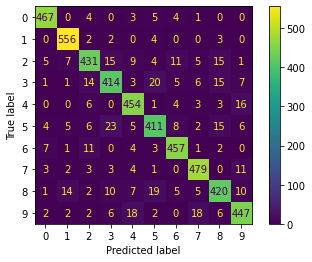

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(
    confusion_matrix=cnf_matrix,
)
disp.plot(ax=plt.subplots(1, 1, facecolor='white')[1])

## Support Vector Machine

In [33]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param = {'C':np.logspace(-3,3,7), 
         'kernel':('linear','poly','rbf','sigmoid')}
svc = svm.SVC(random_state=16, verbose=1)
svc_cv = GridSearchCV(svc, param, cv=5, scoring='accuracy')
svc_cv.fit(sample_digits, sample_labels)

[LibSVM]*
optimization finished, #iter = 115
obj = -0.021554, rho = -0.113713
nSV = 61, nBSV = 28
*
optimization finished, #iter = 267
obj = -0.061530, rho = 0.408494
nSV = 130, nBSV = 71
*
optimization finished, #iter = 273
obj = -0.059028, rho = 0.480435
nSV = 127, nBSV = 69
*
optimization finished, #iter = 213
obj = -0.039945, rho = 0.173961
nSV = 96, nBSV = 47
*
optimization finished, #iter = 320
obj = -0.078346, rho = 0.834600
nSV = 158, nBSV = 99
*
optimization finished, #iter = 293
obj = -0.059317, rho = 0.112098
nSV = 127, nBSV = 71
*
optimization finished, #iter = 218
obj = -0.039817, rho = 0.108981
nSV = 95, nBSV = 46
*
optimization finished, #iter = 252
obj = -0.062672, rho = 0.503793
nSV = 123, nBSV = 80
*
optimization finished, #iter = 181
obj = -0.044085, rho = 0.275037
nSV = 97, nBSV = 49
*
optimization finished, #iter = 194
obj = -0.061455, rho = 0.697979
nSV = 126, nBSV = 75
*
optimization finished, #iter = 177
obj = -0.071522, rho = 0.828056
nSV = 130, nBSV = 90
*
opt

[LibSVM]*
optimization finished, #iter = 163
obj = -0.021786, rho = -0.116823
nSV = 59, nBSV = 19
*
optimization finished, #iter = 350
obj = -0.061750, rho = 0.290091
nSV = 130, nBSV = 69
*
optimization finished, #iter = 228
obj = -0.065152, rho = 0.463425
nSV = 130, nBSV = 80
*
optimization finished, #iter = 258
obj = -0.041902, rho = 0.089919
nSV = 104, nBSV = 52
*
optimization finished, #iter = 392
obj = -0.080114, rho = 0.803979
nSV = 163, nBSV = 94
*
optimization finished, #iter = 287
obj = -0.064853, rho = 0.077264
nSV = 132, nBSV = 76
*
optimization finished, #iter = 200
obj = -0.040356, rho = 0.087498
nSV = 99, nBSV = 47
*
optimization finished, #iter = 218
obj = -0.065200, rho = 0.499435
nSV = 124, nBSV = 82
*
optimization finished, #iter = 225
obj = -0.044904, rho = 0.283736
nSV = 103, nBSV = 52
*
optimization finished, #iter = 185
obj = -0.060219, rho = 0.590431
nSV = 121, nBSV = 73
*
optimization finished, #iter = 192
obj = -0.075328, rho = 0.832237
nSV = 142, nBSV = 99
*
o

[LibSVM]*
optimization finished, #iter = 98
obj = -0.023214, rho = -0.157734
nSV = 58, nBSV = 26
*
optimization finished, #iter = 269
obj = -0.065649, rho = 0.339704
nSV = 131, nBSV = 84
*
optimization finished, #iter = 205
obj = -0.061497, rho = 0.389751
nSV = 121, nBSV = 74
*
optimization finished, #iter = 223
obj = -0.042612, rho = 0.096422
nSV = 99, nBSV = 49
*
optimization finished, #iter = 401
obj = -0.082121, rho = 0.759744
nSV = 165, nBSV = 96
*
optimization finished, #iter = 215
obj = -0.065795, rho = 0.046498
nSV = 132, nBSV = 80
*
optimization finished, #iter = 157
obj = -0.039714, rho = 0.012808
nSV = 95, nBSV = 50
*
optimization finished, #iter = 190
obj = -0.069335, rho = 0.505468
nSV = 131, nBSV = 90
*
optimization finished, #iter = 183
obj = -0.047223, rho = 0.226456
nSV = 96, nBSV = 56
*
optimization finished, #iter = 196
obj = -0.064004, rho = 0.687930
nSV = 126, nBSV = 80
*
optimization finished, #iter = 221
obj = -0.074266, rho = 0.853194
nSV = 136, nBSV = 96
*
opti

[LibSVM]*
optimization finished, #iter = 464
obj = -0.714319, rho = 0.996664
nSV = 728, nBSV = 715
*
optimization finished, #iter = 380
obj = -0.711648, rho = 0.663503
nSV = 725, nBSV = 719
*
optimization finished, #iter = 436
obj = -0.714612, rho = 0.993875
nSV = 747, nBSV = 706
*
optimization finished, #iter = 406
obj = -0.714662, rho = 0.995631
nSV = 735, nBSV = 715
*
optimization finished, #iter = 391
obj = -0.714565, rho = 0.969406
nSV = 730, nBSV = 718
*
optimization finished, #iter = 419
obj = -0.714044, rho = 0.978536
nSV = 740, nBSV = 714
*
optimization finished, #iter = 424
obj = -0.713894, rho = 0.976822
nSV = 741, nBSV = 712
*
optimization finished, #iter = 439
obj = -0.714836, rho = 0.997547
nSV = 737, nBSV = 706
*
optimization finished, #iter = 416
obj = -0.714545, rho = 0.995532
nSV = 737, nBSV = 713
*
optimization finished, #iter = 370
obj = -0.721006, rho = -0.997423
nSV = 735, nBSV = 724
*
optimization finished, #iter = 455
obj = -0.849109, rho = -0.996454
nSV = 868, 

[LibSVM]*
optimization finished, #iter = 454
obj = -0.715291, rho = 0.997560
nSV = 729, nBSV = 717
*
optimization finished, #iter = 396
obj = -0.713798, rho = 0.877515
nSV = 726, nBSV = 717
*
optimization finished, #iter = 440
obj = -0.715498, rho = 0.995239
nSV = 749, nBSV = 707
*
optimization finished, #iter = 407
obj = -0.715558, rho = 0.996410
nSV = 736, nBSV = 711
*
optimization finished, #iter = 406
obj = -0.715463, rho = 0.976970
nSV = 730, nBSV = 717
*
optimization finished, #iter = 419
obj = -0.715207, rho = 0.980304
nSV = 739, nBSV = 715
*
optimization finished, #iter = 441
obj = -0.714851, rho = 0.979579
nSV = 747, nBSV = 711
*
optimization finished, #iter = 432
obj = -0.715687, rho = 0.998104
nSV = 740, nBSV = 707
*
optimization finished, #iter = 413
obj = -0.715479, rho = 0.997131
nSV = 742, nBSV = 714
*
optimization finished, #iter = 369
obj = -0.726915, rho = -0.998082
nSV = 736, nBSV = 730
*
optimization finished, #iter = 450
obj = -0.852104, rho = -0.997221
nSV = 868, 

[LibSVM]*
optimization finished, #iter = 389
obj = -0.695897, rho = 0.842594
nSV = 724, nBSV = 724
*
optimization finished, #iter = 366
obj = -0.714240, rho = 0.975485
nSV = 724, nBSV = 724
*
optimization finished, #iter = 430
obj = -0.713715, rho = 0.960234
nSV = 724, nBSV = 724
*
optimization finished, #iter = 386
obj = -0.709265, rho = 0.917729
nSV = 724, nBSV = 724
*
optimization finished, #iter = 374
obj = -0.715478, rho = 0.964706
nSV = 724, nBSV = 724
*
optimization finished, #iter = 398
obj = -0.713076, rho = 0.953037
nSV = 724, nBSV = 724
*
optimization finished, #iter = 412
obj = -0.711142, rho = 0.952925
nSV = 724, nBSV = 724
*
optimization finished, #iter = 395
obj = -0.712167, rho = 0.934981
nSV = 724, nBSV = 724
*
optimization finished, #iter = 401
obj = -0.708032, rho = 0.913561
nSV = 724, nBSV = 724
*
optimization finished, #iter = 367
obj = -0.712623, rho = -0.845417
nSV = 732, nBSV = 732
*
optimization finished, #iter = 432
obj = -0.839302, rho = -0.849780
nSV = 862, 

[LibSVM]*
optimization finished, #iter = 385
obj = -0.694664, rho = 0.844348
nSV = 722, nBSV = 722
*
optimization finished, #iter = 366
obj = -0.712458, rho = 0.977985
nSV = 722, nBSV = 722
*
optimization finished, #iter = 430
obj = -0.712306, rho = 0.961861
nSV = 723, nBSV = 721
*
optimization finished, #iter = 387
obj = -0.708233, rho = 0.922989
nSV = 722, nBSV = 722
*
optimization finished, #iter = 374
obj = -0.713903, rho = 0.966893
nSV = 722, nBSV = 722
*
optimization finished, #iter = 399
obj = -0.711636, rho = 0.955428
nSV = 722, nBSV = 722
*
optimization finished, #iter = 412
obj = -0.709649, rho = 0.956766
nSV = 722, nBSV = 722
*
optimization finished, #iter = 392
obj = -0.710504, rho = 0.934828
nSV = 722, nBSV = 722
*
optimization finished, #iter = 400
obj = -0.707096, rho = 0.919608
nSV = 722, nBSV = 722
*
optimization finished, #iter = 367
obj = -0.712337, rho = -0.844147
nSV = 732, nBSV = 732
*
optimization finished, #iter = 432
obj = -0.839312, rho = -0.849037
nSV = 862, 

[LibSVM]*
optimization finished, #iter = 389
obj = -0.696284, rho = 0.842895
nSV = 724, nBSV = 724
*
optimization finished, #iter = 367
obj = -0.714329, rho = 0.973018
nSV = 724, nBSV = 724
*
optimization finished, #iter = 429
obj = -0.713903, rho = 0.960204
nSV = 724, nBSV = 724
*
optimization finished, #iter = 386
obj = -0.709855, rho = 0.920653
nSV = 724, nBSV = 724
*
optimization finished, #iter = 373
obj = -0.715571, rho = 0.964715
nSV = 724, nBSV = 724
*
optimization finished, #iter = 398
obj = -0.713440, rho = 0.953650
nSV = 724, nBSV = 724
*
optimization finished, #iter = 412
obj = -0.711597, rho = 0.954111
nSV = 724, nBSV = 724
*
optimization finished, #iter = 398
obj = -0.712831, rho = 0.939228
nSV = 724, nBSV = 724
*
optimization finished, #iter = 401
obj = -0.708972, rho = 0.919527
nSV = 724, nBSV = 724
*
optimization finished, #iter = 367
obj = -0.714843, rho = -0.847663
nSV = 734, nBSV = 734
*
optimization finished, #iter = 431
obj = -0.839541, rho = -0.849644
nSV = 862, 

[LibSVM]*
optimization finished, #iter = 390
obj = -0.686451, rho = 0.907165
nSV = 722, nBSV = 722
*
optimization finished, #iter = 365
obj = -0.699518, rho = 0.891535
nSV = 722, nBSV = 722
*
optimization finished, #iter = 394
obj = -0.701962, rho = 0.948484
nSV = 722, nBSV = 722
*
optimization finished, #iter = 376
obj = -0.697988, rho = 0.936486
nSV = 722, nBSV = 722
*
optimization finished, #iter = 367
obj = -0.706607, rho = 0.965648
nSV = 722, nBSV = 722
*
optimization finished, #iter = 378
obj = -0.700602, rho = 0.923568
nSV = 722, nBSV = 722
*
optimization finished, #iter = 386
obj = -0.693910, rho = 0.910304
nSV = 722, nBSV = 722
*
optimization finished, #iter = 384
obj = -0.701792, rho = 0.953844
nSV = 723, nBSV = 721
*
optimization finished, #iter = 381
obj = -0.695147, rho = 0.928488
nSV = 722, nBSV = 722
*
optimization finished, #iter = 367
obj = -0.714376, rho = -0.937523
nSV = 732, nBSV = 732
*
optimization finished, #iter = 433
obj = -0.841861, rho = -0.925734
nSV = 864, 

[LibSVM]*
optimization finished, #iter = 394
obj = -0.690934, rho = 0.915976
nSV = 724, nBSV = 724
*
optimization finished, #iter = 365
obj = -0.704005, rho = 0.899548
nSV = 724, nBSV = 724
*
optimization finished, #iter = 393
obj = -0.704352, rho = 0.948643
nSV = 724, nBSV = 724
*
optimization finished, #iter = 379
obj = -0.701472, rho = 0.940432
nSV = 724, nBSV = 724
*
optimization finished, #iter = 368
obj = -0.709119, rho = 0.965086
nSV = 724, nBSV = 724
*
optimization finished, #iter = 382
obj = -0.704121, rho = 0.927610
nSV = 724, nBSV = 724
*
optimization finished, #iter = 393
obj = -0.697204, rho = 0.915364
nSV = 724, nBSV = 724
*
optimization finished, #iter = 388
obj = -0.704945, rho = 0.956736
nSV = 724, nBSV = 724
*
optimization finished, #iter = 382
obj = -0.699182, rho = 0.936151
nSV = 724, nBSV = 724
*
optimization finished, #iter = 368
obj = -0.718208, rho = -0.943719
nSV = 734, nBSV = 734
*
optimization finished, #iter = 432
obj = -0.842060, rho = -0.935299
nSV = 862, 

[LibSVM]*
optimization finished, #iter = 164
obj = -0.024881, rho = -0.117372
nSV = 43, nBSV = 0
*
optimization finished, #iter = 570
obj = -0.115129, rho = 0.490233
nSV = 88, nBSV = 3
*
optimization finished, #iter = 588
obj = -0.121584, rho = 0.591533
nSV = 82, nBSV = 4
*
optimization finished, #iter = 342
obj = -0.058707, rho = 0.054698
nSV = 62, nBSV = 0
*.*
optimization finished, #iter = 846
obj = -0.181600, rho = 1.056369
nSV = 100, nBSV = 9
*
optimization finished, #iter = 383
obj = -0.137766, rho = 0.198748
nSV = 73, nBSV = 7
*
optimization finished, #iter = 364
obj = -0.058942, rho = 0.164550
nSV = 66, nBSV = 0
*
optimization finished, #iter = 527
obj = -0.127008, rho = 0.613648
nSV = 80, nBSV = 7
*
optimization finished, #iter = 289
obj = -0.093902, rho = 0.506789
nSV = 61, nBSV = 2
*
optimization finished, #iter = 294
obj = -0.118378, rho = 1.072617
nSV = 65, nBSV = 2
*
optimization finished, #iter = 383
obj = -0.167773, rho = 1.201680
nSV = 71, nBSV = 9
*
optimization finis

*
optimization finished, #iter = 395
obj = -0.156785, rho = 0.109353
nSV = 73, nBSV = 8
*
optimization finished, #iter = 405
obj = -0.063041, rho = 0.111424
nSV = 63, nBSV = 0
*
optimization finished, #iter = 678
obj = -0.151827, rho = 0.663418
nSV = 88, nBSV = 8
*
optimization finished, #iter = 494
obj = -0.093047, rho = 0.471708
nSV = 74, nBSV = 4
*
optimization finished, #iter = 364
obj = -0.121127, rho = 0.629754
nSV = 71, nBSV = 3
*
optimization finished, #iter = 387
obj = -0.192324, rho = 1.229523
nSV = 77, nBSV = 13
*
optimization finished, #iter = 250
obj = -0.089708, rho = 0.358078
nSV = 55, nBSV = 4
*
optimization finished, #iter = 386
obj = -0.139389, rho = 0.923671
nSV = 77, nBSV = 6
*
optimization finished, #iter = 199
obj = -0.072247, rho = 0.324840
nSV = 50, nBSV = 3
*
optimization finished, #iter = 248
obj = -0.172813, rho = 0.636458
nSV = 65, nBSV = 12
*
optimization finished, #iter = 470
obj = -0.346350, rho = 1.600855
nSV = 94, nBSV = 29
*
optimization finished, #ite

*
optimization finished, #iter = 472
obj = -0.169910, rho = 1.296349
nSV = 76, nBSV = 8
*
optimization finished, #iter = 267
obj = -0.091789, rho = 0.378604
nSV = 57, nBSV = 4
*
optimization finished, #iter = 412
obj = -0.141061, rho = 0.829092
nSV = 79, nBSV = 9
*
optimization finished, #iter = 185
obj = -0.072001, rho = 0.352577
nSV = 50, nBSV = 4
*
optimization finished, #iter = 224
obj = -0.125766, rho = 0.397928
nSV = 58, nBSV = 10
*
optimization finished, #iter = 392
obj = -0.304283, rho = 1.636845
nSV = 88, nBSV = 27
*
optimization finished, #iter = 299
obj = -0.128665, rho = 0.456467
nSV = 64, nBSV = 8
.*
optimization finished, #iter = 1140
obj = -0.384135, rho = 0.303247
nSV = 138, nBSV = 23
*
optimization finished, #iter = 715
obj = -0.123130, rho = -0.274462
nSV = 96, nBSV = 1
*
optimization finished, #iter = 688
obj = -0.200086, rho = 0.043617
nSV = 103, nBSV = 7
*
optimization finished, #iter = 732
obj = -0.173477, rho = -0.487615
nSV = 99, nBSV = 6
*
optimization finished

*
optimization finished, #iter = 493
obj = -8.034699, rho = -0.967348
nSV = 848, nBSV = 823
*
optimization finished, #iter = 406
obj = -7.602756, rho = -0.969584
nSV = 781, nBSV = 768
*
optimization finished, #iter = 406
obj = -7.228997, rho = -0.972998
nSV = 753, nBSV = 732
*
optimization finished, #iter = 502
obj = -7.337634, rho = -0.970309
nSV = 791, nBSV = 758
*
optimization finished, #iter = 477
obj = -7.513045, rho = -0.969374
nSV = 810, nBSV = 784
*
optimization finished, #iter = 415
obj = -7.783685, rho = -0.970351
nSV = 799, nBSV = 780
*
optimization finished, #iter = 446
obj = -7.777415, rho = -0.969773
nSV = 802, nBSV = 785
*
optimization finished, #iter = 479
obj = -6.857218, rho = 0.960740
nSV = 750, nBSV = 698
*
optimization finished, #iter = 410
obj = -6.824668, rho = 0.950648
nSV = 736, nBSV = 708
*
optimization finished, #iter = 406
obj = -6.793073, rho = 0.752548
nSV = 727, nBSV = 710
*
optimization finished, #iter = 463
obj = -6.744966, rho = 0.784440
nSV = 740, nBS

*
optimization finished, #iter = 479
obj = -8.141947, rho = -0.974609
nSV = 858, nBSV = 835
*
optimization finished, #iter = 394
obj = -7.624312, rho = -0.977219
nSV = 775, nBSV = 767
*
optimization finished, #iter = 408
obj = -7.253110, rho = -0.979742
nSV = 749, nBSV = 734
*
optimization finished, #iter = 477
obj = -7.413332, rho = -0.977711
nSV = 790, nBSV = 764
*
optimization finished, #iter = 475
obj = -7.588194, rho = -0.976744
nSV = 813, nBSV = 790
*
optimization finished, #iter = 425
obj = -7.837399, rho = -0.977611
nSV = 801, nBSV = 787
*
optimization finished, #iter = 437
obj = -7.791728, rho = -0.977097
nSV = 804, nBSV = 785
*
optimization finished, #iter = 534
obj = -6.991617, rho = 0.966875
nSV = 755, nBSV = 710
*
optimization finished, #iter = 426
obj = -6.971135, rho = 0.954976
nSV = 740, nBSV = 712
*
optimization finished, #iter = 428
obj = -6.938209, rho = 0.706177
nSV = 735, nBSV = 720
*
optimization finished, #iter = 469
obj = -6.896002, rho = 0.785609
nSV = 744, nBS

*
optimization finished, #iter = 433
obj = -6.350157, rho = 0.502196
nSV = 863, nBSV = 861
*
optimization finished, #iter = 388
obj = -5.923756, rho = 0.101700
nSV = 773, nBSV = 771
*
optimization finished, #iter = 376
obj = -5.845866, rho = 0.266391
nSV = 749, nBSV = 747
*
optimization finished, #iter = 399
obj = -5.582009, rho = 0.515787
nSV = 797, nBSV = 795
*
optimization finished, #iter = 414
obj = -5.979486, rho = 0.528094
nSV = 825, nBSV = 823
*
optimization finished, #iter = 400
obj = -6.332991, rho = 0.145497
nSV = 796, nBSV = 796
*
optimization finished, #iter = 403
obj = -6.169578, rho = 0.096546
nSV = 803, nBSV = 801
*
optimization finished, #iter = 377
obj = -6.809304, rho = 0.525313
nSV = 733, nBSV = 731
*
optimization finished, #iter = 370
obj = -6.256903, rho = 0.104481
nSV = 733, nBSV = 730
*
optimization finished, #iter = 371
obj = -6.639580, rho = 0.416935
nSV = 734, nBSV = 730
*
optimization finished, #iter = 374
obj = -6.663003, rho = 0.476692
nSV = 735, nBSV = 730

*
optimization finished, #iter = 432
obj = -6.351203, rho = 0.509633
nSV = 862, nBSV = 862
*
optimization finished, #iter = 389
obj = -5.859565, rho = 0.156329
nSV = 775, nBSV = 773
*
optimization finished, #iter = 376
obj = -5.849114, rho = 0.273998
nSV = 749, nBSV = 747
*
optimization finished, #iter = 399
obj = -5.581513, rho = 0.523939
nSV = 798, nBSV = 798
*
optimization finished, #iter = 413
obj = -5.953355, rho = 0.546791
nSV = 824, nBSV = 824
*
optimization finished, #iter = 399
obj = -6.305456, rho = 0.148408
nSV = 795, nBSV = 793
*
optimization finished, #iter = 402
obj = -6.145399, rho = 0.125244
nSV = 802, nBSV = 802
*
optimization finished, #iter = 382
obj = -6.795803, rho = 0.521051
nSV = 734, nBSV = 730
*
optimization finished, #iter = 371
obj = -6.286539, rho = 0.132202
nSV = 733, nBSV = 730
*
optimization finished, #iter = 370
obj = -6.625039, rho = 0.424176
nSV = 733, nBSV = 731
*
optimization finished, #iter = 379
obj = -6.676148, rho = 0.482059
nSV = 735, nBSV = 728

*
optimization finished, #iter = 432
obj = -6.374134, rho = 0.503564
nSV = 863, nBSV = 861
*
optimization finished, #iter = 386
obj = -5.907045, rho = 0.123073
nSV = 772, nBSV = 772
*
optimization finished, #iter = 373
obj = -5.838346, rho = 0.263679
nSV = 746, nBSV = 746
*
optimization finished, #iter = 399
obj = -5.556707, rho = 0.514506
nSV = 797, nBSV = 795
*
optimization finished, #iter = 414
obj = -5.921978, rho = 0.539211
nSV = 826, nBSV = 822
*
optimization finished, #iter = 399
obj = -6.284403, rho = 0.196543
nSV = 797, nBSV = 795
*
optimization finished, #iter = 402
obj = -6.135587, rho = 0.135296
nSV = 803, nBSV = 801
*
optimization finished, #iter = 381
obj = -6.829374, rho = 0.551840
nSV = 737, nBSV = 731
*
optimization finished, #iter = 376
obj = -6.306333, rho = 0.146263
nSV = 736, nBSV = 730
*
optimization finished, #iter = 372
obj = -6.635467, rho = 0.443222
nSV = 735, nBSV = 732
*
optimization finished, #iter = 377
obj = -6.686357, rho = 0.497156
nSV = 735, nBSV = 731

*
optimization finished, #iter = 431
obj = -6.428189, rho = -0.267696
nSV = 860, nBSV = 860
*
optimization finished, #iter = 390
obj = -5.800438, rho = -0.261960
nSV = 775, nBSV = 772
*
optimization finished, #iter = 375
obj = -6.034382, rho = -0.366608
nSV = 749, nBSV = 747
*
optimization finished, #iter = 392
obj = -5.489066, rho = -0.288331
nSV = 783, nBSV = 781
*
optimization finished, #iter = 408
obj = -5.920750, rho = -0.317425
nSV = 812, nBSV = 809
*
optimization finished, #iter = 398
obj = -6.368344, rho = -0.300561
nSV = 794, nBSV = 794
*
optimization finished, #iter = 401
obj = -6.137999, rho = -0.303423
nSV = 800, nBSV = 800
*
optimization finished, #iter = 384
obj = -6.235681, rho = 0.558872
nSV = 734, nBSV = 730
*
optimization finished, #iter = 370
obj = -5.622415, rho = 0.372131
nSV = 731, nBSV = 729
*
optimization finished, #iter = 366
obj = -5.804481, rho = 0.287679
nSV = 732, nBSV = 732
*
optimization finished, #iter = 369
obj = -6.051706, rho = 0.425051
nSV = 733, nBS

*
optimization finished, #iter = 432
obj = -6.625999, rho = -0.352987
nSV = 862, nBSV = 862
*
optimization finished, #iter = 388
obj = -5.980291, rho = -0.343695
nSV = 773, nBSV = 771
*
optimization finished, #iter = 374
obj = -6.173314, rho = -0.437521
nSV = 747, nBSV = 745
*
optimization finished, #iter = 397
obj = -5.769455, rho = -0.354349
nSV = 793, nBSV = 791
*
optimization finished, #iter = 410
obj = -6.084751, rho = -0.358357
nSV = 820, nBSV = 820
*
optimization finished, #iter = 400
obj = -6.568293, rho = -0.383404
nSV = 797, nBSV = 795
*
optimization finished, #iter = 403
obj = -6.335598, rho = -0.368992
nSV = 803, nBSV = 801
*
optimization finished, #iter = 385
obj = -6.297069, rho = 0.564896
nSV = 736, nBSV = 733
*
optimization finished, #iter = 373
obj = -5.821350, rho = 0.424344
nSV = 736, nBSV = 732
*
optimization finished, #iter = 367
obj = -5.997858, rho = 0.361811
nSV = 734, nBSV = 734
*
optimization finished, #iter = 370
obj = -6.160485, rho = 0.455909
nSV = 734, nBS

*
optimization finished, #iter = 259
obj = -0.106424, rho = 0.338043
nSV = 49, nBSV = 0
*
optimization finished, #iter = 413
obj = -0.137020, rho = 0.935020
nSV = 70, nBSV = 0
*
optimization finished, #iter = 339
obj = -0.072151, rho = 0.245670
nSV = 56, nBSV = 0
*
optimization finished, #iter = 280
obj = -0.246954, rho = 0.839694
nSV = 59, nBSV = 0
*
optimization finished, #iter = 699
obj = -0.331157, rho = 1.860995
nSV = 76, nBSV = 0
*
optimization finished, #iter = 390
obj = -0.214999, rho = 0.492039
nSV = 58, nBSV = 0
.*.*
optimization finished, #iter = 1873
obj = -0.487696, rho = 0.188688
nSV = 126, nBSV = 0
*.*
optimization finished, #iter = 792
obj = -0.123869, rho = -0.245893
nSV = 91, nBSV = 0
*.*
optimization finished, #iter = 1180
obj = -0.247665, rho = 0.177918
nSV = 112, nBSV = 0
*.*
optimization finished, #iter = 895
obj = -0.138493, rho = -0.363394
nSV = 104, nBSV = 0
*
optimization finished, #iter = 763
obj = -0.240483, rho = -0.433299
nSV = 97, nBSV = 0
*.*
optimizatio

*
optimization finished, #iter = 297
obj = -0.237785, rho = 0.705283
nSV = 60, nBSV = 0
*
optimization finished, #iter = 773
obj = -0.488974, rho = 1.750784
nSV = 77, nBSV = 0
*
optimization finished, #iter = 308
obj = -0.247362, rho = 0.547262
nSV = 53, nBSV = 0
.*.*
optimization finished, #iter = 1664
obj = -0.364990, rho = 0.497544
nSV = 131, nBSV = 0
*
optimization finished, #iter = 595
obj = -0.133179, rho = -0.196148
nSV = 80, nBSV = 0
*.*
optimization finished, #iter = 775
obj = -0.202502, rho = 0.383199
nSV = 101, nBSV = 0
*.*
optimization finished, #iter = 889
obj = -0.151399, rho = -0.377822
nSV = 107, nBSV = 0
*
optimization finished, #iter = 735
obj = -0.236459, rho = -0.205536
nSV = 92, nBSV = 0
*.*
optimization finished, #iter = 953
obj = -0.314132, rho = 0.586895
nSV = 104, nBSV = 0
*
optimization finished, #iter = 544
obj = -0.113481, rho = 0.044776
nSV = 78, nBSV = 0
*
optimization finished, #iter = 459
obj = -0.122641, rho = -0.651915
nSV = 80, nBSV = 0
.*.*
optimizat

*
optimization finished, #iter = 600
obj = -0.402381, rho = 1.847042
nSV = 76, nBSV = 0
*
optimization finished, #iter = 317
obj = -0.166846, rho = 0.508818
nSV = 56, nBSV = 0
.*
optimization finished, #iter = 1589
obj = -0.449612, rho = 0.130250
nSV = 131, nBSV = 0
*
optimization finished, #iter = 743
obj = -0.126400, rho = -0.268020
nSV = 90, nBSV = 0
*.*
optimization finished, #iter = 843
obj = -0.204153, rho = 0.019269
nSV = 101, nBSV = 0
*.*
optimization finished, #iter = 921
obj = -0.177040, rho = -0.476475
nSV = 97, nBSV = 0
*
optimization finished, #iter = 733
obj = -0.226545, rho = -0.367152
nSV = 94, nBSV = 0
.*
optimization finished, #iter = 1126
obj = -0.311636, rho = 0.371910
nSV = 106, nBSV = 0
*
optimization finished, #iter = 755
obj = -0.136226, rho = 0.015788
nSV = 85, nBSV = 0
*
optimization finished, #iter = 499
obj = -0.140886, rho = -0.621207
nSV = 78, nBSV = 0
.*.*
optimization finished, #iter = 2180
obj = -0.966764, rho = 0.181257
nSV = 139, nBSV = 0
*
optimizati

*
optimization finished, #iter = 549
obj = -58.440400, rho = -0.756173
nSV = 737, nBSV = 688
*
optimization finished, #iter = 507
obj = -69.555152, rho = -0.708745
nSV = 799, nBSV = 771
*
optimization finished, #iter = 501
obj = -67.793837, rho = -0.712521
nSV = 788, nBSV = 763
*
optimization finished, #iter = 559
obj = -53.030165, rho = 0.790968
nSV = 688, nBSV = 601
*
optimization finished, #iter = 496
obj = -52.088010, rho = 0.820487
nSV = 676, nBSV = 596
*
optimization finished, #iter = 521
obj = -51.207730, rho = 0.656688
nSV = 668, nBSV = 590
*
optimization finished, #iter = 572
obj = -48.847077, rho = 0.315382
nSV = 656, nBSV = 572
*
optimization finished, #iter = 481
obj = -48.909959, rho = 0.434571
nSV = 647, nBSV = 573
*
optimization finished, #iter = 550
obj = -52.897473, rho = 0.879722
nSV = 677, nBSV = 589
*
optimization finished, #iter = 494
obj = -51.442314, rho = 0.800434
nSV = 670, nBSV = 596
*
optimization finished, #iter = 510
obj = -65.242602, rho = -0.057799
nSV = 

*
optimization finished, #iter = 582
obj = -58.093487, rho = -0.809151
nSV = 732, nBSV = 687
*
optimization finished, #iter = 631
obj = -60.343382, rho = -0.812046
nSV = 745, nBSV = 698
*
optimization finished, #iter = 546
obj = -72.139417, rho = -0.779642
nSV = 797, nBSV = 780
*
optimization finished, #iter = 580
obj = -70.488876, rho = -0.779090
nSV = 794, nBSV = 770
*
optimization finished, #iter = 592
obj = -56.638687, rho = 0.796267
nSV = 713, nBSV = 633
*
optimization finished, #iter = 564
obj = -55.559729, rho = 0.823030
nSV = 687, nBSV = 626
*
optimization finished, #iter = 522
obj = -54.623937, rho = 0.638822
nSV = 681, nBSV = 618
*
optimization finished, #iter = 594
obj = -52.128191, rho = 0.294678
nSV = 685, nBSV = 608
*
optimization finished, #iter = 544
obj = -52.218951, rho = 0.380262
nSV = 675, nBSV = 609
*
optimization finished, #iter = 587
obj = -56.317901, rho = 0.892765
nSV = 696, nBSV = 621
*
optimization finished, #iter = 546
obj = -55.142009, rho = 0.827645
nSV = 

*
optimization finished, #iter = 180
obj = -14.296122, rho = 0.976404
nSV = 265, nBSV = 214
*
optimization finished, #iter = 195
obj = -17.418453, rho = 0.989130
nSV = 306, nBSV = 256
*
optimization finished, #iter = 219
obj = -23.160842, rho = 0.970681
nSV = 359, nBSV = 332
*
optimization finished, #iter = 195
obj = -18.058386, rho = 0.927742
nSV = 307, nBSV = 267
*
optimization finished, #iter = 316
obj = -39.149560, rho = -0.630210
nSV = 553, nBSV = 519
*
optimization finished, #iter = 281
obj = -24.658485, rho = -0.932339
nSV = 403, nBSV = 329
*
optimization finished, #iter = 293
obj = -32.636596, rho = -0.672154
nSV = 493, nBSV = 452
*
optimization finished, #iter = 289
obj = -33.133686, rho = -0.521629
nSV = 497, nBSV = 457
*
optimization finished, #iter = 279
obj = -31.401911, rho = -0.260580
nSV = 465, nBSV = 425
*
optimization finished, #iter = 302
obj = -31.485781, rho = -0.914085
nSV = 482, nBSV = 416
*
optimization finished, #iter = 259
obj = -23.069825, rho = -0.891135
nSV

*
optimization finished, #iter = 186
obj = -18.152380, rho = 1.174902
nSV = 302, nBSV = 264
*
optimization finished, #iter = 200
obj = -14.607141, rho = 0.981275
nSV = 277, nBSV = 209
*
optimization finished, #iter = 192
obj = -17.291214, rho = 0.987459
nSV = 305, nBSV = 254
*
optimization finished, #iter = 222
obj = -23.472511, rho = 0.956872
nSV = 363, nBSV = 329
*
optimization finished, #iter = 189
obj = -17.870500, rho = 0.921125
nSV = 304, nBSV = 262
*
optimization finished, #iter = 315
obj = -38.662871, rho = -0.650752
nSV = 548, nBSV = 512
*
optimization finished, #iter = 277
obj = -24.999258, rho = -0.919313
nSV = 405, nBSV = 340
*
optimization finished, #iter = 306
obj = -32.058097, rho = -0.674270
nSV = 493, nBSV = 441
*
optimization finished, #iter = 301
obj = -33.227902, rho = -0.555655
nSV = 506, nBSV = 458
*
optimization finished, #iter = 274
obj = -31.804879, rho = -0.244828
nSV = 473, nBSV = 433
*
optimization finished, #iter = 303
obj = -31.271583, rho = -0.914752
nSV 

*
optimization finished, #iter = 191
obj = -18.056534, rho = 1.138674
nSV = 302, nBSV = 263
*
optimization finished, #iter = 198
obj = -14.427305, rho = 0.968209
nSV = 272, nBSV = 205
*
optimization finished, #iter = 201
obj = -16.676054, rho = 0.980011
nSV = 301, nBSV = 244
*
optimization finished, #iter = 211
obj = -22.996656, rho = 0.971162
nSV = 357, nBSV = 324
*
optimization finished, #iter = 190
obj = -17.704607, rho = 0.916610
nSV = 295, nBSV = 261
*
optimization finished, #iter = 320
obj = -39.392931, rho = -0.535655
nSV = 558, nBSV = 517
*
optimization finished, #iter = 276
obj = -25.344709, rho = -0.911252
nSV = 406, nBSV = 339
*
optimization finished, #iter = 298
obj = -31.961021, rho = -0.647771
nSV = 483, nBSV = 436
*
optimization finished, #iter = 296
obj = -33.160862, rho = -0.535926
nSV = 503, nBSV = 457
*
optimization finished, #iter = 280
obj = -31.451573, rho = -0.214692
nSV = 465, nBSV = 420
*
optimization finished, #iter = 298
obj = -32.905132, rho = -0.881583
nSV 

*
optimization finished, #iter = 161
obj = -18.048250, rho = 0.234277
nSV = 293, nBSV = 279
*
optimization finished, #iter = 190
obj = -20.249204, rho = 0.479339
nSV = 326, nBSV = 305
*
optimization finished, #iter = 149
obj = -14.991419, rho = 0.056567
nSV = 250, nBSV = 231
*
optimization finished, #iter = 159
obj = -18.350218, rho = 0.149083
nSV = 293, nBSV = 281
*
optimization finished, #iter = 207
obj = -25.332490, rho = 0.520521
nSV = 375, nBSV = 360
*
optimization finished, #iter = 172
obj = -18.756189, rho = 0.274759
nSV = 305, nBSV = 287
*
optimization finished, #iter = 283
obj = -28.959348, rho = 0.130951
nSV = 408, nBSV = 389
*
optimization finished, #iter = 216
obj = -20.648285, rho = 0.076566
nSV = 319, nBSV = 298
*
optimization finished, #iter = 225
obj = -23.971985, rho = 0.177021
nSV = 354, nBSV = 332
*
optimization finished, #iter = 245
obj = -24.982713, rho = -0.070209
nSV = 372, nBSV = 351
*
optimization finished, #iter = 180
obj = -18.920691, rho = -0.046886
nSV = 28

*
optimization finished, #iter = 209
obj = -21.909337, rho = 0.311151
nSV = 348, nBSV = 327
*
optimization finished, #iter = 167
obj = -18.757721, rho = 0.220335
nSV = 302, nBSV = 292
*
optimization finished, #iter = 195
obj = -21.569606, rho = 0.424608
nSV = 344, nBSV = 323
*
optimization finished, #iter = 156
obj = -16.354357, rho = 0.067538
nSV = 270, nBSV = 254
*
optimization finished, #iter = 169
obj = -19.022793, rho = 0.108750
nSV = 303, nBSV = 288
*
optimization finished, #iter = 216
obj = -26.736673, rho = 0.482114
nSV = 392, nBSV = 375
*
optimization finished, #iter = 181
obj = -19.884649, rho = 0.258327
nSV = 329, nBSV = 308
*
optimization finished, #iter = 266
obj = -28.727658, rho = 0.088710
nSV = 414, nBSV = 391
*
optimization finished, #iter = 199
obj = -22.471746, rho = 0.072076
nSV = 338, nBSV = 320
*
optimization finished, #iter = 215
obj = -25.383488, rho = 0.149303
nSV = 375, nBSV = 358
*
optimization finished, #iter = 225
obj = -25.773513, rho = -0.099203
nSV = 387

*
optimization finished, #iter = 433
obj = -0.176311, rho = 1.278163
nSV = 67, nBSV = 0
*
optimization finished, #iter = 259
obj = -0.106424, rho = 0.338043
nSV = 49, nBSV = 0
*
optimization finished, #iter = 413
obj = -0.137020, rho = 0.935020
nSV = 70, nBSV = 0
*
optimization finished, #iter = 339
obj = -0.072151, rho = 0.245670
nSV = 56, nBSV = 0
*
optimization finished, #iter = 280
obj = -0.246954, rho = 0.839694
nSV = 59, nBSV = 0
*
optimization finished, #iter = 699
obj = -0.331157, rho = 1.860995
nSV = 76, nBSV = 0
*
optimization finished, #iter = 390
obj = -0.214999, rho = 0.492039
nSV = 58, nBSV = 0
.*.*
optimization finished, #iter = 1873
obj = -0.487696, rho = 0.188688
nSV = 126, nBSV = 0
*.*
optimization finished, #iter = 792
obj = -0.123869, rho = -0.245893
nSV = 91, nBSV = 0
*.*
optimization finished, #iter = 1180
obj = -0.247665, rho = 0.177918
nSV = 112, nBSV = 0
*.*
optimization finished, #iter = 895
obj = -0.138493, rho = -0.363394
nSV = 104, nBSV = 0
*
optimization f

*
optimization finished, #iter = 308
obj = -0.247362, rho = 0.547262
nSV = 53, nBSV = 0
.*.*
optimization finished, #iter = 1664
obj = -0.364990, rho = 0.497544
nSV = 131, nBSV = 0
*
optimization finished, #iter = 595
obj = -0.133179, rho = -0.196148
nSV = 80, nBSV = 0
*.*
optimization finished, #iter = 775
obj = -0.202502, rho = 0.383199
nSV = 101, nBSV = 0
*.*
optimization finished, #iter = 889
obj = -0.151399, rho = -0.377822
nSV = 107, nBSV = 0
*
optimization finished, #iter = 735
obj = -0.236459, rho = -0.205536
nSV = 92, nBSV = 0
*.*
optimization finished, #iter = 953
obj = -0.314132, rho = 0.586895
nSV = 104, nBSV = 0
*
optimization finished, #iter = 544
obj = -0.113481, rho = 0.044776
nSV = 78, nBSV = 0
*
optimization finished, #iter = 459
obj = -0.122641, rho = -0.651915
nSV = 80, nBSV = 0
.*.*
optimization finished, #iter = 2048
obj = -0.883496, rho = 0.012287
nSV = 136, nBSV = 0
*
optimization finished, #iter = 399
obj = -0.104491, rho = -0.575801
nSV = 72, nBSV = 0
*
optimi

*.*
optimization finished, #iter = 921
obj = -0.177040, rho = -0.476475
nSV = 97, nBSV = 0
*
optimization finished, #iter = 733
obj = -0.226545, rho = -0.367152
nSV = 94, nBSV = 0
.*
optimization finished, #iter = 1126
obj = -0.311636, rho = 0.371910
nSV = 106, nBSV = 0
*
optimization finished, #iter = 755
obj = -0.136226, rho = 0.015788
nSV = 85, nBSV = 0
*
optimization finished, #iter = 499
obj = -0.140886, rho = -0.621207
nSV = 78, nBSV = 0
.*.*
optimization finished, #iter = 2180
obj = -0.966764, rho = 0.181257
nSV = 139, nBSV = 0
*
optimization finished, #iter = 408
obj = -0.105362, rho = -0.642010
nSV = 73, nBSV = 0
*
optimization finished, #iter = 780
obj = -0.184122, rho = -0.550253
nSV = 100, nBSV = 0
..*
optimization finished, #iter = 2437
obj = -1.124741, rho = -0.336058
nSV = 137, nBSV = 0
*
optimization finished, #iter = 744
obj = -0.362818, rho = -0.500719
nSV = 91, nBSV = 0
*
optimization finished, #iter = 597
obj = -0.202987, rho = 0.489801
nSV = 83, nBSV = 0
*
optimiza

*.*
optimization finished, #iter = 799
obj = -233.881050, rho = 0.434286
nSV = 486, nBSV = 264
*
optimization finished, #iter = 719
obj = -202.436682, rho = 0.016462
nSV = 428, nBSV = 248
*
optimization finished, #iter = 665
obj = -212.869440, rho = 0.196251
nSV = 436, nBSV = 260
*.*
optimization finished, #iter = 821
obj = -261.086028, rho = 0.719388
nSV = 524, nBSV = 292
*
optimization finished, #iter = 724
obj = -234.704897, rho = 0.526681
nSV = 463, nBSV = 281
*
optimization finished, #iter = 555
obj = -340.040187, rho = 0.228382
nSV = 576, nBSV = 442
*
optimization finished, #iter = 679
obj = -356.187542, rho = -0.184019
nSV = 605, nBSV = 422
*
optimization finished, #iter = 601
obj = -233.017041, rho = -0.458521
nSV = 459, nBSV = 298
*
optimization finished, #iter = 614
obj = -271.835617, rho = -0.321288
nSV = 506, nBSV = 346
*
optimization finished, #iter = 619
obj = -397.881636, rho = 0.335227
nSV = 646, nBSV = 492
*
optimization finished, #iter = 629
obj = -334.130861, rho = 0

*.*
optimization finished, #iter = 970
obj = -289.917882, rho = 0.528521
nSV = 551, nBSV = 340
*.*
optimization finished, #iter = 757
obj = -281.667808, rho = 0.629358
nSV = 515, nBSV = 343
*.*
optimization finished, #iter = 834
obj = -270.323992, rho = 0.431735
nSV = 512, nBSV = 329
*
optimization finished, #iter = 749
obj = -232.442270, rho = -0.023773
nSV = 467, nBSV = 286
*
optimization finished, #iter = 732
obj = -245.292444, rho = 0.150230
nSV = 471, nBSV = 295
*.*
optimization finished, #iter = 915
obj = -299.108105, rho = 0.720041
nSV = 546, nBSV = 346
*.*
optimization finished, #iter = 796
obj = -271.503522, rho = 0.546766
nSV = 502, nBSV = 332
*
optimization finished, #iter = 542
obj = -374.530285, rho = 0.220800
nSV = 607, nBSV = 482
*
optimization finished, #iter = 706
obj = -390.144218, rho = -0.199720
nSV = 621, nBSV = 474
*
optimization finished, #iter = 702
obj = -261.914736, rho = -0.472835
nSV = 503, nBSV = 342
*
optimization finished, #iter = 611
obj = -298.389177, r

*
optimization finished, #iter = 551
obj = -122.312582, rho = -0.192314
nSV = 329, nBSV = 100
*
optimization finished, #iter = 411
obj = -62.055074, rho = -0.657188
nSV = 234, nBSV = 47
*
optimization finished, #iter = 509
obj = -85.579796, rho = -0.393998
nSV = 285, nBSV = 60
*
optimization finished, #iter = 542
obj = -81.009539, rho = -0.032659
nSV = 281, nBSV = 46
*
optimization finished, #iter = 499
obj = -89.524452, rho = 0.122031
nSV = 284, nBSV = 59
*
optimization finished, #iter = 498
obj = -88.405375, rho = -0.583223
nSV = 276, nBSV = 67
*
optimization finished, #iter = 418
obj = -62.168794, rho = -0.455567
nSV = 223, nBSV = 41
*
optimization finished, #iter = 420
obj = -60.732830, rho = -0.525241
nSV = 216, nBSV = 43
*
optimization finished, #iter = 613
obj = -147.885087, rho = -0.247996
nSV = 356, nBSV = 139
*
optimization finished, #iter = 445
obj = -66.656720, rho = 0.099720
nSV = 236, nBSV = 40
*
optimization finished, #iter = 504
obj = -88.827031, rho = 0.256039
nSV = 27

*
optimization finished, #iter = 565
obj = -119.076163, rho = -0.267512
nSV = 341, nBSV = 100
*
optimization finished, #iter = 414
obj = -60.253768, rho = -0.677049
nSV = 228, nBSV = 41
*
optimization finished, #iter = 490
obj = -80.635551, rho = -0.417078
nSV = 282, nBSV = 55
*
optimization finished, #iter = 505
obj = -82.700892, rho = -0.087368
nSV = 275, nBSV = 53
*
optimization finished, #iter = 458
obj = -90.259646, rho = 0.057110
nSV = 283, nBSV = 62
*
optimization finished, #iter = 511
obj = -86.955455, rho = -0.633386
nSV = 272, nBSV = 67
*
optimization finished, #iter = 394
obj = -61.206251, rho = -0.485218
nSV = 213, nBSV = 43
*
optimization finished, #iter = 384
obj = -57.266689, rho = -0.509941
nSV = 208, nBSV = 43
*
optimization finished, #iter = 627
obj = -145.138831, rho = -0.215968
nSV = 350, nBSV = 128
*
optimization finished, #iter = 449
obj = -65.452708, rho = 0.143183
nSV = 232, nBSV = 38
*
optimization finished, #iter = 481
obj = -87.845036, rho = 0.271370
nSV = 27

*
optimization finished, #iter = 202
obj = -43.418077, rho = 0.660944
nSV = 118, nBSV = 43
*
optimization finished, #iter = 585
obj = -124.169667, rho = -0.118156
nSV = 345, nBSV = 102
*
optimization finished, #iter = 403
obj = -61.777388, rho = -0.669615
nSV = 230, nBSV = 46
*
optimization finished, #iter = 516
obj = -81.711403, rho = -0.403192
nSV = 280, nBSV = 54
*
optimization finished, #iter = 528
obj = -82.007307, rho = -0.125170
nSV = 275, nBSV = 50
*
optimization finished, #iter = 456
obj = -89.191936, rho = 0.084301
nSV = 267, nBSV = 66
*
optimization finished, #iter = 513
obj = -93.302817, rho = -0.496079
nSV = 279, nBSV = 75
*
optimization finished, #iter = 403
obj = -65.884631, rho = -0.422733
nSV = 216, nBSV = 48
*
optimization finished, #iter = 382
obj = -60.404951, rho = -0.580686
nSV = 216, nBSV = 47
*
optimization finished, #iter = 604
obj = -142.334075, rho = -0.314022
nSV = 355, nBSV = 131
*
optimization finished, #iter = 430
obj = -67.480812, rho = -0.020358
nSV = 2

*
optimization finished, #iter = 361
obj = -130.756305, rho = 0.223223
nSV = 186, nBSV = 146
*
optimization finished, #iter = 282
obj = -64.634436, rho = -0.086842
nSV = 115, nBSV = 73
*
optimization finished, #iter = 464
obj = -91.640893, rho = 0.235258
nSV = 147, nBSV = 105
*
optimization finished, #iter = 487
obj = -111.853967, rho = -0.248387
nSV = 144, nBSV = 109
*
optimization finished, #iter = 365
obj = -68.620819, rho = -0.168096
nSV = 117, nBSV = 80
*
optimization finished, #iter = 252
obj = -95.921339, rho = 0.346674
nSV = 158, nBSV = 117
*
optimization finished, #iter = 333
obj = -59.131408, rho = 0.015213
nSV = 106, nBSV = 68
*
optimization finished, #iter = 592
obj = -57.280656, rho = -0.302970
nSV = 113, nBSV = 68
*
optimization finished, #iter = 382
obj = -175.098792, rho = 0.235670
nSV = 257, nBSV = 210
*
optimization finished, #iter = 190
obj = -54.436330, rho = -0.398910
nSV = 103, nBSV = 67
*
optimization finished, #iter = 224
obj = -79.302121, rho = -0.337822
nSV = 

*
optimization finished, #iter = 225
obj = -125.387117, rho = 0.078095
nSV = 176, nBSV = 144
*
optimization finished, #iter = 229
obj = -71.153486, rho = -0.127591
nSV = 132, nBSV = 87
*
optimization finished, #iter = 304
obj = -94.072880, rho = 0.148298
nSV = 154, nBSV = 108
*
optimization finished, #iter = 606
obj = -94.995357, rho = -0.299165
nSV = 139, nBSV = 107
*
optimization finished, #iter = 482
obj = -76.507473, rho = -0.275849
nSV = 127, nBSV = 91
*
optimization finished, #iter = 287
obj = -101.621313, rho = 0.373347
nSV = 169, nBSV = 123
*
optimization finished, #iter = 247
obj = -61.587467, rho = 0.024472
nSV = 118, nBSV = 73
*
optimization finished, #iter = 216
obj = -55.783452, rho = -0.274613
nSV = 109, nBSV = 68
*
optimization finished, #iter = 362
obj = -171.476267, rho = 0.265083
nSV = 258, nBSV = 210
*
optimization finished, #iter = 459
obj = -50.851081, rho = -0.388157
nSV = 105, nBSV = 64
*
optimization finished, #iter = 263
obj = -73.788034, rho = -0.188400
nSV = 

.*.*
optimization finished, #iter = 1873
obj = -0.487696, rho = 0.188688
nSV = 126, nBSV = 0
*.*
optimization finished, #iter = 792
obj = -0.123869, rho = -0.245893
nSV = 91, nBSV = 0
*.*
optimization finished, #iter = 1180
obj = -0.247665, rho = 0.177918
nSV = 112, nBSV = 0
*.*
optimization finished, #iter = 895
obj = -0.138493, rho = -0.363394
nSV = 104, nBSV = 0
*
optimization finished, #iter = 763
obj = -0.240483, rho = -0.433299
nSV = 97, nBSV = 0
*.*
optimization finished, #iter = 973
obj = -0.322876, rho = 0.551872
nSV = 104, nBSV = 0
*
optimization finished, #iter = 532
obj = -0.132044, rho = 0.074043
nSV = 79, nBSV = 0
*
optimization finished, #iter = 433
obj = -0.136789, rho = -0.598450
nSV = 79, nBSV = 0
..*.*
optimization finished, #iter = 2847
obj = -0.974774, rho = 0.198290
nSV = 150, nBSV = 0
*
optimization finished, #iter = 433
obj = -0.099924, rho = -0.606702
nSV = 73, nBSV = 0
*
optimization finished, #iter = 588
obj = -0.259847, rho = -0.649611
nSV = 83, nBSV = 0
.*.

*
optimization finished, #iter = 595
obj = -0.133179, rho = -0.196148
nSV = 80, nBSV = 0
*.*
optimization finished, #iter = 775
obj = -0.202502, rho = 0.383199
nSV = 101, nBSV = 0
*.*
optimization finished, #iter = 889
obj = -0.151399, rho = -0.377822
nSV = 107, nBSV = 0
*
optimization finished, #iter = 735
obj = -0.236459, rho = -0.205536
nSV = 92, nBSV = 0
*.*
optimization finished, #iter = 953
obj = -0.314132, rho = 0.586895
nSV = 104, nBSV = 0
*
optimization finished, #iter = 544
obj = -0.113481, rho = 0.044776
nSV = 78, nBSV = 0
*
optimization finished, #iter = 459
obj = -0.122641, rho = -0.651915
nSV = 80, nBSV = 0
.*.*
optimization finished, #iter = 2048
obj = -0.883496, rho = 0.012287
nSV = 136, nBSV = 0
*
optimization finished, #iter = 399
obj = -0.104491, rho = -0.575801
nSV = 72, nBSV = 0
*
optimization finished, #iter = 786
obj = -0.285729, rho = -0.607976
nSV = 91, nBSV = 0
..*
optimization finished, #iter = 2263
obj = -1.214911, rho = -0.178311
nSV = 139, nBSV = 0
*.*
opt

*.*
optimization finished, #iter = 921
obj = -0.177040, rho = -0.476475
nSV = 97, nBSV = 0
*
optimization finished, #iter = 733
obj = -0.226545, rho = -0.367152
nSV = 94, nBSV = 0
.*
optimization finished, #iter = 1126
obj = -0.311636, rho = 0.371910
nSV = 106, nBSV = 0
*
optimization finished, #iter = 755
obj = -0.136226, rho = 0.015788
nSV = 85, nBSV = 0
*
optimization finished, #iter = 499
obj = -0.140886, rho = -0.621207
nSV = 78, nBSV = 0
.*.*
optimization finished, #iter = 2180
obj = -0.966764, rho = 0.181257
nSV = 139, nBSV = 0
*
optimization finished, #iter = 408
obj = -0.105362, rho = -0.642010
nSV = 73, nBSV = 0
*
optimization finished, #iter = 780
obj = -0.184122, rho = -0.550253
nSV = 100, nBSV = 0
..*
optimization finished, #iter = 2437
obj = -1.124741, rho = -0.336058
nSV = 137, nBSV = 0
*
optimization finished, #iter = 744
obj = -0.362818, rho = -0.500719
nSV = 91, nBSV = 0
*
optimization finished, #iter = 597
obj = -0.202987, rho = 0.489801
nSV = 83, nBSV = 0
*
optimiza

.*
optimization finished, #iter = 976
obj = -516.478927, rho = 0.396334
nSV = 381, nBSV = 23
.*
optimization finished, #iter = 1149
obj = -489.854957, rho = 0.294588
nSV = 396, nBSV = 22
*.*
optimization finished, #iter = 929
obj = -378.405744, rho = -0.100420
nSV = 332, nBSV = 17
*.*
optimization finished, #iter = 888
obj = -442.454712, rho = 0.077928
nSV = 322, nBSV = 27
.*
optimization finished, #iter = 978
obj = -610.093197, rho = 0.567073
nSV = 430, nBSV = 25
.*
optimization finished, #iter = 888
obj = -492.351636, rho = 0.334963
nSV = 334, nBSV = 29
*.*
optimization finished, #iter = 841
obj = -733.852829, rho = 0.127659
nSV = 374, nBSV = 47
.*
optimization finished, #iter = 1077
obj = -934.173834, rho = -0.022025
nSV = 458, nBSV = 68
*.*
optimization finished, #iter = 882
obj = -451.028652, rho = -0.384758
nSV = 318, nBSV = 24
*.*
optimization finished, #iter = 950
obj = -605.655948, rho = -0.237826
nSV = 349, nBSV = 42
*.*
optimization finished, #iter = 1170
obj = -1061.153421,

*
optimization finished, #iter = 676
obj = -721.365922, rho = 0.660239
nSV = 305, nBSV = 60
*
optimization finished, #iter = 668
obj = -630.259763, rho = 0.495795
nSV = 263, nBSV = 56
.*
optimization finished, #iter = 1190
obj = -712.463383, rho = 0.318715
nSV = 425, nBSV = 45
.*
optimization finished, #iter = 1139
obj = -677.625335, rho = 0.383030
nSV = 397, nBSV = 40
.*
optimization finished, #iter = 1198
obj = -645.120424, rho = 0.278032
nSV = 401, nBSV = 43
.*
optimization finished, #iter = 1102
obj = -474.155089, rho = -0.182492
nSV = 347, nBSV = 30
.*
optimization finished, #iter = 1026
obj = -577.699000, rho = 0.046414
nSV = 344, nBSV = 41
.*
optimization finished, #iter = 1321
obj = -791.359344, rho = 0.554975
nSV = 439, nBSV = 46
.*
optimization finished, #iter = 1061
obj = -652.098239, rho = 0.338041
nSV = 357, nBSV = 45
*
optimization finished, #iter = 750
obj = -904.432309, rho = 0.118525
nSV = 382, nBSV = 71
.*
optimization finished, #iter = 1204
obj = -1134.014442, rho = 

*
optimization finished, #iter = 320
obj = -91.229336, rho = 0.836988
nSV = 130, nBSV = 2
*
optimization finished, #iter = 424
obj = -96.612792, rho = 0.413029
nSV = 133, nBSV = 0
*
optimization finished, #iter = 300
obj = -81.168118, rho = 0.616423
nSV = 102, nBSV = 3
*.*
optimization finished, #iter = 804
obj = -151.806506, rho = -0.154552
nSV = 315, nBSV = 0
*
optimization finished, #iter = 490
obj = -68.947827, rho = -0.622074
nSV = 211, nBSV = 0
*
optimization finished, #iter = 673
obj = -95.959910, rho = -0.351926
nSV = 285, nBSV = 0
*
optimization finished, #iter = 601
obj = -85.911302, rho = -0.036047
nSV = 266, nBSV = 0
*
optimization finished, #iter = 633
obj = -114.719981, rho = 0.107283
nSV = 276, nBSV = 1
*
optimization finished, #iter = 619
obj = -115.251355, rho = -0.521458
nSV = 243, nBSV = 0
*
optimization finished, #iter = 505
obj = -73.363541, rho = -0.365744
nSV = 209, nBSV = 0
*
optimization finished, #iter = 467
obj = -70.912553, rho = -0.499233
nSV = 194, nBSV = 

*
optimization finished, #iter = 342
obj = -88.847776, rho = 0.821217
nSV = 131, nBSV = 2
*
optimization finished, #iter = 461
obj = -124.760728, rho = 0.373278
nSV = 135, nBSV = 2
*
optimization finished, #iter = 299
obj = -86.813289, rho = 0.597453
nSV = 108, nBSV = 3
*.*
optimization finished, #iter = 808
obj = -138.493635, rho = -0.211117
nSV = 319, nBSV = 0
*
optimization finished, #iter = 479
obj = -66.926946, rho = -0.631141
nSV = 209, nBSV = 0
*
optimization finished, #iter = 582
obj = -88.635524, rho = -0.373122
nSV = 260, nBSV = 0
*
optimization finished, #iter = 607
obj = -86.744314, rho = -0.075829
nSV = 267, nBSV = 0
*
optimization finished, #iter = 624
obj = -113.273304, rho = 0.043720
nSV = 270, nBSV = 1
*
optimization finished, #iter = 705
obj = -107.975777, rho = -0.567600
nSV = 263, nBSV = 0
*
optimization finished, #iter = 469
obj = -69.735189, rho = -0.411113
nSV = 208, nBSV = 0
*
optimization finished, #iter = 448
obj = -66.132060, rho = -0.476697
nSV = 189, nBSV =

*
optimization finished, #iter = 331
obj = -60.946391, rho = 0.819376
nSV = 136, nBSV = 0
*
optimization finished, #iter = 443
obj = -113.055533, rho = 0.443018
nSV = 140, nBSV = 2
*
optimization finished, #iter = 299
obj = -66.790135, rho = 0.553056
nSV = 110, nBSV = 1
*.*
optimization finished, #iter = 802
obj = -147.707344, rho = -0.082552
nSV = 328, nBSV = 0
*
optimization finished, #iter = 505
obj = -66.639848, rho = -0.624987
nSV = 218, nBSV = 0
*
optimization finished, #iter = 627
obj = -88.124738, rho = -0.359405
nSV = 273, nBSV = 0
*
optimization finished, #iter = 600
obj = -86.635875, rho = -0.105753
nSV = 263, nBSV = 0
*
optimization finished, #iter = 613
obj = -110.669221, rho = 0.071053
nSV = 268, nBSV = 1
*
optimization finished, #iter = 694
obj = -114.344418, rho = -0.431704
nSV = 263, nBSV = 0
*
optimization finished, #iter = 499
obj = -75.779729, rho = -0.343884
nSV = 215, nBSV = 0
*
optimization finished, #iter = 479
obj = -70.748207, rho = -0.547213
nSV = 193, nBSV =

*.*
optimization finished, #iter = 879
obj = -1566.253573, rho = 0.960659
nSV = 95, nBSV = 62
*
optimization finished, #iter = 543
obj = -431.000425, rho = -0.334372
nSV = 58, nBSV = 17
*.*
optimization finished, #iter = 794
obj = -769.411103, rho = 0.245868
nSV = 73, nBSV = 34
*
optimization finished, #iter = 287
obj = -2449.107638, rho = -0.748966
nSV = 78, nBSV = 48
*
optimization finished, #iter = 601
obj = -481.341470, rho = -0.043898
nSV = 58, nBSV = 20
*
optimization finished, #iter = 742
obj = -533.343698, rho = 0.412218
nSV = 75, nBSV = 26
*
optimization finished, #iter = 258
obj = -490.452384, rho = -0.226536
nSV = 52, nBSV = 12
*
optimization finished, #iter = 560
obj = -149.418392, rho = -0.557635
nSV = 62, nBSV = 7
*.*
optimization finished, #iter = 1128
obj = -1156.491668, rho = 0.077932
nSV = 137, nBSV = 80
*
optimization finished, #iter = 221
obj = -342.821039, rho = -0.501187
nSV = 43, nBSV = 11
*
optimization finished, #iter = 365
obj = -756.273279, rho = -1.521061
nS

*.*
optimization finished, #iter = 1341
obj = -1050.461117, rho = 0.532513
nSV = 99, nBSV = 55
*
optimization finished, #iter = 565
obj = -379.078540, rho = -0.264505
nSV = 63, nBSV = 14
*
optimization finished, #iter = 596
obj = -567.464961, rho = 0.628478
nSV = 75, nBSV = 31
*
optimization finished, #iter = 319
obj = -1372.700291, rho = -0.900997
nSV = 73, nBSV = 37
*
optimization finished, #iter = 328
obj = -457.895649, rho = 0.125494
nSV = 60, nBSV = 24
.*
optimization finished, #iter = 1094
obj = -432.541056, rho = 0.871030
nSV = 79, nBSV = 23
*
optimization finished, #iter = 234
obj = -314.160398, rho = 0.145022
nSV = 55, nBSV = 12
*
optimization finished, #iter = 283
obj = -175.399266, rho = -0.485355
nSV = 50, nBSV = 8
*...*.*
optimization finished, #iter = 3056
obj = -1024.730194, rho = 0.234660
nSV = 132, nBSV = 74
*
optimization finished, #iter = 178
obj = -300.641505, rho = -0.579840
nSV = 41, nBSV = 10
*
optimization finished, #iter = 304
obj = -443.699719, rho = -0.259178

*.*
optimization finished, #iter = 895
obj = -0.138493, rho = -0.363394
nSV = 104, nBSV = 0
*
optimization finished, #iter = 763
obj = -0.240483, rho = -0.433299
nSV = 97, nBSV = 0
*.*
optimization finished, #iter = 973
obj = -0.322876, rho = 0.551872
nSV = 104, nBSV = 0
*
optimization finished, #iter = 532
obj = -0.132044, rho = 0.074043
nSV = 79, nBSV = 0
*
optimization finished, #iter = 433
obj = -0.136789, rho = -0.598450
nSV = 79, nBSV = 0
..*.*
optimization finished, #iter = 2847
obj = -0.974774, rho = 0.198290
nSV = 150, nBSV = 0
*
optimization finished, #iter = 433
obj = -0.099924, rho = -0.606702
nSV = 73, nBSV = 0
*
optimization finished, #iter = 588
obj = -0.259847, rho = -0.649611
nSV = 83, nBSV = 0
.*..*
optimization finished, #iter = 2491
obj = -1.053842, rho = -0.318402
nSV = 141, nBSV = 0
*.*
optimization finished, #iter = 900
obj = -0.331575, rho = -0.377875
nSV = 97, nBSV = 0
*
optimization finished, #iter = 632
obj = -0.189039, rho = 0.488868
nSV = 83, nBSV = 0
*
opt

*.*
optimization finished, #iter = 953
obj = -0.314132, rho = 0.586895
nSV = 104, nBSV = 0
*
optimization finished, #iter = 544
obj = -0.113481, rho = 0.044776
nSV = 78, nBSV = 0
*
optimization finished, #iter = 459
obj = -0.122641, rho = -0.651915
nSV = 80, nBSV = 0
.*.*
optimization finished, #iter = 2048
obj = -0.883496, rho = 0.012287
nSV = 136, nBSV = 0
*
optimization finished, #iter = 399
obj = -0.104491, rho = -0.575801
nSV = 72, nBSV = 0
*
optimization finished, #iter = 786
obj = -0.285729, rho = -0.607976
nSV = 91, nBSV = 0
..*
optimization finished, #iter = 2263
obj = -1.214911, rho = -0.178311
nSV = 139, nBSV = 0
*.*
optimization finished, #iter = 932
obj = -0.375988, rho = -0.517022
nSV = 93, nBSV = 0
*
optimization finished, #iter = 594
obj = -0.193777, rho = 0.494289
nSV = 84, nBSV = 0
*
optimization finished, #iter = 503
obj = -0.141807, rho = -0.132066
nSV = 68, nBSV = 0
*
optimization finished, #iter = 609
obj = -0.190668, rho = 0.073991
nSV = 87, nBSV = 0
*
optimizati

.*.*
optimization finished, #iter = 2180
obj = -0.966764, rho = 0.181257
nSV = 139, nBSV = 0
*
optimization finished, #iter = 408
obj = -0.105362, rho = -0.642010
nSV = 73, nBSV = 0
*
optimization finished, #iter = 780
obj = -0.184122, rho = -0.550253
nSV = 100, nBSV = 0
..*
optimization finished, #iter = 2437
obj = -1.124741, rho = -0.336058
nSV = 137, nBSV = 0
*
optimization finished, #iter = 744
obj = -0.362818, rho = -0.500719
nSV = 91, nBSV = 0
*
optimization finished, #iter = 597
obj = -0.202987, rho = 0.489801
nSV = 83, nBSV = 0
*
optimization finished, #iter = 470
obj = -0.139552, rho = -0.317209
nSV = 76, nBSV = 0
*
optimization finished, #iter = 589
obj = -0.186295, rho = 0.029623
nSV = 82, nBSV = 0
*
optimization finished, #iter = 601
obj = -0.176601, rho = 0.812667
nSV = 85, nBSV = 0
.*.*
optimization finished, #iter = 1578
obj = -0.839149, rho = 1.223317
nSV = 124, nBSV = 0
*.*
optimization finished, #iter = 1196
obj = -0.290250, rho = -0.997598
nSV = 100, nBSV = 0
*
optim

*.*
optimization finished, #iter = 918
obj = -776.011326, rho = 0.101687
nSV = 371, nBSV = 0
.*
optimization finished, #iter = 1164
obj = -1023.654715, rho = -0.011253
nSV = 452, nBSV = 0
.*
optimization finished, #iter = 926
obj = -490.100167, rho = -0.319291
nSV = 315, nBSV = 0
*.*
optimization finished, #iter = 992
obj = -672.559477, rho = -0.184066
nSV = 348, nBSV = 0
.*
optimization finished, #iter = 1271
obj = -1172.657054, rho = 0.289164
nSV = 469, nBSV = 0
.*
optimization finished, #iter = 1167
obj = -931.494797, rho = 0.062178
nSV = 366, nBSV = 0
.*
optimization finished, #iter = 1299
obj = -826.084912, rho = -0.115156
nSV = 408, nBSV = 0
.*
optimization finished, #iter = 919
obj = -579.198817, rho = -0.444990
nSV = 340, nBSV = 0
*.*
optimization finished, #iter = 980
obj = -850.284296, rho = -0.336278
nSV = 355, nBSV = 0
.*
optimization finished, #iter = 1036
obj = -1052.763025, rho = 0.155919
nSV = 429, nBSV = 0
.*
optimization finished, #iter = 1303
obj = -1688.923829, rho 

.*
optimization finished, #iter = 1444
obj = -950.371287, rho = 0.440384
nSV = 431, nBSV = 0
.*
optimization finished, #iter = 995
obj = -743.325521, rho = 0.252616
nSV = 354, nBSV = 0
*.*
optimization finished, #iter = 930
obj = -983.206875, rho = 0.095495
nSV = 374, nBSV = 0
.*
optimization finished, #iter = 1322
obj = -1312.540336, rho = 0.006471
nSV = 447, nBSV = 0
*.*
optimization finished, #iter = 1022
obj = -569.183284, rho = -0.381951
nSV = 314, nBSV = 0
.*
optimization finished, #iter = 941
obj = -809.310321, rho = -0.200431
nSV = 349, nBSV = 0
.*
optimization finished, #iter = 1307
obj = -1479.805453, rho = 0.279455
nSV = 446, nBSV = 0
*.*
optimization finished, #iter = 1068
obj = -1184.458119, rho = 0.074572
nSV = 372, nBSV = 0
.*
optimization finished, #iter = 1287
obj = -1085.499378, rho = -0.092347
nSV = 404, nBSV = 0
.*
optimization finished, #iter = 978
obj = -637.481817, rho = -0.480688
nSV = 347, nBSV = 0
.*
optimization finished, #iter = 1091
obj = -1037.353490, rho 

*
optimization finished, #iter = 641
obj = -114.845187, rho = 0.106333
nSV = 272, nBSV = 0
*
optimization finished, #iter = 619
obj = -115.251355, rho = -0.521458
nSV = 243, nBSV = 0
*
optimization finished, #iter = 505
obj = -73.363541, rho = -0.365744
nSV = 209, nBSV = 0
*
optimization finished, #iter = 467
obj = -70.912553, rho = -0.499233
nSV = 194, nBSV = 0
*.*
optimization finished, #iter = 982
obj = -212.678113, rho = -0.215305
nSV = 319, nBSV = 0
*
optimization finished, #iter = 522
obj = -71.515545, rho = 0.082058
nSV = 222, nBSV = 0
*
optimization finished, #iter = 639
obj = -114.063576, rho = 0.216345
nSV = 260, nBSV = 0
*.*
optimization finished, #iter = 875
obj = -192.351368, rho = -0.422804
nSV = 269, nBSV = 0
*
optimization finished, #iter = 618
obj = -118.492303, rho = -0.279659
nSV = 217, nBSV = 0
*
optimization finished, #iter = 496
obj = -84.157898, rho = 0.352715
nSV = 198, nBSV = 0
*
optimization finished, #iter = 474
obj = -70.290501, rho = 0.569555
nSV = 183, nBS

*
optimization finished, #iter = 705
obj = -107.975777, rho = -0.567600
nSV = 263, nBSV = 0
*
optimization finished, #iter = 469
obj = -69.735189, rho = -0.411113
nSV = 208, nBSV = 0
*
optimization finished, #iter = 448
obj = -66.132060, rho = -0.476697
nSV = 189, nBSV = 0
*.*
optimization finished, #iter = 949
obj = -203.673493, rho = -0.175354
nSV = 323, nBSV = 0
*
optimization finished, #iter = 510
obj = -70.672513, rho = 0.120293
nSV = 215, nBSV = 0
*
optimization finished, #iter = 627
obj = -118.232966, rho = 0.224225
nSV = 257, nBSV = 0
*.*
optimization finished, #iter = 915
obj = -207.451101, rho = -0.425541
nSV = 291, nBSV = 0
*
optimization finished, #iter = 639
obj = -124.265977, rho = -0.264410
nSV = 222, nBSV = 0
*
optimization finished, #iter = 491
obj = -85.302566, rho = 0.361552
nSV = 197, nBSV = 0
*
optimization finished, #iter = 417
obj = -74.178240, rho = 0.545544
nSV = 180, nBSV = 0
*
optimization finished, #iter = 574
obj = -90.292618, rho = 0.634900
nSV = 221, nBSV

*
optimization finished, #iter = 499
obj = -75.779729, rho = -0.343884
nSV = 215, nBSV = 0
*
optimization finished, #iter = 479
obj = -70.748207, rho = -0.547213
nSV = 193, nBSV = 0
*.*
optimization finished, #iter = 915
obj = -200.976289, rho = -0.277929
nSV = 321, nBSV = 0
*
optimization finished, #iter = 482
obj = -72.439872, rho = -0.025074
nSV = 219, nBSV = 0
*
optimization finished, #iter = 607
obj = -105.719761, rho = 0.151069
nSV = 260, nBSV = 0
*.*
optimization finished, #iter = 893
obj = -198.414395, rho = -0.397377
nSV = 290, nBSV = 0
*
optimization finished, #iter = 609
obj = -122.941435, rho = -0.313405
nSV = 222, nBSV = 0
*
optimization finished, #iter = 525
obj = -83.896249, rho = 0.381590
nSV = 205, nBSV = 0
*
optimization finished, #iter = 447
obj = -70.180816, rho = 0.539437
nSV = 178, nBSV = 0
*
optimization finished, #iter = 611
obj = -90.779512, rho = 0.652530
nSV = 222, nBSV = 0
*
optimization finished, #iter = 499
obj = -84.238877, rho = 0.273766
nSV = 191, nBSV 

.*
optimization finished, #iter = 1368
obj = -35739.376185, rho = -1.087108
nSV = 90, nBSV = 36
*
optimization finished, #iter = 183
obj = -18111.621946, rho = -4.319748
nSV = 32, nBSV = 9
*
optimization finished, #iter = 260
obj = -41203.113561, rho = -5.850269
nSV = 46, nBSV = 22
.*
optimization finished, #iter = 1517
obj = -27202.209151, rho = -0.556558
nSV = 76, nBSV = 30
*
optimization finished, #iter = 556
obj = -15689.415091, rho = 2.680563
nSV = 57, nBSV = 10
*...*
optimization finished, #iter = 2544
obj = -2590.842419, rho = 1.205229
nSV = 48, nBSV = 3
*
optimization finished, #iter = 178
obj = -31754.202034, rho = -1.838570
nSV = 32, nBSV = 13
*
optimization finished, #iter = 493
obj = -11060.425634, rho = 2.367619
nSV = 29, nBSV = 4
*
optimization finished, #iter = 470
obj = -1760.508086, rho = 3.243184
nSV = 47, nBSV = 3
.**.*
optimization finished, #iter = 1572
obj = -16633.309175, rho = 2.200725
nSV = 75, nBSV = 20
*
optimization finished, #iter = 448
obj = -28886.611556,

.*.*
optimization finished, #iter = 1911
obj = -29452.159733, rho = 1.918403
nSV = 86, nBSV = 34
*
optimization finished, #iter = 298
obj = -11281.229413, rho = -1.281654
nSV = 34, nBSV = 5
*
optimization finished, #iter = 266
obj = -16300.864346, rho = -1.612395
nSV = 37, nBSV = 7
..*.*..*.*
optimization finished, #iter = 5428
obj = -19866.698221, rho = 2.920210
nSV = 77, nBSV = 26
*
optimization finished, #iter = 415
obj = -9584.532810, rho = 3.246055
nSV = 40, nBSV = 5
*
optimization finished, #iter = 501
obj = -3676.199103, rho = 2.300654
nSV = 40, nBSV = 4
*
optimization finished, #iter = 236
obj = -14530.442325, rho = -0.885046
nSV = 37, nBSV = 8
*
optimization finished, #iter = 732
obj = -10569.356331, rho = 2.252002
nSV = 43, nBSV = 6
*
optimization finished, #iter = 325
obj = -3684.777750, rho = 3.823803
nSV = 41, nBSV = 3
.*
optimization finished, #iter = 1517
obj = -15563.473434, rho = 7.527471
nSV = 77, nBSV = 22
.*
optimization finished, #iter = 1082
obj = -32849.713937, r

..*.*
optimization finished, #iter = 2847
obj = -0.974774, rho = 0.198290
nSV = 150, nBSV = 0
*
optimization finished, #iter = 433
obj = -0.099924, rho = -0.606702
nSV = 73, nBSV = 0
*
optimization finished, #iter = 588
obj = -0.259847, rho = -0.649611
nSV = 83, nBSV = 0
.*..*
optimization finished, #iter = 2491
obj = -1.053842, rho = -0.318402
nSV = 141, nBSV = 0
*.*
optimization finished, #iter = 900
obj = -0.331575, rho = -0.377875
nSV = 97, nBSV = 0
*
optimization finished, #iter = 632
obj = -0.189039, rho = 0.488868
nSV = 83, nBSV = 0
*
optimization finished, #iter = 525
obj = -0.130323, rho = -0.215670
nSV = 86, nBSV = 0
*
optimization finished, #iter = 673
obj = -0.241269, rho = 0.130183
nSV = 90, nBSV = 0
*
optimization finished, #iter = 671
obj = -0.176927, rho = 0.828465
nSV = 83, nBSV = 0
.*.*
optimization finished, #iter = 1748
obj = -0.851285, rho = 1.031399
nSV = 120, nBSV = 0
*.*
optimization finished, #iter = 991
obj = -0.310947, rho = -1.256683
nSV = 92, nBSV = 0
*
opt

*
optimization finished, #iter = 786
obj = -0.285729, rho = -0.607976
nSV = 91, nBSV = 0
..*
optimization finished, #iter = 2263
obj = -1.214911, rho = -0.178311
nSV = 139, nBSV = 0
*.*
optimization finished, #iter = 932
obj = -0.375988, rho = -0.517022
nSV = 93, nBSV = 0
*
optimization finished, #iter = 594
obj = -0.193777, rho = 0.494289
nSV = 84, nBSV = 0
*
optimization finished, #iter = 503
obj = -0.141807, rho = -0.132066
nSV = 68, nBSV = 0
*
optimization finished, #iter = 609
obj = -0.190668, rho = 0.073991
nSV = 87, nBSV = 0
*
optimization finished, #iter = 560
obj = -0.152187, rho = 0.809346
nSV = 84, nBSV = 0
.*.*
optimization finished, #iter = 1664
obj = -0.667631, rho = 0.821466
nSV = 111, nBSV = 0
.*
optimization finished, #iter = 1038
obj = -0.393876, rho = -1.249996
nSV = 93, nBSV = 0
*
optimization finished, #iter = 646
obj = -0.105882, rho = -0.395815
nSV = 86, nBSV = 0
..*.*
optimization finished, #iter = 2551
obj = -0.927815, rho = 0.113701
nSV = 154, nBSV = 0
*.*
opt

*
optimization finished, #iter = 470
obj = -0.139552, rho = -0.317209
nSV = 76, nBSV = 0
*
optimization finished, #iter = 589
obj = -0.186295, rho = 0.029623
nSV = 82, nBSV = 0
*
optimization finished, #iter = 601
obj = -0.176601, rho = 0.812667
nSV = 85, nBSV = 0
.*.*
optimization finished, #iter = 1578
obj = -0.839149, rho = 1.223317
nSV = 124, nBSV = 0
*.*
optimization finished, #iter = 1196
obj = -0.290250, rho = -0.997598
nSV = 100, nBSV = 0
*
optimization finished, #iter = 660
obj = -0.097126, rho = -0.474401
nSV = 89, nBSV = 0
...*.*
optimization finished, #iter = 3706
obj = -1.011198, rho = 0.217460
nSV = 164, nBSV = 0
*.*
optimization finished, #iter = 881
obj = -0.329674, rho = 0.066755
nSV = 95, nBSV = 0
*
optimization finished, #iter = 250
obj = -0.053471, rho = 0.127559
nSV = 61, nBSV = 0
*
optimization finished, #iter = 512
obj = -0.167068, rho = 0.750827
nSV = 68, nBSV = 0
*
optimization finished, #iter = 393
obj = -0.063521, rho = 0.418967
nSV = 72, nBSV = 0
*
optimizat

.*
optimization finished, #iter = 1167
obj = -931.494797, rho = 0.062178
nSV = 366, nBSV = 0
.*
optimization finished, #iter = 1299
obj = -826.084912, rho = -0.115156
nSV = 408, nBSV = 0
.*
optimization finished, #iter = 919
obj = -579.198817, rho = -0.444990
nSV = 340, nBSV = 0
*.*
optimization finished, #iter = 980
obj = -850.284296, rho = -0.336278
nSV = 355, nBSV = 0
.*
optimization finished, #iter = 1036
obj = -1052.763025, rho = 0.155919
nSV = 429, nBSV = 0
.*
optimization finished, #iter = 1327
obj = -1692.184912, rho = -0.028152
nSV = 430, nBSV = 0
.*
optimization finished, #iter = 1214
obj = -596.166782, rho = -0.356655
nSV = 342, nBSV = 0
*.*
optimization finished, #iter = 937
obj = -583.155109, rho = -0.171805
nSV = 343, nBSV = 0
.*
optimization finished, #iter = 1538
obj = -1108.689976, rho = 0.304254
nSV = 492, nBSV = 0
.*
optimization finished, #iter = 1210
obj = -874.921081, rho = 0.071420
nSV = 375, nBSV = 0
*.*
optimization finished, #iter = 946
obj = -410.041528, rho 

.*
optimization finished, #iter = 1307
obj = -1479.805453, rho = 0.279455
nSV = 446, nBSV = 0
*.*
optimization finished, #iter = 1068
obj = -1184.458119, rho = 0.074572
nSV = 372, nBSV = 0
.*
optimization finished, #iter = 1287
obj = -1085.499378, rho = -0.092347
nSV = 404, nBSV = 0
.*
optimization finished, #iter = 978
obj = -637.481817, rho = -0.480688
nSV = 347, nBSV = 0
.*
optimization finished, #iter = 1091
obj = -1037.353490, rho = -0.349587
nSV = 366, nBSV = 0
.*
optimization finished, #iter = 1106
obj = -1332.669572, rho = 0.155219
nSV = 421, nBSV = 0
.*
optimization finished, #iter = 1299
obj = -2129.686572, rho = 0.008038
nSV = 437, nBSV = 0
.*
optimization finished, #iter = 1124
obj = -726.961220, rho = -0.437784
nSV = 346, nBSV = 0
*.*
optimization finished, #iter = 1252
obj = -723.438160, rho = -0.204624
nSV = 349, nBSV = 0
.*
optimization finished, #iter = 1492
obj = -1440.686793, rho = 0.282959
nSV = 484, nBSV = 0
.*
optimization finished, #iter = 1255
obj = -1125.450738

*
optimization finished, #iter = 639
obj = -114.063576, rho = 0.216345
nSV = 260, nBSV = 0
*.*
optimization finished, #iter = 875
obj = -192.351368, rho = -0.422804
nSV = 269, nBSV = 0
*
optimization finished, #iter = 618
obj = -118.492303, rho = -0.279659
nSV = 217, nBSV = 0
*
optimization finished, #iter = 496
obj = -84.157898, rho = 0.352715
nSV = 198, nBSV = 0
*
optimization finished, #iter = 474
obj = -70.290501, rho = 0.569555
nSV = 183, nBSV = 0
*
optimization finished, #iter = 557
obj = -103.591181, rho = 0.669549
nSV = 215, nBSV = 0
*
optimization finished, #iter = 530
obj = -82.446008, rho = 0.182618
nSV = 186, nBSV = 0
*.*
optimization finished, #iter = 921
obj = -232.954231, rho = 0.392975
nSV = 234, nBSV = 0
*
optimization finished, #iter = 557
obj = -115.798242, rho = 0.298111
nSV = 213, nBSV = 0
*
optimization finished, #iter = 518
obj = -72.365306, rho = 0.407547
nSV = 225, nBSV = 0
*.*
optimization finished, #iter = 917
obj = -177.590190, rho = -0.355738
nSV = 301, nBS

*
optimization finished, #iter = 627
obj = -118.232966, rho = 0.224225
nSV = 257, nBSV = 0
*.*
optimization finished, #iter = 915
obj = -207.451101, rho = -0.425541
nSV = 291, nBSV = 0
*
optimization finished, #iter = 639
obj = -124.265977, rho = -0.264410
nSV = 222, nBSV = 0
*
optimization finished, #iter = 491
obj = -85.302566, rho = 0.361552
nSV = 197, nBSV = 0
*
optimization finished, #iter = 417
obj = -74.178240, rho = 0.545544
nSV = 180, nBSV = 0
*
optimization finished, #iter = 574
obj = -90.292618, rho = 0.634900
nSV = 221, nBSV = 0
*
optimization finished, #iter = 500
obj = -78.623594, rho = 0.171803
nSV = 193, nBSV = 0
*.*
optimization finished, #iter = 930
obj = -197.119649, rho = 0.435755
nSV = 245, nBSV = 0
*
optimization finished, #iter = 584
obj = -121.237339, rho = 0.295162
nSV = 223, nBSV = 0
*
optimization finished, #iter = 508
obj = -74.466212, rho = 0.392960
nSV = 221, nBSV = 0
*.*
optimization finished, #iter = 895
obj = -169.696910, rho = -0.347567
nSV = 290, nBSV

*
optimization finished, #iter = 607
obj = -105.719761, rho = 0.151069
nSV = 260, nBSV = 0
*.*
optimization finished, #iter = 893
obj = -198.414395, rho = -0.397377
nSV = 290, nBSV = 0
*
optimization finished, #iter = 609
obj = -122.941435, rho = -0.313405
nSV = 222, nBSV = 0
*
optimization finished, #iter = 525
obj = -83.896249, rho = 0.381590
nSV = 205, nBSV = 0
*
optimization finished, #iter = 447
obj = -70.180816, rho = 0.539437
nSV = 178, nBSV = 0
*
optimization finished, #iter = 611
obj = -90.779512, rho = 0.652530
nSV = 222, nBSV = 0
*
optimization finished, #iter = 499
obj = -84.238877, rho = 0.273766
nSV = 191, nBSV = 0
*.*
optimization finished, #iter = 961
obj = -219.112220, rho = 0.443876
nSV = 253, nBSV = 0
*
optimization finished, #iter = 581
obj = -103.741412, rho = 0.277628
nSV = 225, nBSV = 0
*
optimization finished, #iter = 524
obj = -72.043767, rho = 0.411442
nSV = 231, nBSV = 0
*.*
optimization finished, #iter = 947
obj = -181.052293, rho = -0.222120
nSV = 305, nBSV

*
optimization finished, #iter = 411
obj = -3828938.500911, rho = -53.275205
nSV = 45, nBSV = 21
.*
optimization finished, #iter = 1263
obj = -2035390.541282, rho = -7.021470
nSV = 69, nBSV = 25
*
optimization finished, #iter = 763
obj = -1387442.019874, rho = 30.803166
nSV = 50, nBSV = 10
*
optimization finished, #iter = 724
obj = -176610.783509, rho = 11.522658
nSV = 43, nBSV = 3
*
optimization finished, #iter = 293
obj = -464422.088412, rho = 42.900218
nSV = 30, nBSV = 4
*
optimization finished, #iter = 314
obj = -779022.800996, rho = 33.526783
nSV = 26, nBSV = 3
*
optimization finished, #iter = 404
obj = -109086.805527, rho = 30.476670
nSV = 43, nBSV = 2
.*
optimization finished, #iter = 1565
obj = -1437530.725177, rho = 13.813841
nSV = 64, nBSV = 18
*
optimization finished, #iter = 646
obj = -2601403.491702, rho = -76.299999
nSV = 53, nBSV = 18
*
optimization finished, #iter = 391
obj = -733958.096646, rho = -56.446430
nSV = 28, nBSV = 3
...*..*...*
optimization finished, #iter = 

*
optimization finished, #iter = 264
obj = -1488579.795361, rho = -20.299849
nSV = 36, nBSV = 7
.*..*
optimization finished, #iter = 2641
obj = -1600359.052052, rho = 25.161275
nSV = 74, nBSV = 23
*
optimization finished, #iter = 558
obj = -1351127.103024, rho = 27.246660
nSV = 45, nBSV = 9
.*
optimization finished, #iter = 1087
obj = -269974.972134, rho = 21.875372
nSV = 40, nBSV = 4
*
optimization finished, #iter = 341
obj = -1319205.876329, rho = -6.147336
nSV = 37, nBSV = 8
*
optimization finished, #iter = 389
obj = -789897.974929, rho = 15.885357
nSV = 34, nBSV = 5
*
optimization finished, #iter = 253
obj = -288797.881212, rho = 31.582922
nSV = 35, nBSV = 2
.*
optimization finished, #iter = 1237
obj = -1198925.527272, rho = 70.597219
nSV = 70, nBSV = 19
*
optimization finished, #iter = 618
obj = -2983818.763770, rho = -66.999347
nSV = 50, nBSV = 19
*
optimization finished, #iter = 214
obj = -737127.896351, rho = -48.280326
nSV = 26, nBSV = 4
.*.*
optimization finished, #iter = 176

*.*
optimization finished, #iter = 1197
obj = -1047.092989, rho = 0.083101
nSV = 433, nBSV = 0
.*
optimization finished, #iter = 1466
obj = -1434.612758, rho = -0.001172
nSV = 521, nBSV = 0
.*
optimization finished, #iter = 1146
obj = -653.016533, rho = -0.334691
nSV = 358, nBSV = 0
*.*
optimization finished, #iter = 1044
obj = -900.697388, rho = -0.188107
nSV = 397, nBSV = 0
*.*
optimization finished, #iter = 1468
obj = -1605.238879, rho = 0.281099
nSV = 532, nBSV = 0
.*
optimization finished, #iter = 1251
obj = -1277.047942, rho = 0.056880
nSV = 421, nBSV = 0
.*
optimization finished, #iter = 1396
obj = -1138.923911, rho = -0.085201
nSV = 467, nBSV = 0
*.*
optimization finished, #iter = 1220
obj = -763.534695, rho = -0.443511
nSV = 382, nBSV = 0
.*
optimization finished, #iter = 1110
obj = -1151.140580, rho = -0.325836
nSV = 403, nBSV = 0
*.*
optimization finished, #iter = 1206
obj = -1394.308605, rho = 0.164793
nSV = 494, nBSV = 0
.*
optimization finished, #iter = 1397
obj = -2266.4

GridSearchCV(cv=5, estimator=SVC(random_state=16, verbose=1),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [34]:
print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)
print("best score :",svc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'kernel': 'poly'}
best score : 0.9362


In [35]:
res = pd.DataFrame(svc_cv.cv_results_)
res.iloc[:,res.columns.str.contains("split[0-9]_test_score|params",regex=True)]

params  split0_test_score  split1_test_score  \
0     {'C': 0.001, 'kernel': 'linear'}              0.907              0.914   
1       {'C': 0.001, 'kernel': 'poly'}              0.118              0.120   
2        {'C': 0.001, 'kernel': 'rbf'}              0.118              0.118   
3    {'C': 0.001, 'kernel': 'sigmoid'}              0.118              0.118   
4      {'C': 0.01, 'kernel': 'linear'}              0.916              0.911   
5        {'C': 0.01, 'kernel': 'poly'}              0.129              0.134   
6         {'C': 0.01, 'kernel': 'rbf'}              0.222              0.219   
7     {'C': 0.01, 'kernel': 'sigmoid'}              0.376              0.436   
8       {'C': 0.1, 'kernel': 'linear'}              0.905              0.901   
9         {'C': 0.1, 'kernel': 'poly'}              0.229              0.294   
10         {'C': 0.1, 'kernel': 'rbf'}              0.834              0.835   
11     {'C': 0.1, 'kernel': 'sigmoid'}              0.872              0.874   
12      {'C': 1.0, 'kernel': 'linear'}              0.906              0.903   
13        {'C': 1.0, 'kernel': 'poly'}              0.787              0.845   
14         {'C': 1.0, 'kernel': 'rbf'}              0.905              0.919   
15     {'C': 1.0, 'kernel': 'sigmoid'}              0.904              0.902   
16     {'C': 10.0, 'kernel': 'linear'}              0.906              0.903   
17       {'C': 10.0, 'kernel': 'poly'}              0.911              0.929   
18        {'C': 10.0, 'kernel': 'rbf'}              0.917              0.920   
19    {'C': 10.0, 'kernel': 'sigmoid'}              0.887              0.876   
20    {'C': 100.0, 'kernel': 'linear'}              0.906              0.903   
21      {'C': 100.0, 'kernel': 'poly'}              0.934              0.934   
22       {'C': 100.0, 'kernel': 'rbf'}              0.918              0.920   
23   {'C': 100.0, 'kernel': 'sigmoid'}              0.850              0.843   
24   {'C': 1000.0, 'kernel': 'linear'}              0.906              0.903   
25     {'C': 1000.0, 'kernel': 'poly'}              0.934              0.934   
26      {'C': 1000.0, 'kernel': 'rbf'}              0.918              0.920   
27  {'C': 1000.0, 'kernel': 'sigmoid'}              0.838              0.835   

    split2_test_score  split3_test_score  split4_test_score  
0               0.924              0.916              0.917  
1               0.120              0.120              0.118  
2               0.118              0.118              0.118  
3               0.118              0.118              0.118  
4               0.926              0.921              0.917  
5               0.130              0.133              0.139  
6               0.224              0.226              0.226  
7               0.402              0.393              0.415  
8               0.911              0.911              0.903  
9               0.255              0.261              0.274  
10              0.835              0.864              0.850  
11              0.878              0.884              0.871  
12              0.911              0.911              0.903  
13              0.800              0.788              0.837  
14              0.918              0.921              0.930  
15              0.918              0.910              0.914  
16              0.911              0.911              0.903  
17              0.920              0.929              0.926  
18              0.927              0.926              0.940  
19              0.885              0.896              0.885  
20              0.911              0.911              0.903  
21              0.936              0.939              0.938  
22              0.928              0.925              0.940  
23              0.855              0.872              0.843  
24              0.911              0.911              0.903  
25              0.936              0.938              0.938  
26              0.928              0.

In [36]:
from sklearn import svm

pred_svc = svc_cv.predict(test_digits)
svc_cv.score(test_digits, test_labels) # accuracy = 1.0

1.0

In [43]:
from sklearn import metrics

cnf_matrix_svm = metrics.confusion_matrix(sample_labels, pred_svc)
cnf_matrix_svm
#print(metrics.classification_report(test_labels, pred_svc)) 

array([[484,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 567,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 503,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 486,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 487,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 485,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 486,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 506,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 493,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 503]])